# DoS ML System

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

from functions_ml import *
model_repo = ".\\DoS_system_3_models\\"
file_path = '.\Files\\DoS\\'

## Preprocessing data for binary classification (DoS (DDoS and DoS) or Benign)

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
print(len(X_columns))
y_column = 'label'

135 34
46


## Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets + test_sets, X_columns)

## Dictionnary for spliting data

In [3]:
dict_3_classes = {}
dict_3_classes['DDoS-RSTFINFlood'] = 'DoS'
dict_3_classes['DDoS-PSHACK_Flood'] = 'DoS'
dict_3_classes['DDoS-SYN_Flood'] = 'DoS'
dict_3_classes['DDoS-UDP_Flood'] = 'DoS'
dict_3_classes['DDoS-TCP_Flood'] = 'DoS'
dict_3_classes['DDoS-ICMP_Flood'] = 'DoS'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'DoS'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'DoS'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'DoS'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'DoS'
dict_3_classes['DDoS-SlowLoris'] = 'DoS'
dict_3_classes['DDoS-HTTP_Flood'] = 'DoS'
dict_3_classes['DoS-UDP_Flood'] = 'DoS'
dict_3_classes['DoS-SYN_Flood'] = 'DoS'
dict_3_classes['DoS-TCP_Flood'] = 'DoS'
dict_3_classes['DoS-HTTP_Flood'] = 'DoS'

dict_3_classes['BenignTraffic'] = 'Benign'

dict_3_classes['Mirai-greeth_flood'] = 'Other'
dict_3_classes['Mirai-greip_flood'] = 'Other'
dict_3_classes['Mirai-udpplain'] = 'Other'
dict_3_classes['Recon-PingSweep'] = 'Other'
dict_3_classes['Recon-OSScan'] = 'Other'
dict_3_classes['Recon-PortScan'] = 'Other'
dict_3_classes['VulnerabilityScan'] = 'Other'
dict_3_classes['Recon-HostDiscovery'] = 'Other'
dict_3_classes['DNS_Spoofing'] = 'Other'
dict_3_classes['MITM-ArpSpoofing'] = 'Other'
dict_3_classes['BrowserHijacking'] = 'Other'
dict_3_classes['Backdoor_Malware'] = 'Other'
dict_3_classes['XSS'] = 'Other'
dict_3_classes['Uploading_Attack'] = 'Other'
dict_3_classes['SqlInjection'] = 'Other'
dict_3_classes['CommandInjection'] = 'Other'
dict_3_classes['DictionaryBruteForce'] = 'Other'

## Refactoring data

In [4]:
train_sets.extend(test_sets)
refactor_dataframe(train_sets, dict_3_classes, file_path, y_column)

100%|██████████| 168/168 [15:07<00:00,  5.40s/it]


## Counting number of samples per class

95


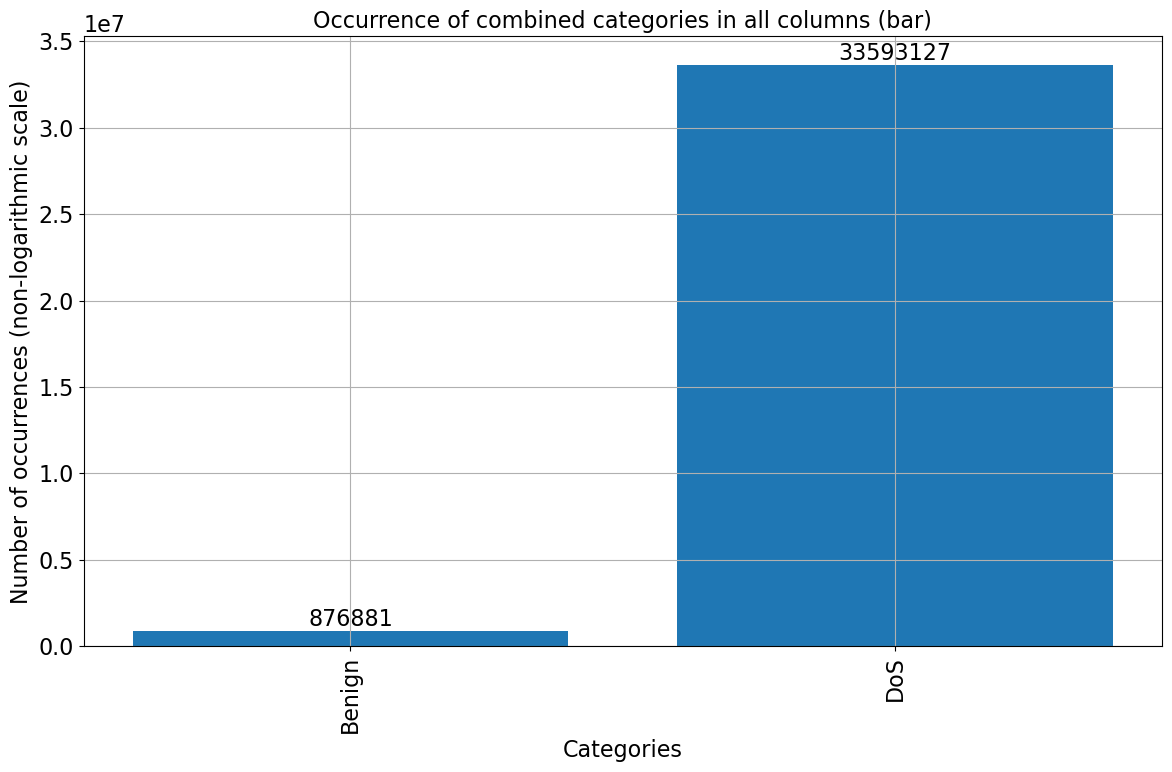

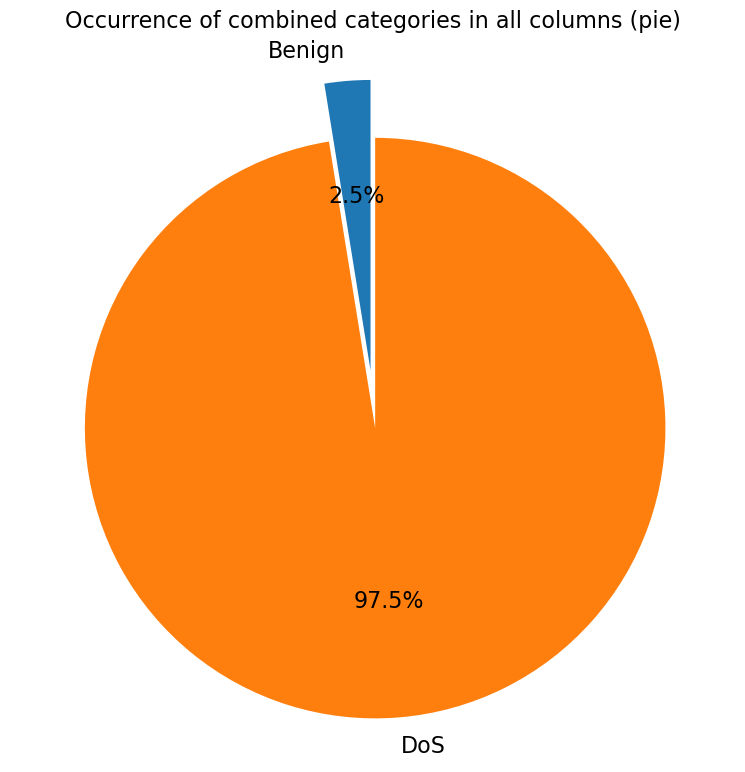

In [3]:
train_sets, test_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(train_sets) + len(test_sets))

plot_bar_chart(count_label(train_sets, file_path=file_path), 'Occurrence of combined categories in all columns (bar)', 'Categories', 'Number of occurrences', 12, 8, model_repo, log_scale=False)
plot_pie_chart(count_label(train_sets, file_path=file_path), 'Occurrence of combined categories in all columns (pie)', 12, 8, model_repo)

## Define variables

In [4]:
performance_path = 'performance.csv'
file_path = '.\Files\\DoS\\'
model_path_binary = '.\\DoS_system_3_models\\Binary\\'
# local_path = '.\\Recon_model\\'
model_path_trinary = '.\\DoS_system_3_models\\Trinary\\'
model_path_all_classes_DoS = '.\\DoS_system_3_models\\All_classes\\DoS\\'
model_path_all_classes_DDoS = '.\\DoS_system_3_models\\All_classes\\DDoS\\'
# after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
X_columns = X_columns[:-2]
print(len(X_columns))
y_column = 'label'
z_column = 'Binary'

95
46


## First model Binary (DoS (DDoS and DoS) or Benign)

## Buiding models

In [7]:
simpleModelsDef = [
    # {
    #     "Name": "DT",
    #     "Model": DecisionTreeClassifier(random_state = 42)
    # },
    # {
    #     "Name": "RF",
    #     "Model": RandomForestClassifier(random_state = 42)
    # },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    # {
    #     "Name": "Cat",
    #     "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    # },
    # {
    #     "Name": "LIGHT",
    #     "Model": LGBMClassifier(random_state = 42)
    # },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    # {
    #     "Name": "MLP",
    #     "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    # },
]

['urg_count', 'Number', 'rst_count', 'Variance', 'Tot size', 'flow_duration', 'Duration', 'fin_count', 'Min', 'ack_flag_number', 'Protocol Type', 'HTTP']


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


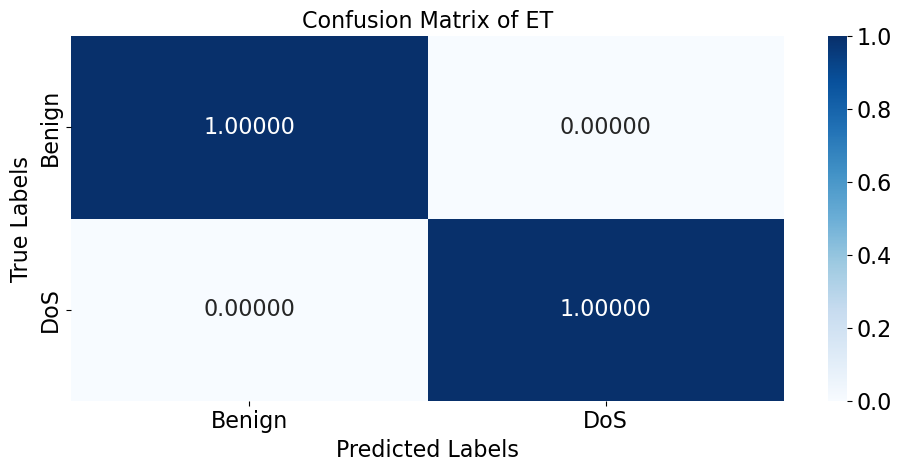

100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


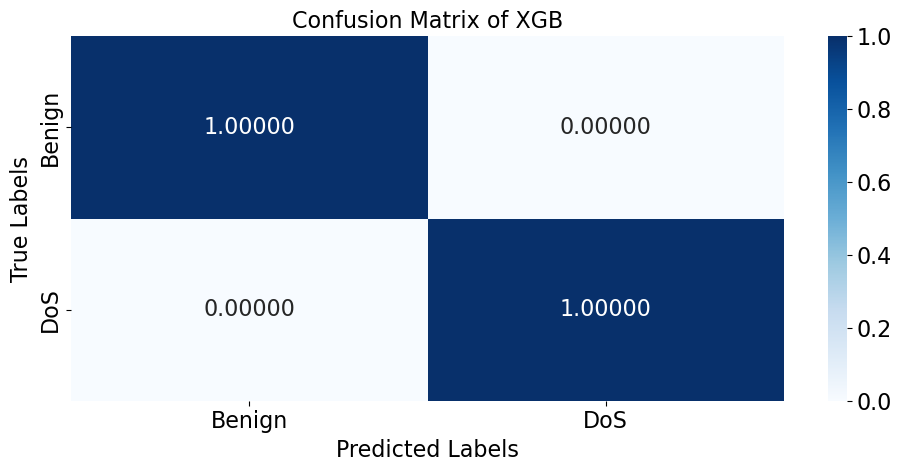

100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


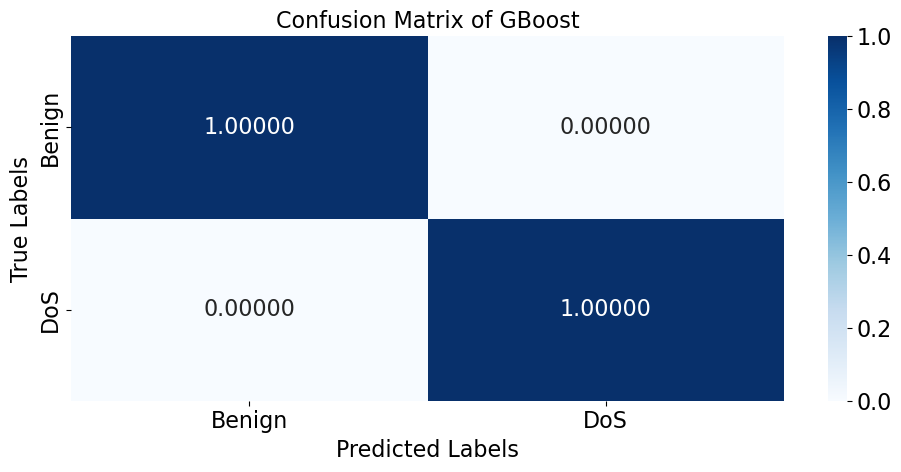

100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


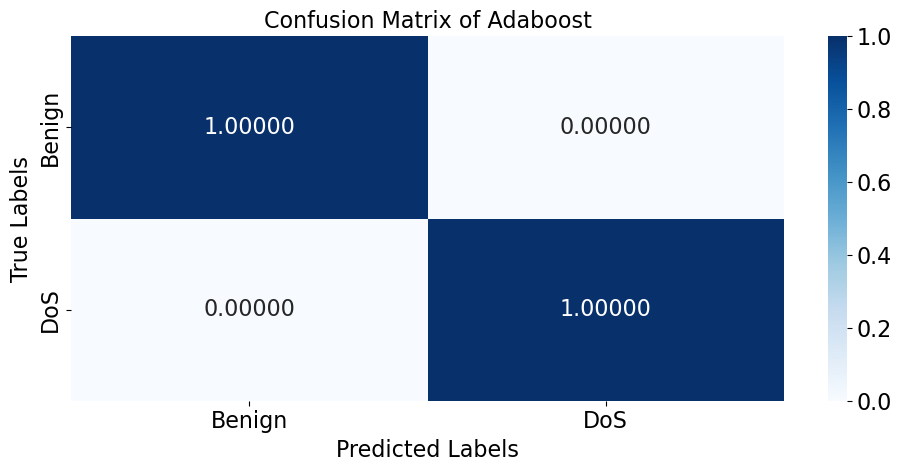

100%|██████████| 4/4 [1:09:23<00:00, 1040.91s/it]


['.\\DoS_system_3_models\\Binary\\encoder.joblib']

In [8]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_path_binary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))
print(selected_X)

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (10, 5)
saveConfusionMatrix = True
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'Selected Features '+model['Name'], train_sets, test_sets, file_path, performance, model_path_binary+'Selected Features ', X_columns=selected_X, y_column=z_column, encoder=encoder, scaler=scaler, \
                                                     confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_path_binary+'Selected Features '+model['Name'], figsize=figsizeConfusionMatrix, modelLabel=model['Name'])

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

## Feature importance

In [5]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_binary+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_path_binary+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_path_binary+'model_XGB.joblib')
    },
    {
        "Name": "Cat",
        "Model": joblib.load(model_path_binary+'model_Cat.joblib')
    },
    {
        "Name": "LIGHT",
        "Model": joblib.load(model_path_binary+'model_LIGHT.joblib')
    },
    {
        "Name": "GBoost",
        "Model": joblib.load(model_path_binary+'model_GBoost.joblib')
    },
    {
        "Name": "Adaboost",
        "Model": joblib.load(model_path_binary+'model_Adaboost.joblib')
    },
]

100%|██████████| 7/7 [00:00<00:00, 458.39it/s]


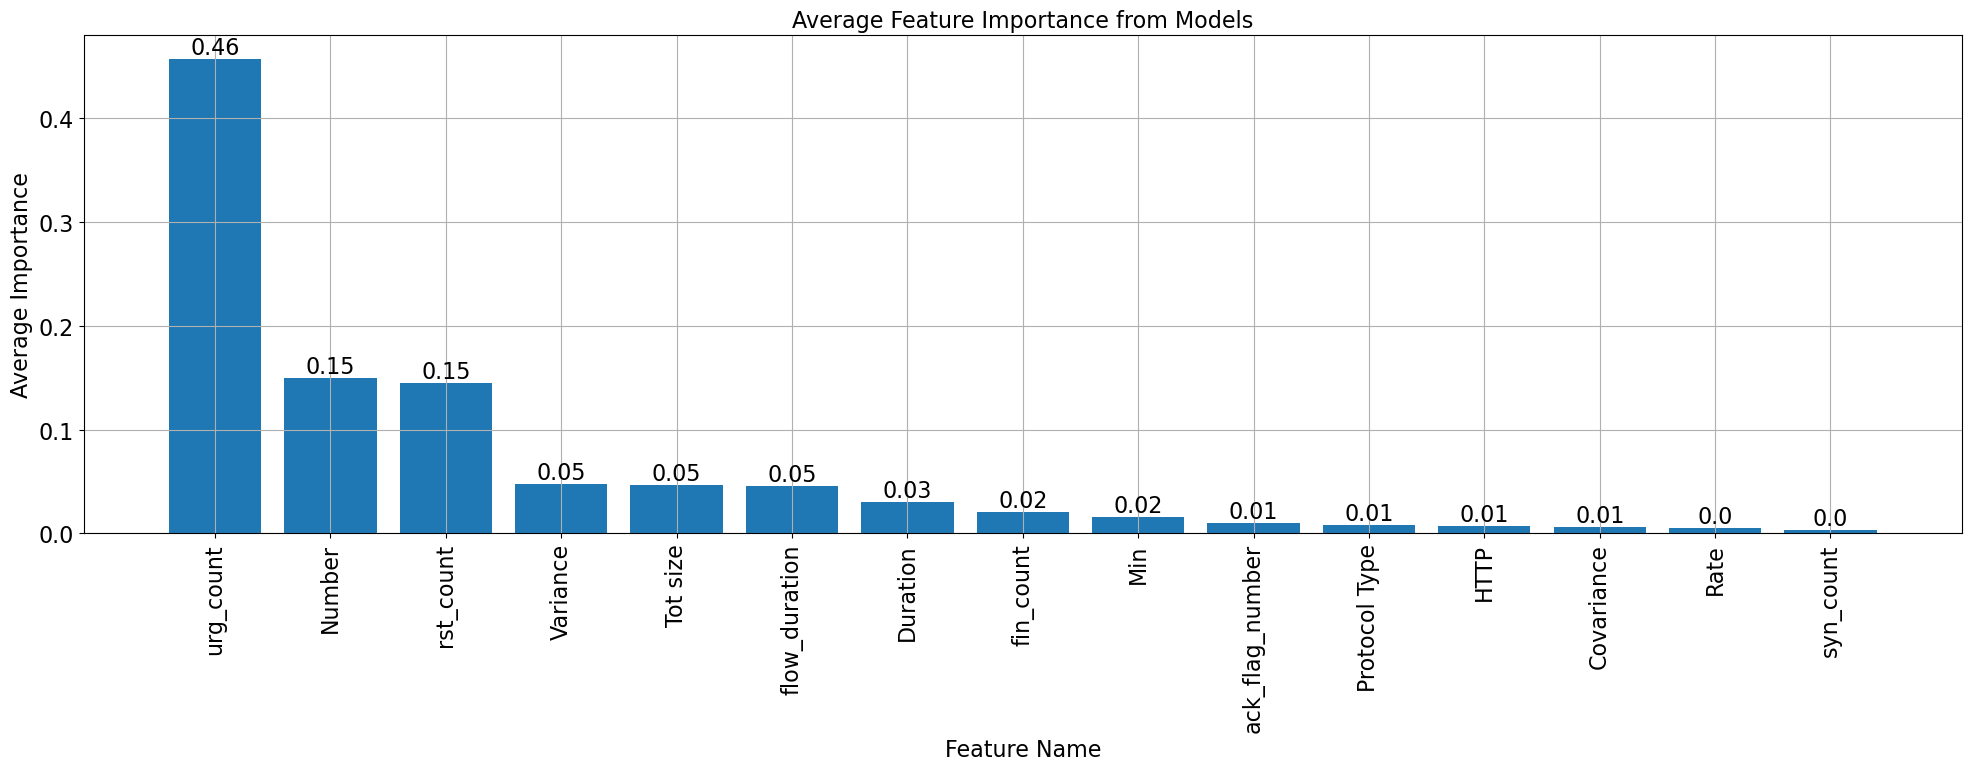

            Feature  Average Importance
0         urg_count            0.456866
1            Number            0.150060
2         rst_count            0.145103
3          Variance            0.047585
4          Tot size            0.046311
5     flow_duration            0.045692
6          Duration            0.030646
7         fin_count            0.020874
8               Min            0.015823
9   ack_flag_number            0.010166
10    Protocol Type            0.007954
11             HTTP            0.006982
12       Covariance            0.006532
13             Rate            0.004859
14        syn_count            0.003162
15            HTTPS            0.001227
16              TCP            0.000088
17             ICMP            0.000062
18              DNS            0.000006
19              IPv            0.000003
20             DHCP            0.000000
21            Drate            0.000000
[0.4568657  0.60692552 0.75202892 0.79961342 0.84592415 0.89161594
 0.92226211 0

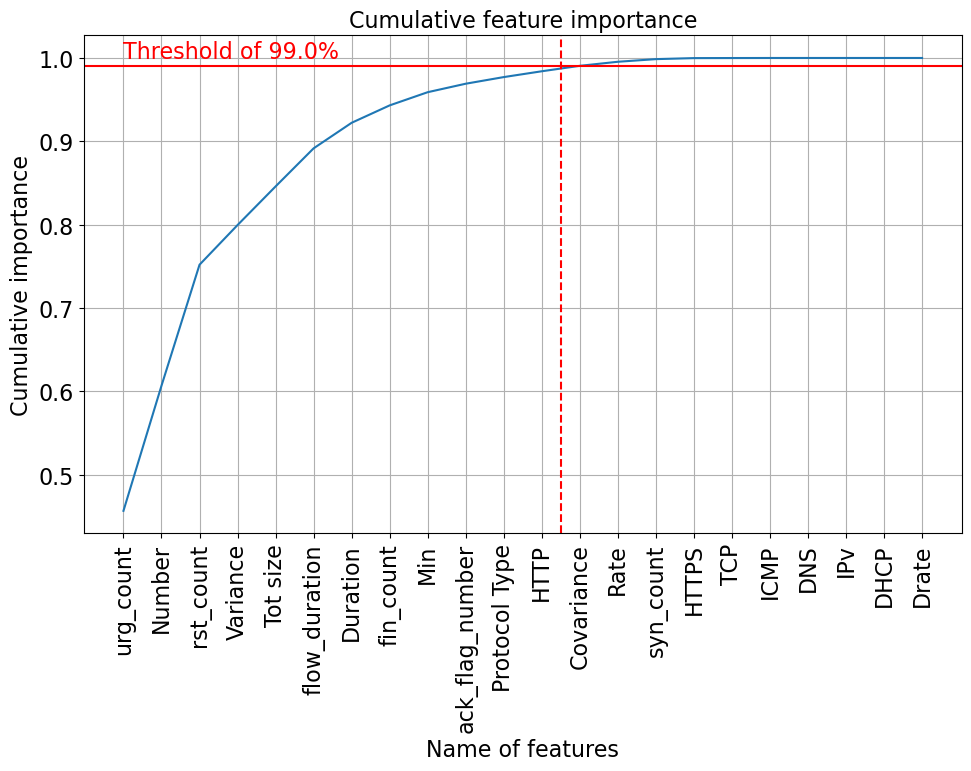

            Feature  Average Importance
0         urg_count            0.348003
1            Number            0.114303
2         rst_count            0.110528
5          Variance            0.036246
6          Tot size            0.035276
7     flow_duration            0.034804
9          Duration            0.023344
10        fin_count            0.015900
12              Min            0.012053
16  ack_flag_number            0.007744
18    Protocol Type            0.006059
19             HTTP            0.005319


100%|██████████| 95/95 [01:53<00:00,  1.19s/it]


In [6]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_path_binary, all_features=True, figsize=(20, 8))
average_importance_df.to_csv(model_path_binary+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\DoS_3_models\\Binary\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_path_binary+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

# Remove features with correlation > 0.80
threshold = 0.80
features_with_threshold_corr = remove_features_with_correlation_and_feature_importance(read_csv_file(train_sets[0], file_path)[X_columns], average_importance_df, model_path_binary, figsize=(20, 8), threshold=threshold)
print(features_with_threshold_corr.head(features_with_threshold_corr.size))

selected_X = select_features_by_importance(features_with_threshold_corr['Feature'].values, features_with_threshold_corr['Average Importance'].values, model_path_binary, threshold_percentage=0.99)
pd.DataFrame(selected_X).to_csv(model_path_binary+'selected_X_columns.csv', index=False)
# print(selected_X)

filtered_df = average_importance_df[average_importance_df['Feature'].isin(selected_X)]
print(filtered_df.head(filtered_df.size))

# Define and fit scaler
scaler = MinMaxScaler()
for set in tqdm(build_sets + after_build_sets):
   scaler.fit(read_csv_file(set, file_path)[selected_X])

In [ ]:
models = [
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
]

In [8]:
from select_best_feature_combination import *

# Initial setup and loading the dataset
dataset = read_csv_file(train_sets[0], file_path)
# for file in train_sets[1:1]:
#     dataset = pd.concat([dataset, read_csv_file(file, file_path)], ignore_index=True)
dataset.sample(10000, random_state=42).reset_index(drop=True)

corr_max = 0.8
final_features_df = pd.DataFrame(columns=['Model', 'Num_Features', 'Optimal_Features_Count', 'Optimal_Feature'])
y_column = 'Binary'


from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Data Preprocessing
# Separate features (X) and target variable (y)
# Choose X with selected X

# print(type(dataset))
# dataset = multi_filter_df(dataset, filter_cols, filter_name)
# print(dataset.head(20))

X = dataset[selected_X]
y = dataset[y_column]

# Apply MinMax scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the first few rows of the scaled features and encoded target variable to verify the transformation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_encoded_df = pd.Series(y_encoded, name='Binary_Encoded')

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_encoded, test_size=0.3, random_state=42)
print(X_train.columns)

# Define figure and axes according to the number of models
# fig, axs = plt.subplots(len(models), 2, figsize=(20, 6 * len(models)))

Index(['urg_count', 'Number', 'rst_count', 'Variance', 'Tot size',
       'flow_duration', 'Duration', 'fin_count', 'Min', 'ack_flag_number',
       'Protocol Type', 'HTTP'],
      dtype='object')


In [ ]:
# Define the number of features 
led=0
born_min=1
born_max=len(X_scaled_df.columns)
unique_categories = y.unique()
CategoryList = list(unique_categories)

resAccuracy, resF1score = plotResultsvsNumberofFeatures(filtered_df, CategoryList, X_train, X_test, y_train, y_test, born_min, born_max, led)

# Print the results to verify outputs
print("Accuracy Results:", resAccuracy)
print("F1 Score Results:", resF1score)

plotAccuracyF1score(resAccuracy, resF1score, filtered_df)

In [ ]:
for idx, model in enumerate(models):
    print(f"Processing model: {model['Name']}")

    best_features, top_combinations_df = select_best_feature_combination(model['Model'], X_train, X_test, y_train, y_test, feature_list=X_scaled_df.columns, cv=5, scoring='accuracy', top_n=10, startk=1)

    print("Best Feature Combination:", best_features)
    print("Top Combinations Data Frame:")
    print(top_combinations_df)

    # Plot best feature combination bars

    # Define the number of groups and the number of bars in each group
    num_groups = len(top_combinations_df['Feature Combination'])
    num_bars = 4  # Number of metrics: Accuracy, F1 Score, Precision, Recall

    # Define the width of each bar and the positions of the groups
    bar_width = 0.2
    index = np.arange(num_groups)

    # Create bars for each metric with an offset for each
    plt.figure(figsize=(20, 8))
    plt.bar(index, top_combinations_df['Accuracy'], width=bar_width, label='Accuracy', color='blue')
    plt.bar(index + bar_width, top_combinations_df['F1 Score'], width=bar_width, label='F1 Score', color='red')
    plt.bar(index + 2 * bar_width, top_combinations_df['Precision'], width=bar_width, label='Precision', color='green')
    plt.bar(index + 3 * bar_width, top_combinations_df['Recall'], width=bar_width, label='Recall', color='yellow')

    # Set the labels and title
    plt.xlabel('Feature Combination')
    plt.ylabel('Scores')
    plt.title(f'Feature Combination vs Scores for {model["Name"]}')
    plt.xticks(index + 1.5 * bar_width, top_combinations_df['Feature Combination'].apply(lambda x: ', '.join(x)), rotation=90)

    # Add a legend and adjust layout
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.savefig(model_path_binary + 'Feature Combination vs Scores for ' + model["Name"] + '.png')
    plt.show()

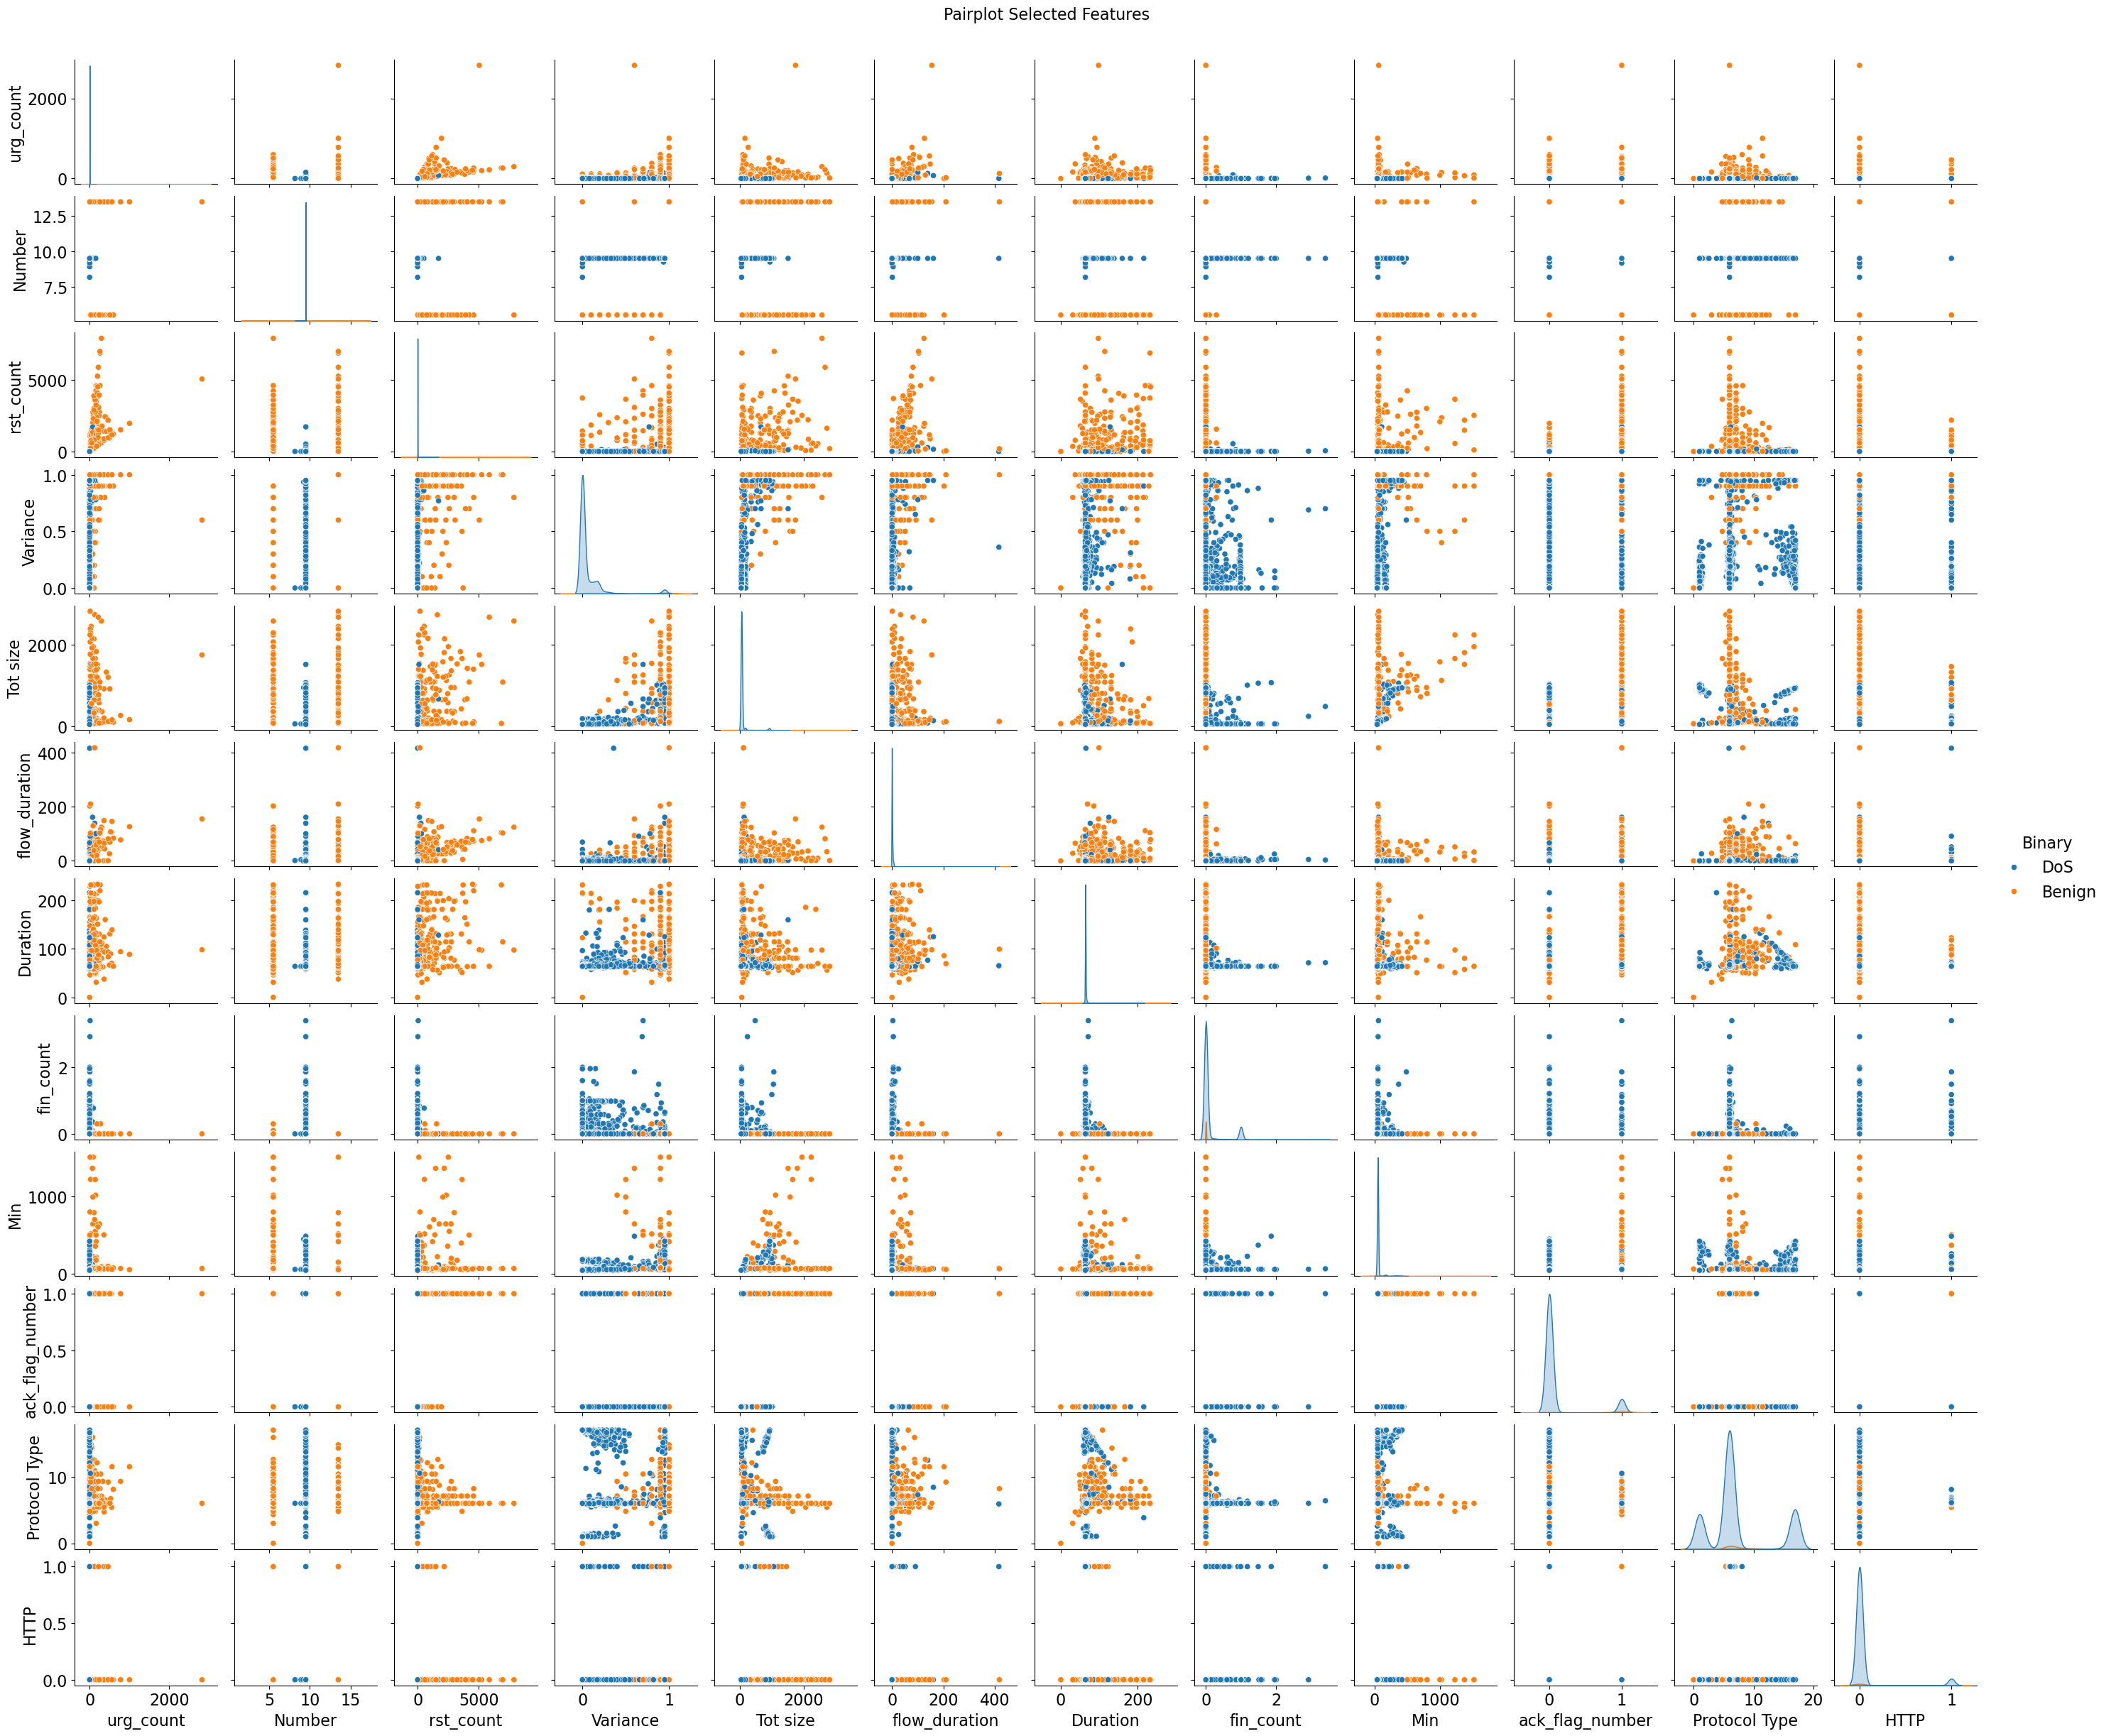

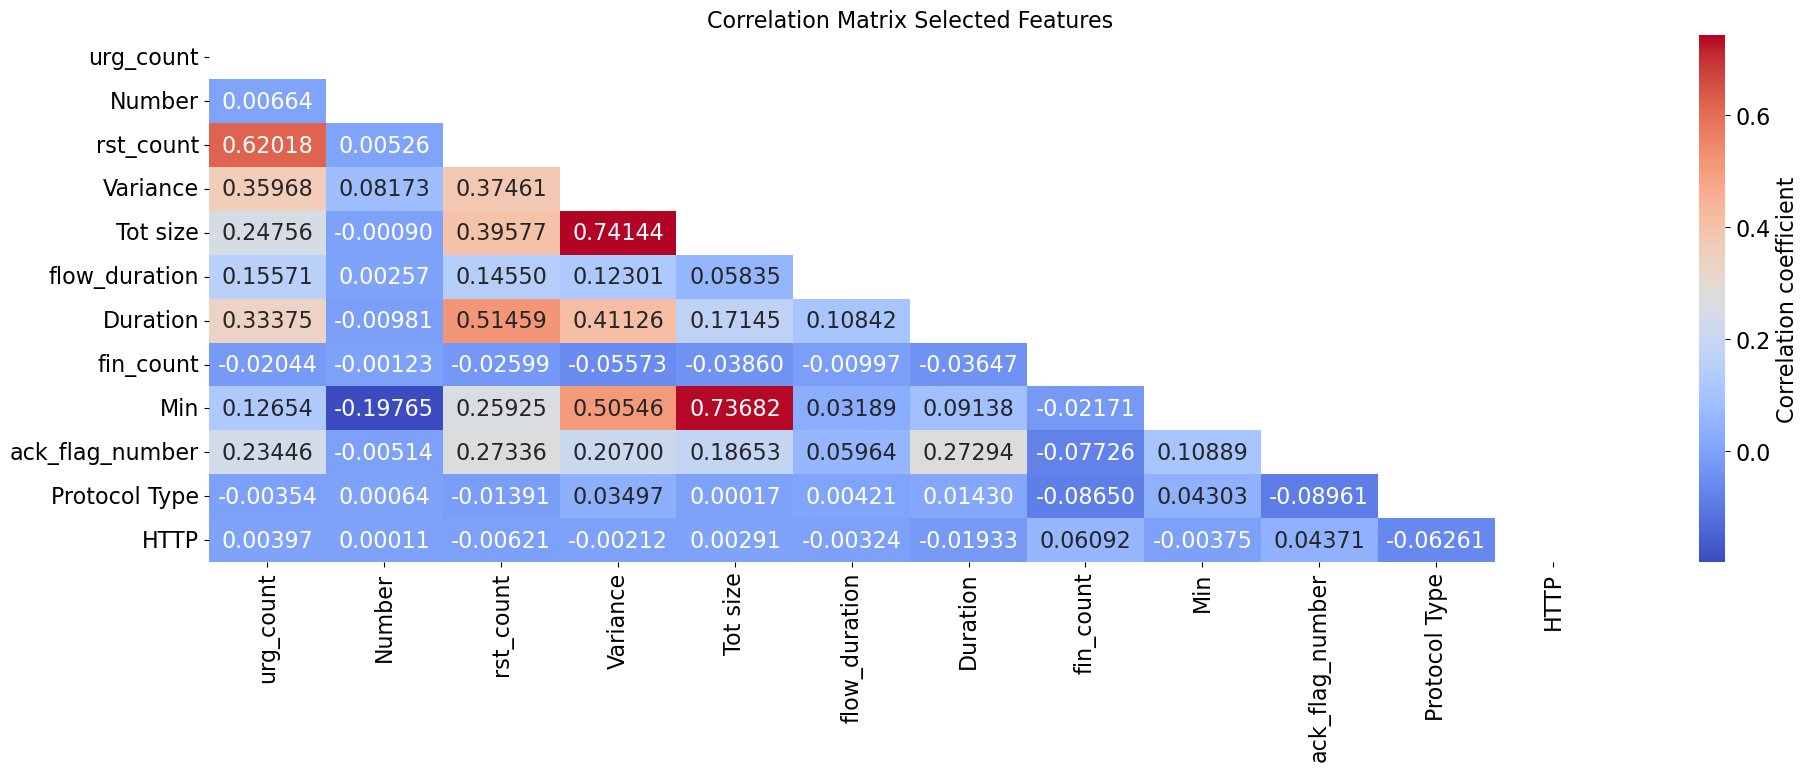

          urg_count        Number     rst_count      Variance      Tot size  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.382802      9.492949     28.140695      0.080849     88.473972   
std       39.878652      0.626274    276.437496      0.210621    185.492967   
min        0.000000      5.500000      0.000000      0.000000     42.000000   
25%        0.000000      9.500000      0.000000      0.000000     50.000000   
50%        0.000000      9.500000      0.000000      0.000000     54.000000   
75%        0.000000      9.500000      0.010000      0.050000     54.000000   
max     2824.500000     13.500000   7883.500000      1.000000   2817.200000   

       flow_duration      Duration     fin_count           Min  \
count   10000.000000  10000.000000  10000.000000  10000.000000   
mean        1.580547     65.674637      0.105539     62.445844   
std        10.463689     11.783919      0.304945     62.380368   
min         0.000000    

In [9]:
# if len(selected_X) > 10:
#     new_selected_X = selected_X[:10]
# else:
new_selected_X = selected_X
    
new_selected_X.extend([y_column])

dataset = read_csv_file(train_sets[0], file_path)[new_selected_X].sample(10000, random_state=42).reset_index(drop=True)
# dataset = multi_filter_df(dataset, filter_cols, filter_name)

    
# Pairplot of selected features
pairplot = sns.pairplot(dataset, hue=y_column)
pairplot.figure.suptitle('Pairplot Selected Features')  # y=1.02 to move the title above the plot
pairplot.figure.set_size_inches(30, 25)
pairplot.figure.subplots_adjust(top=0.95)  # Adjust the top to make space for the title

pairplot.savefig(model_path_binary+'Pairplot_selectedFeatures.png')
plt.show()

# Lower correlation matrix of selected features
corr = read_csv_file(train_sets[0], file_path)[new_selected_X].reset_index(drop=True).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, fmt=".5f", mask=mask, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix Selected Features')
plt.tight_layout()
plt.savefig(model_path_binary+'CorrelationMatrix_selectedFeatures.png')
plt.show()

# Describe on selected features and first set, then save describe to a file
print(dataset.describe())
dataset.describe().to_csv(model_path_binary+'describe.csv', index=False)

##### Some plots

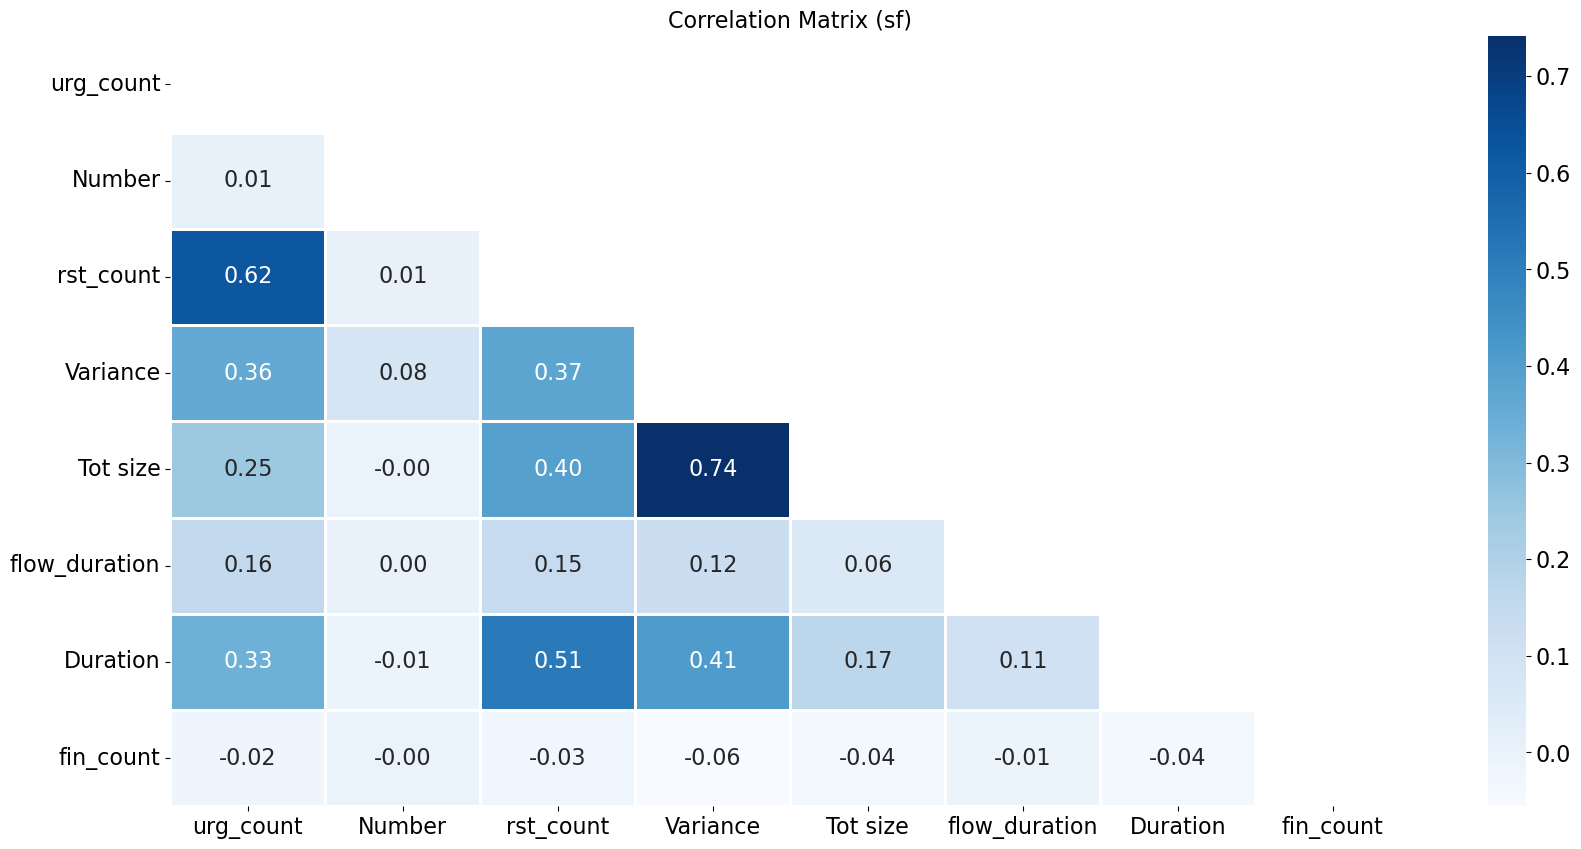

<Figure size 2000x1000 with 0 Axes>

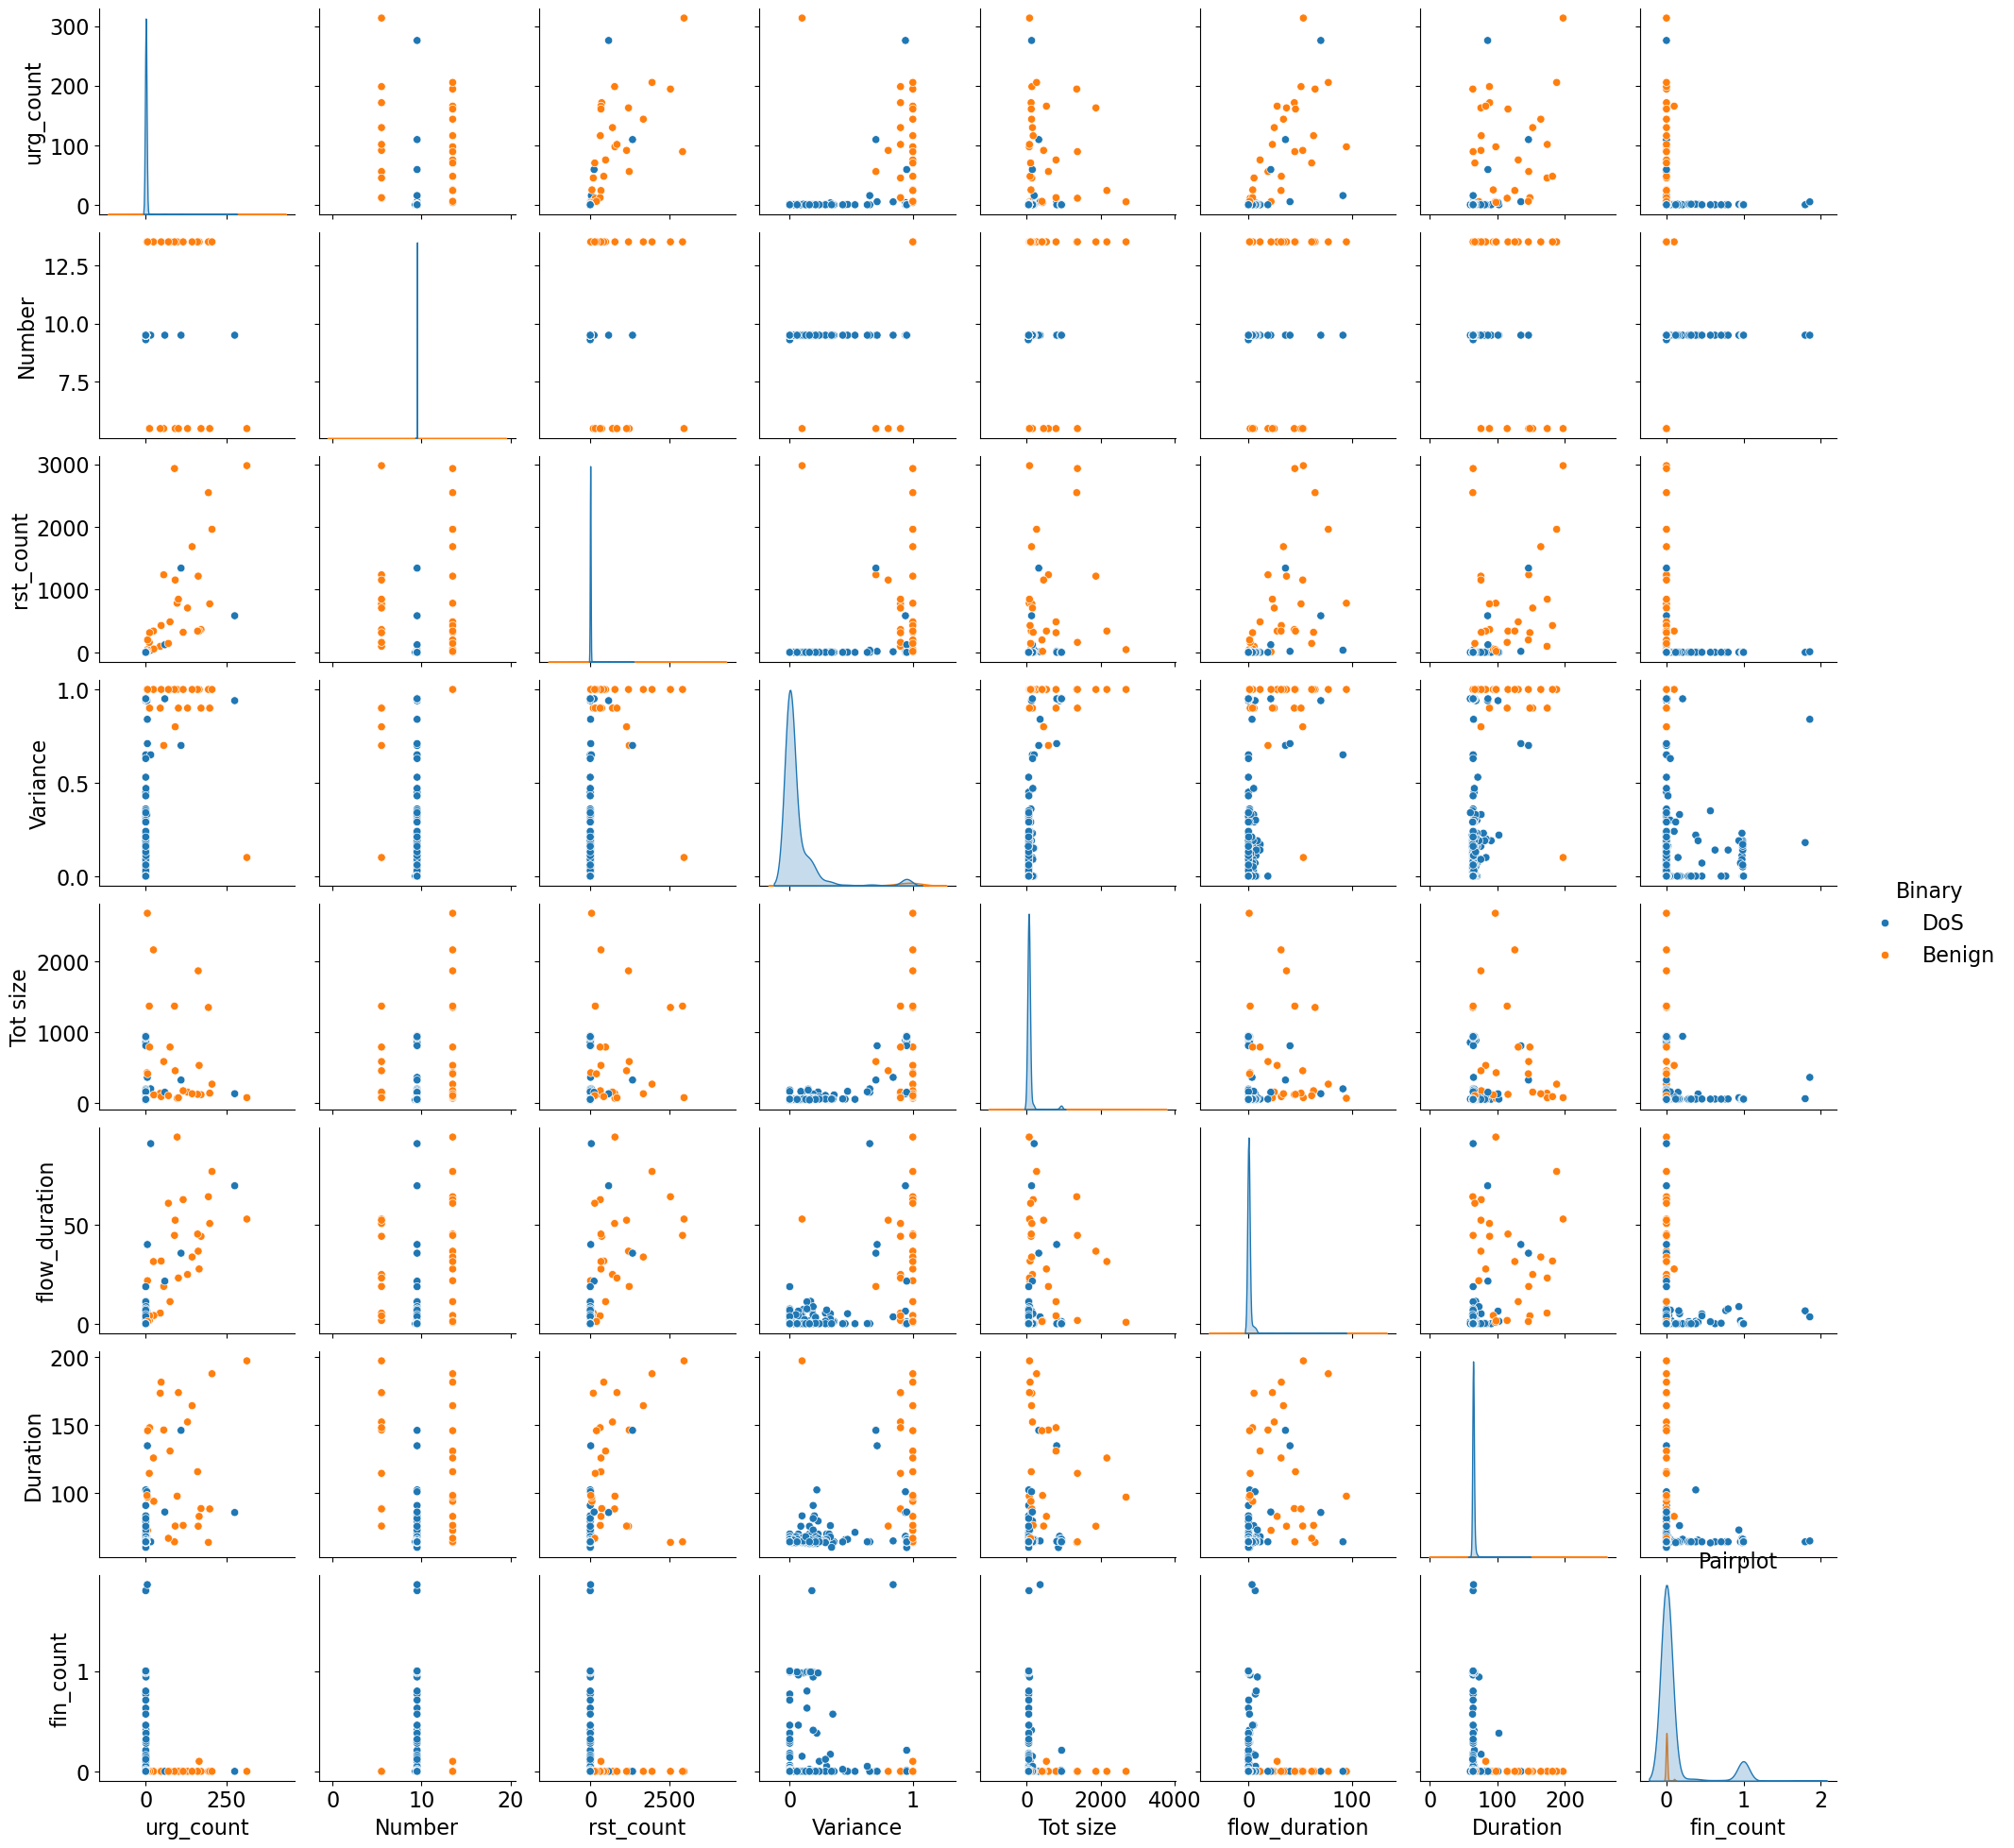

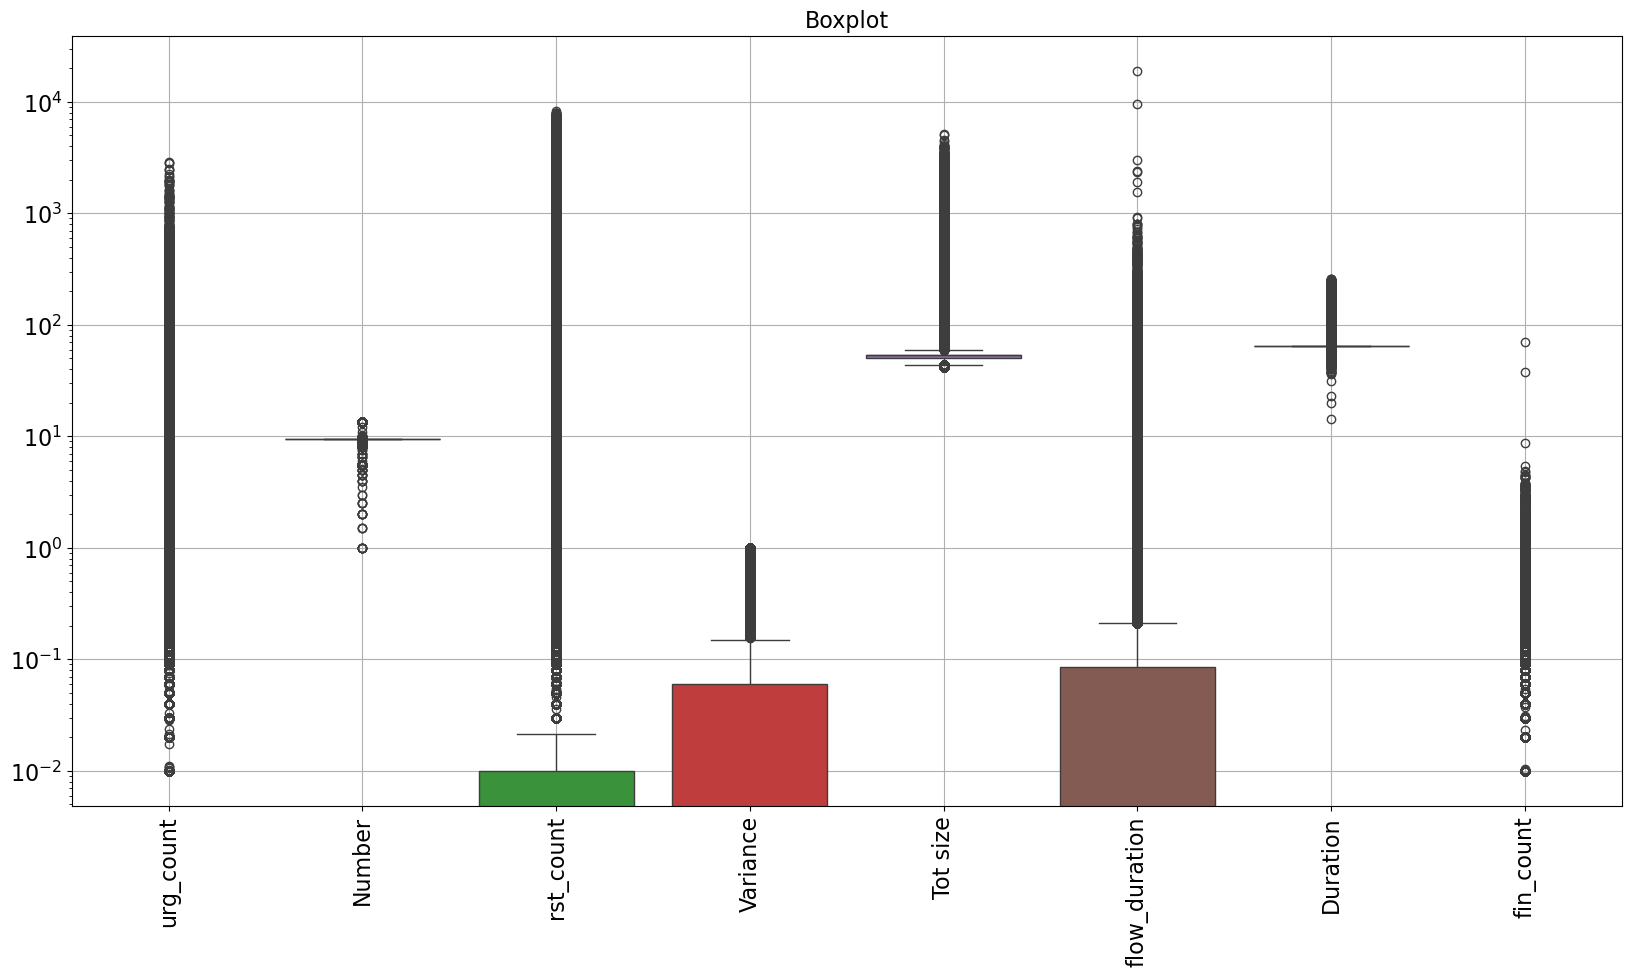

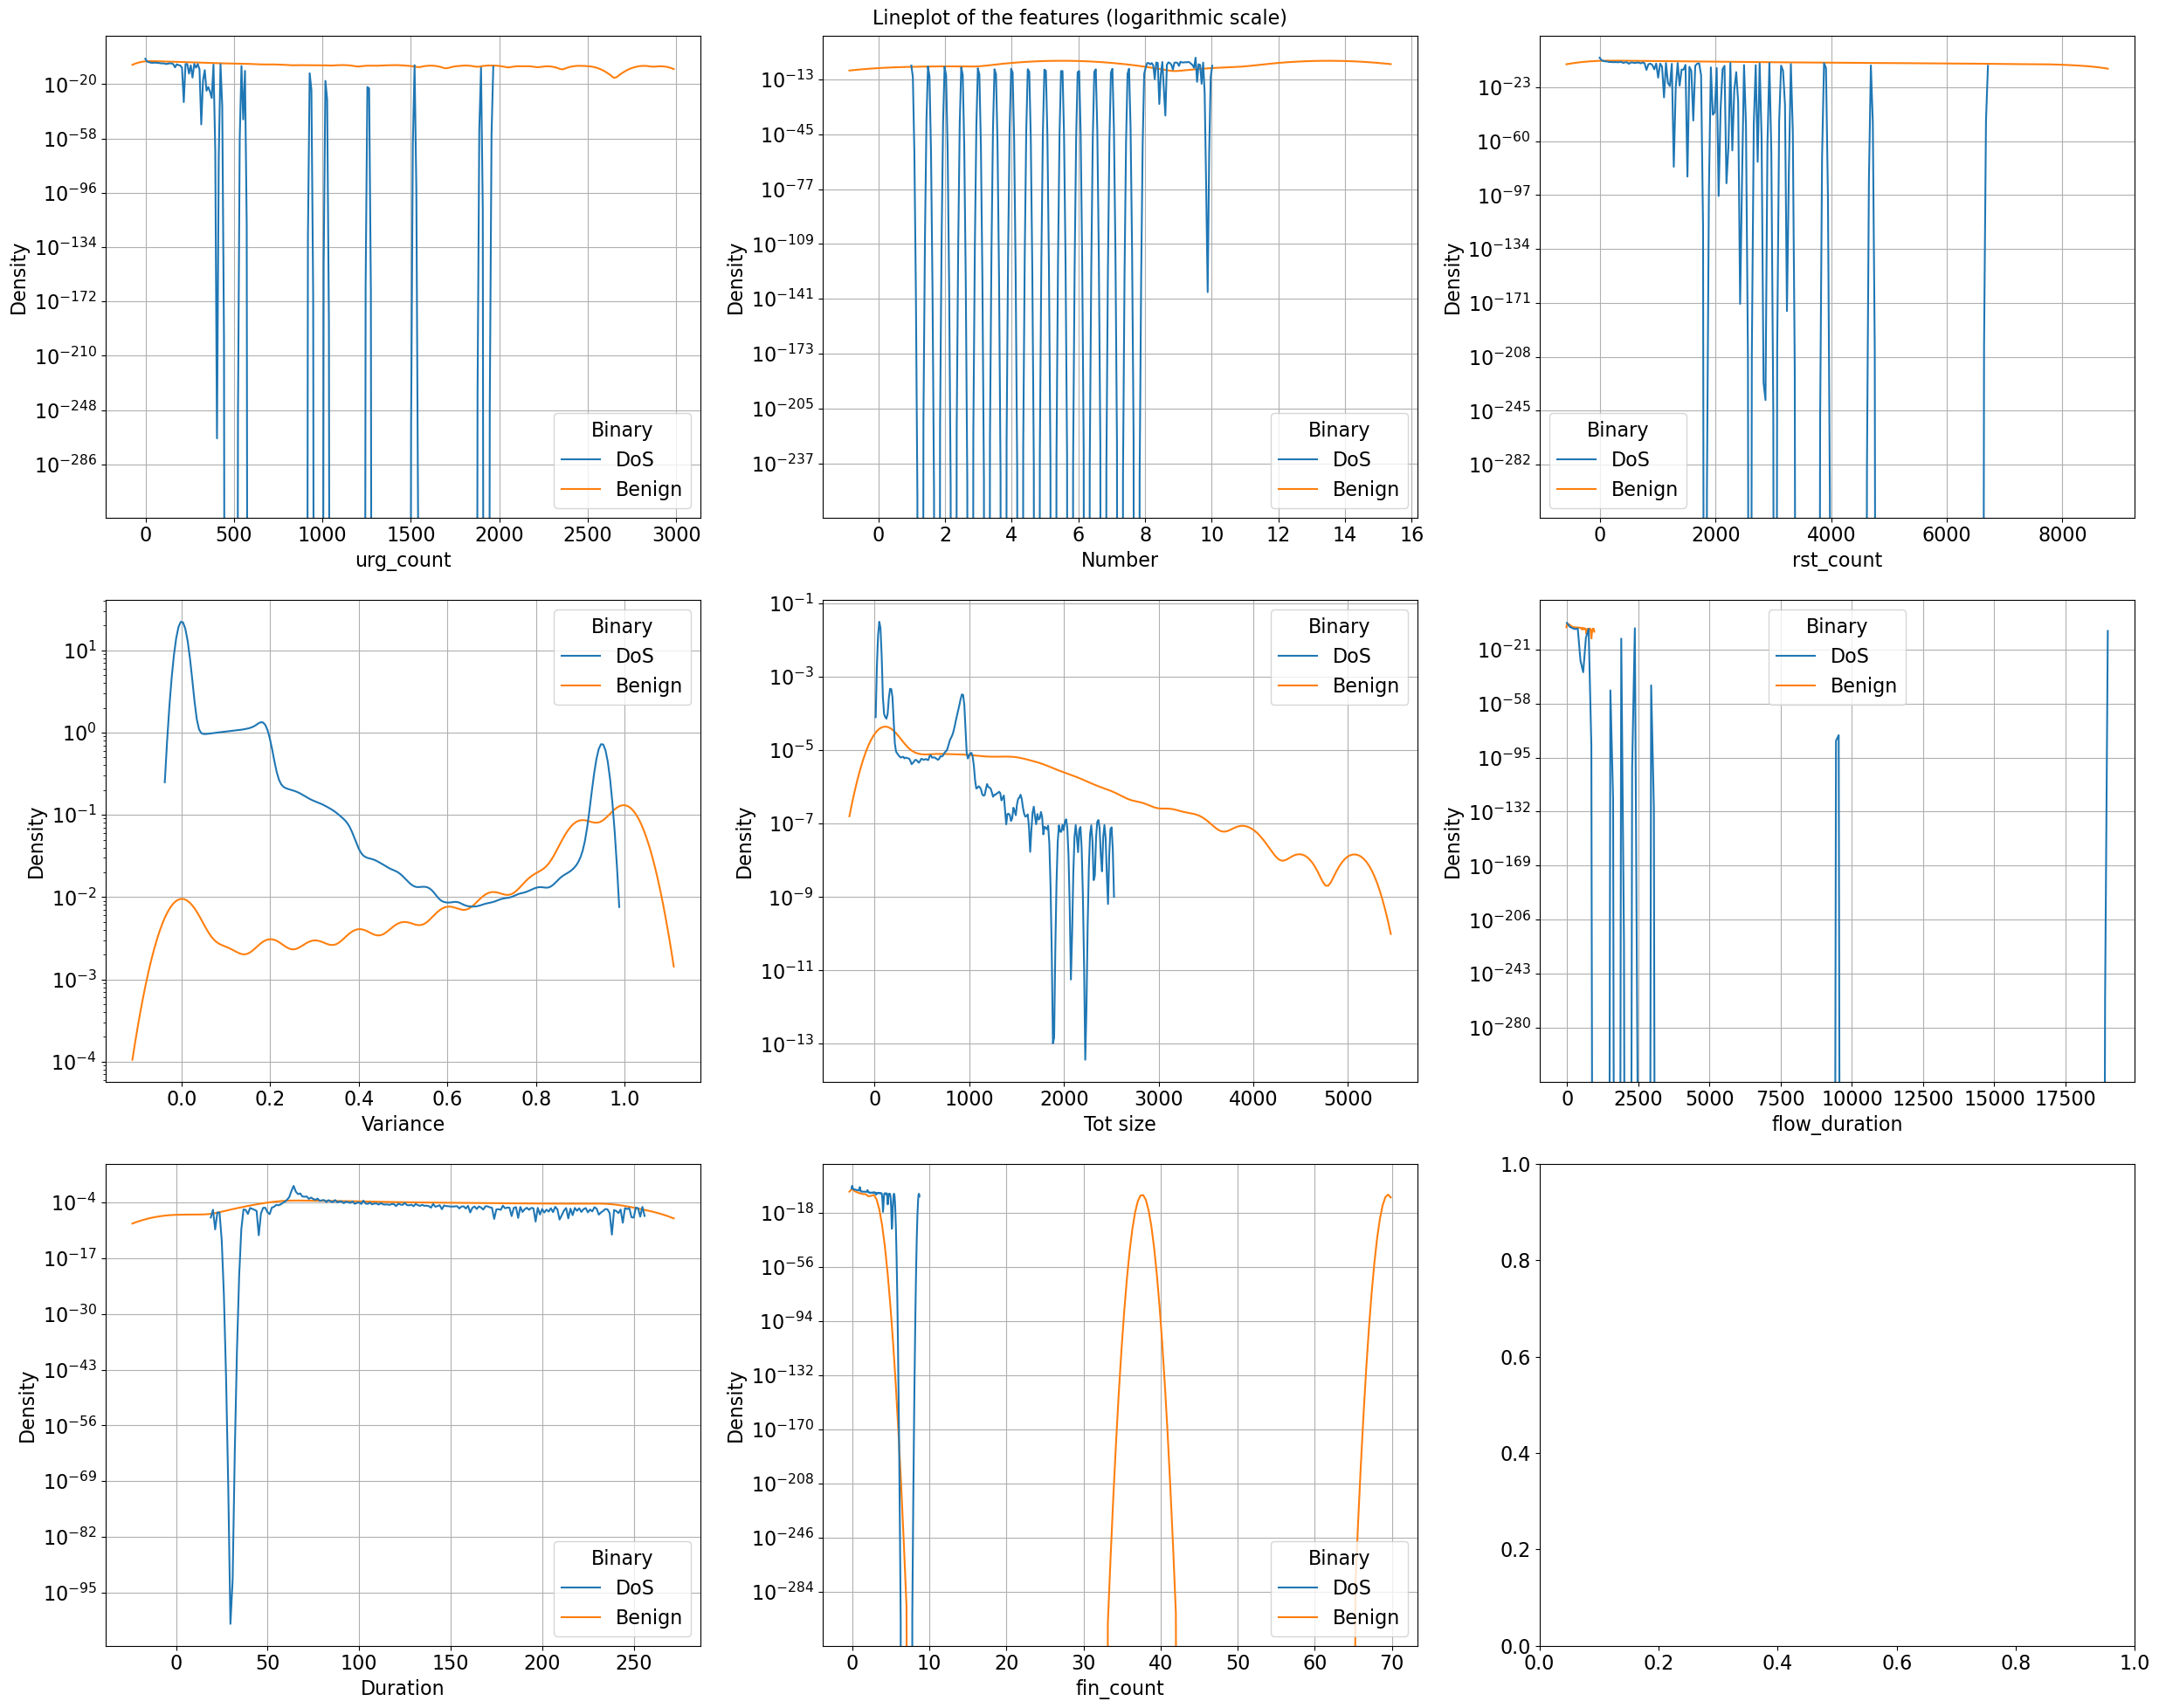

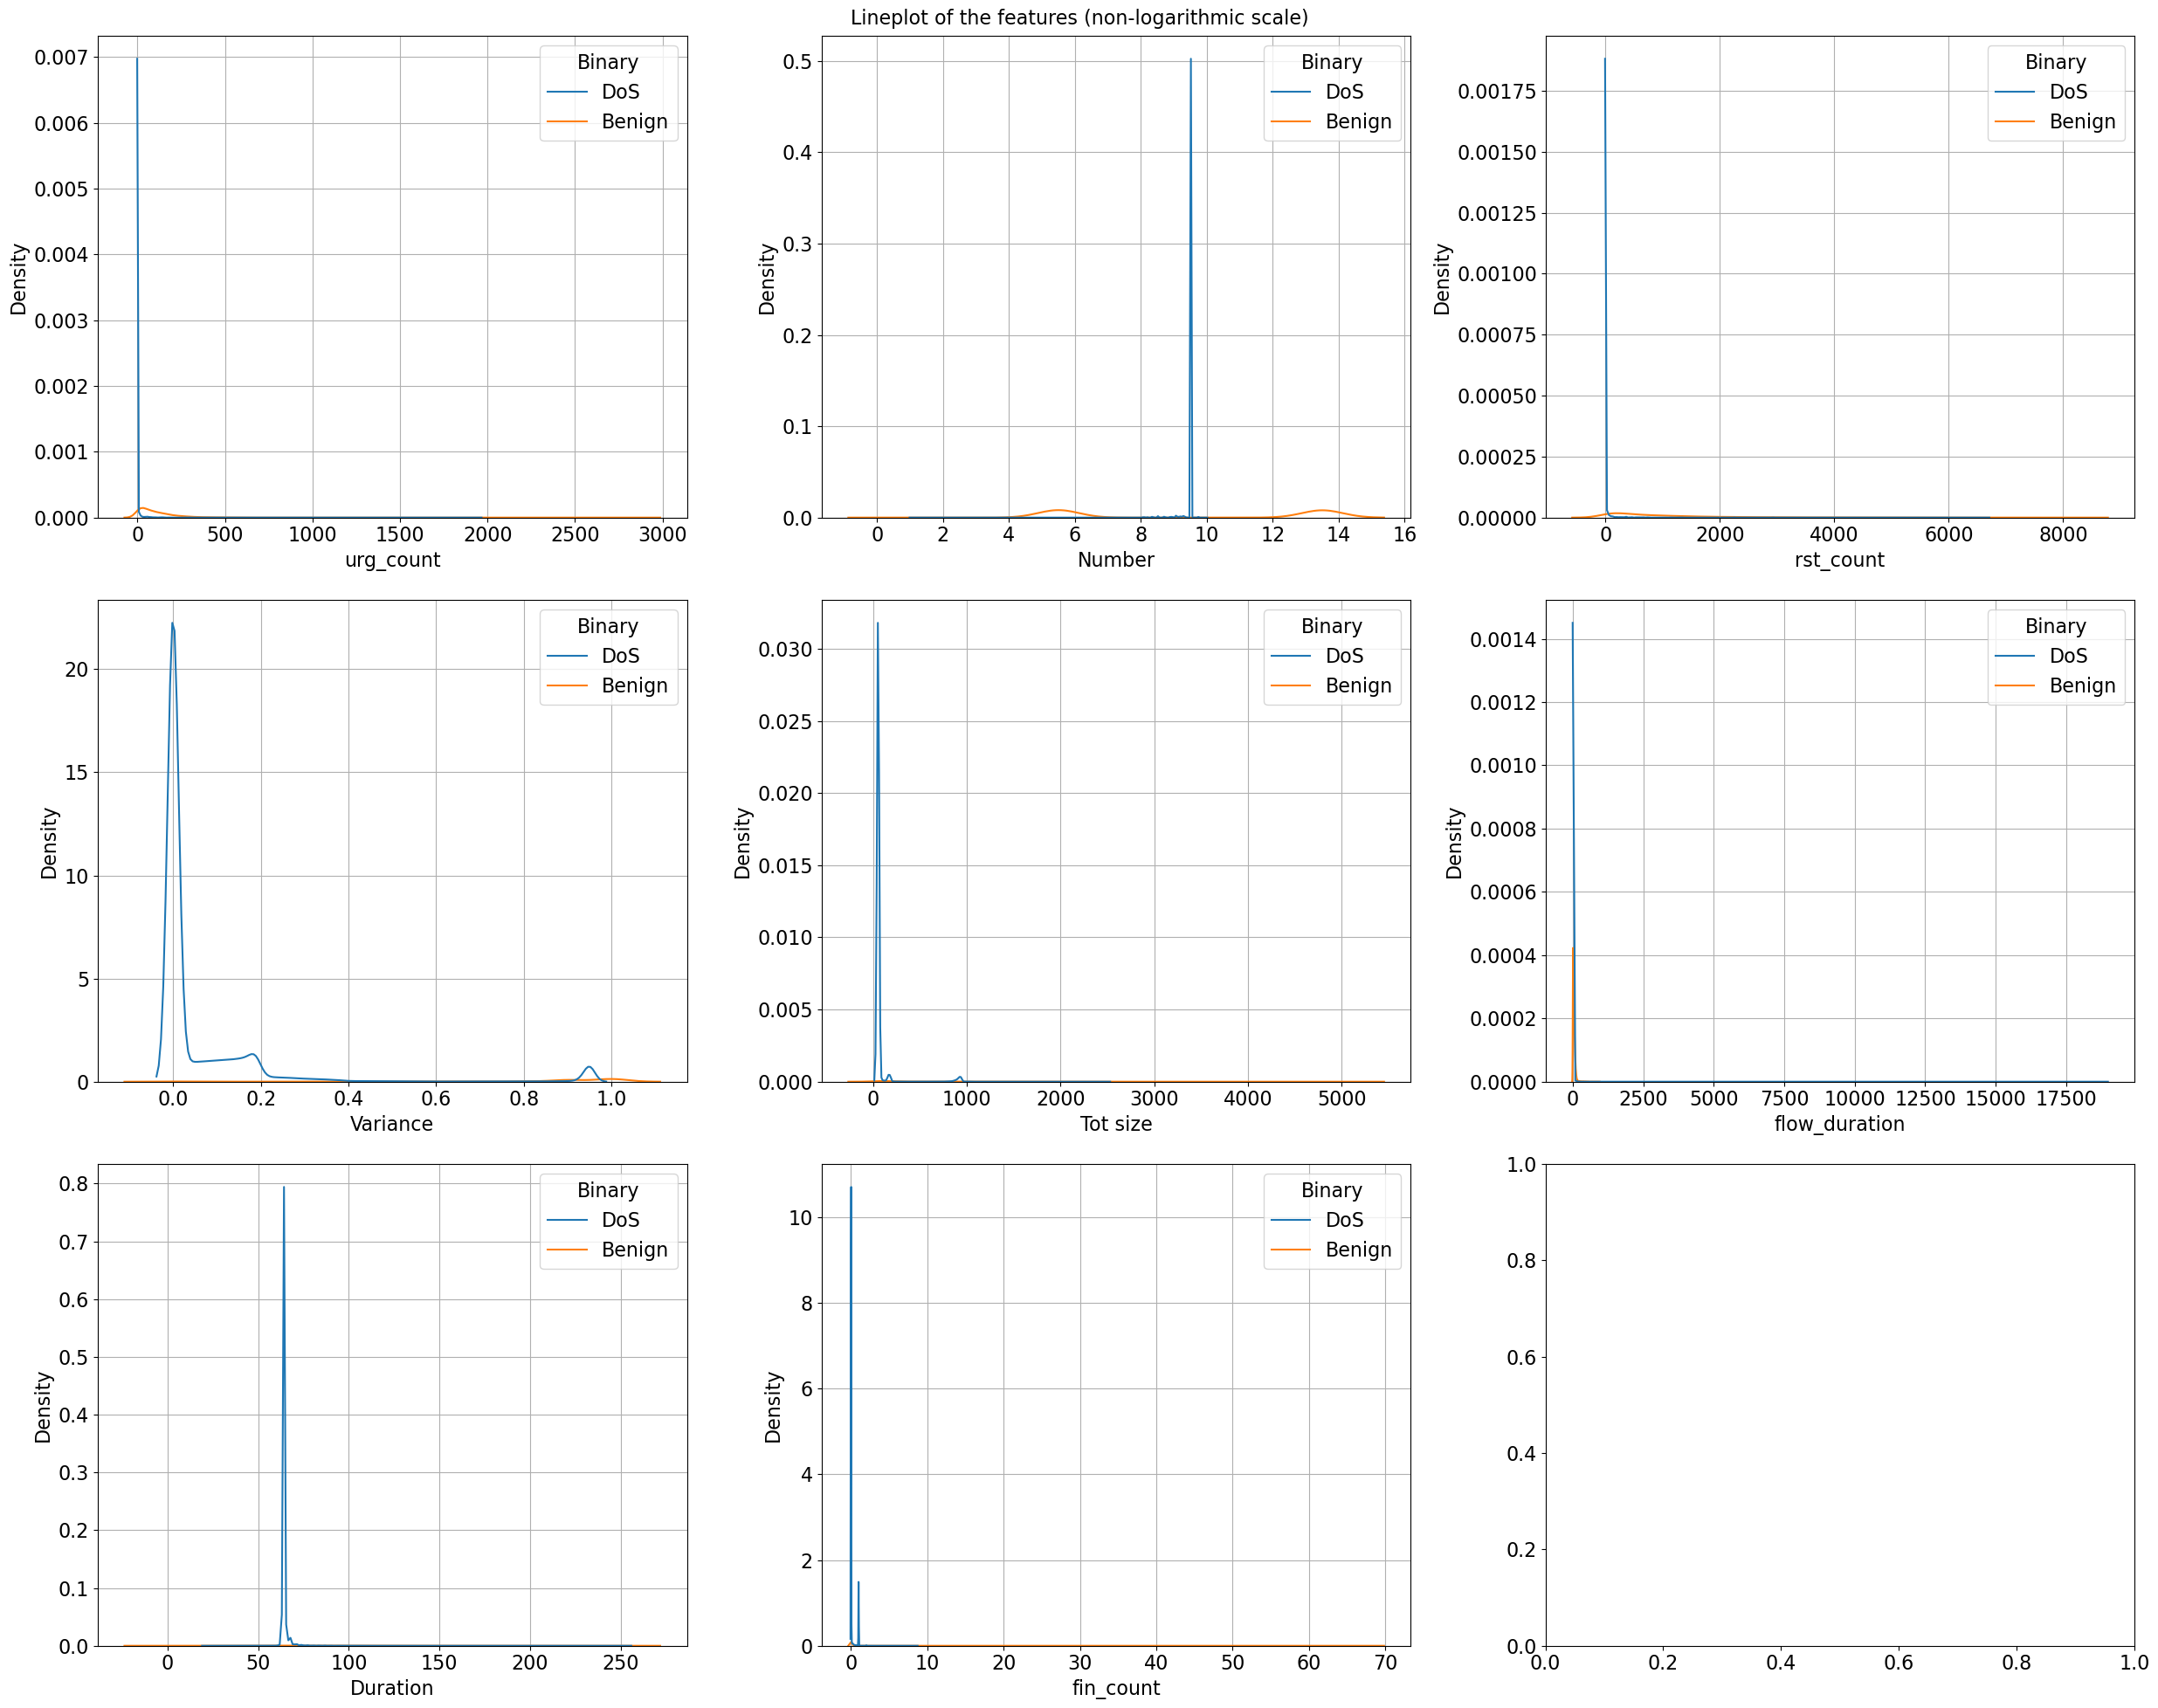

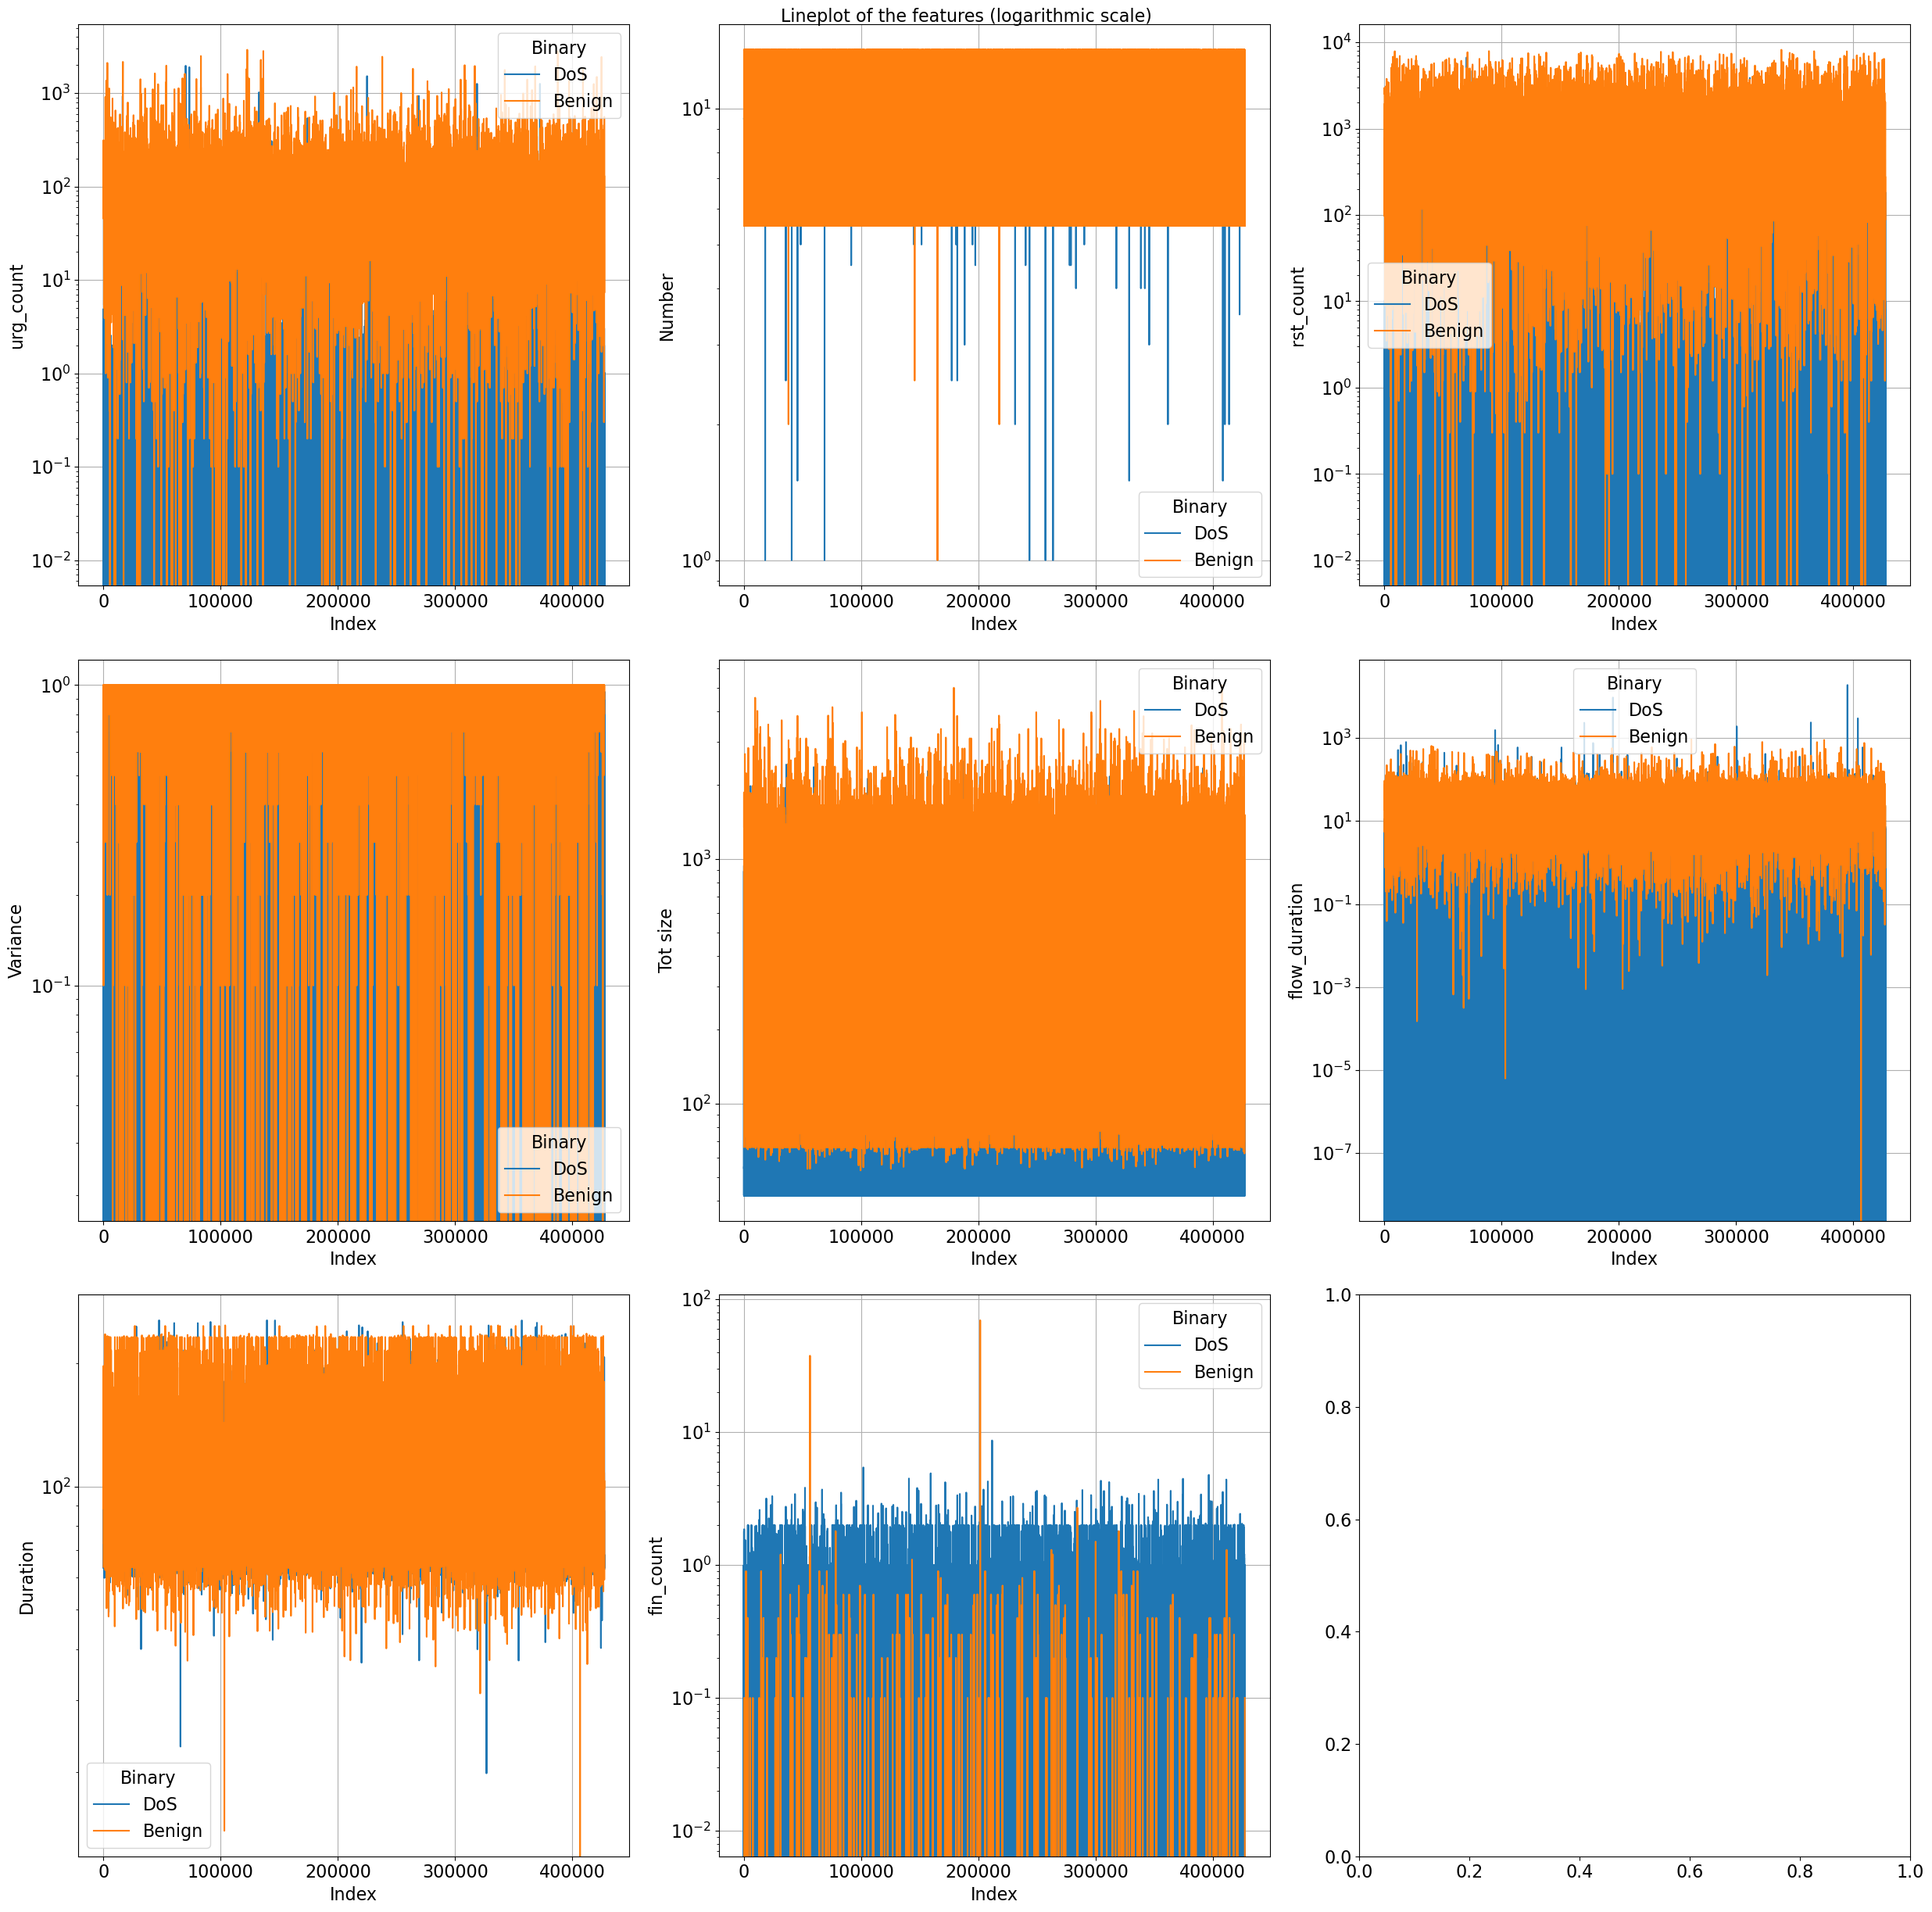

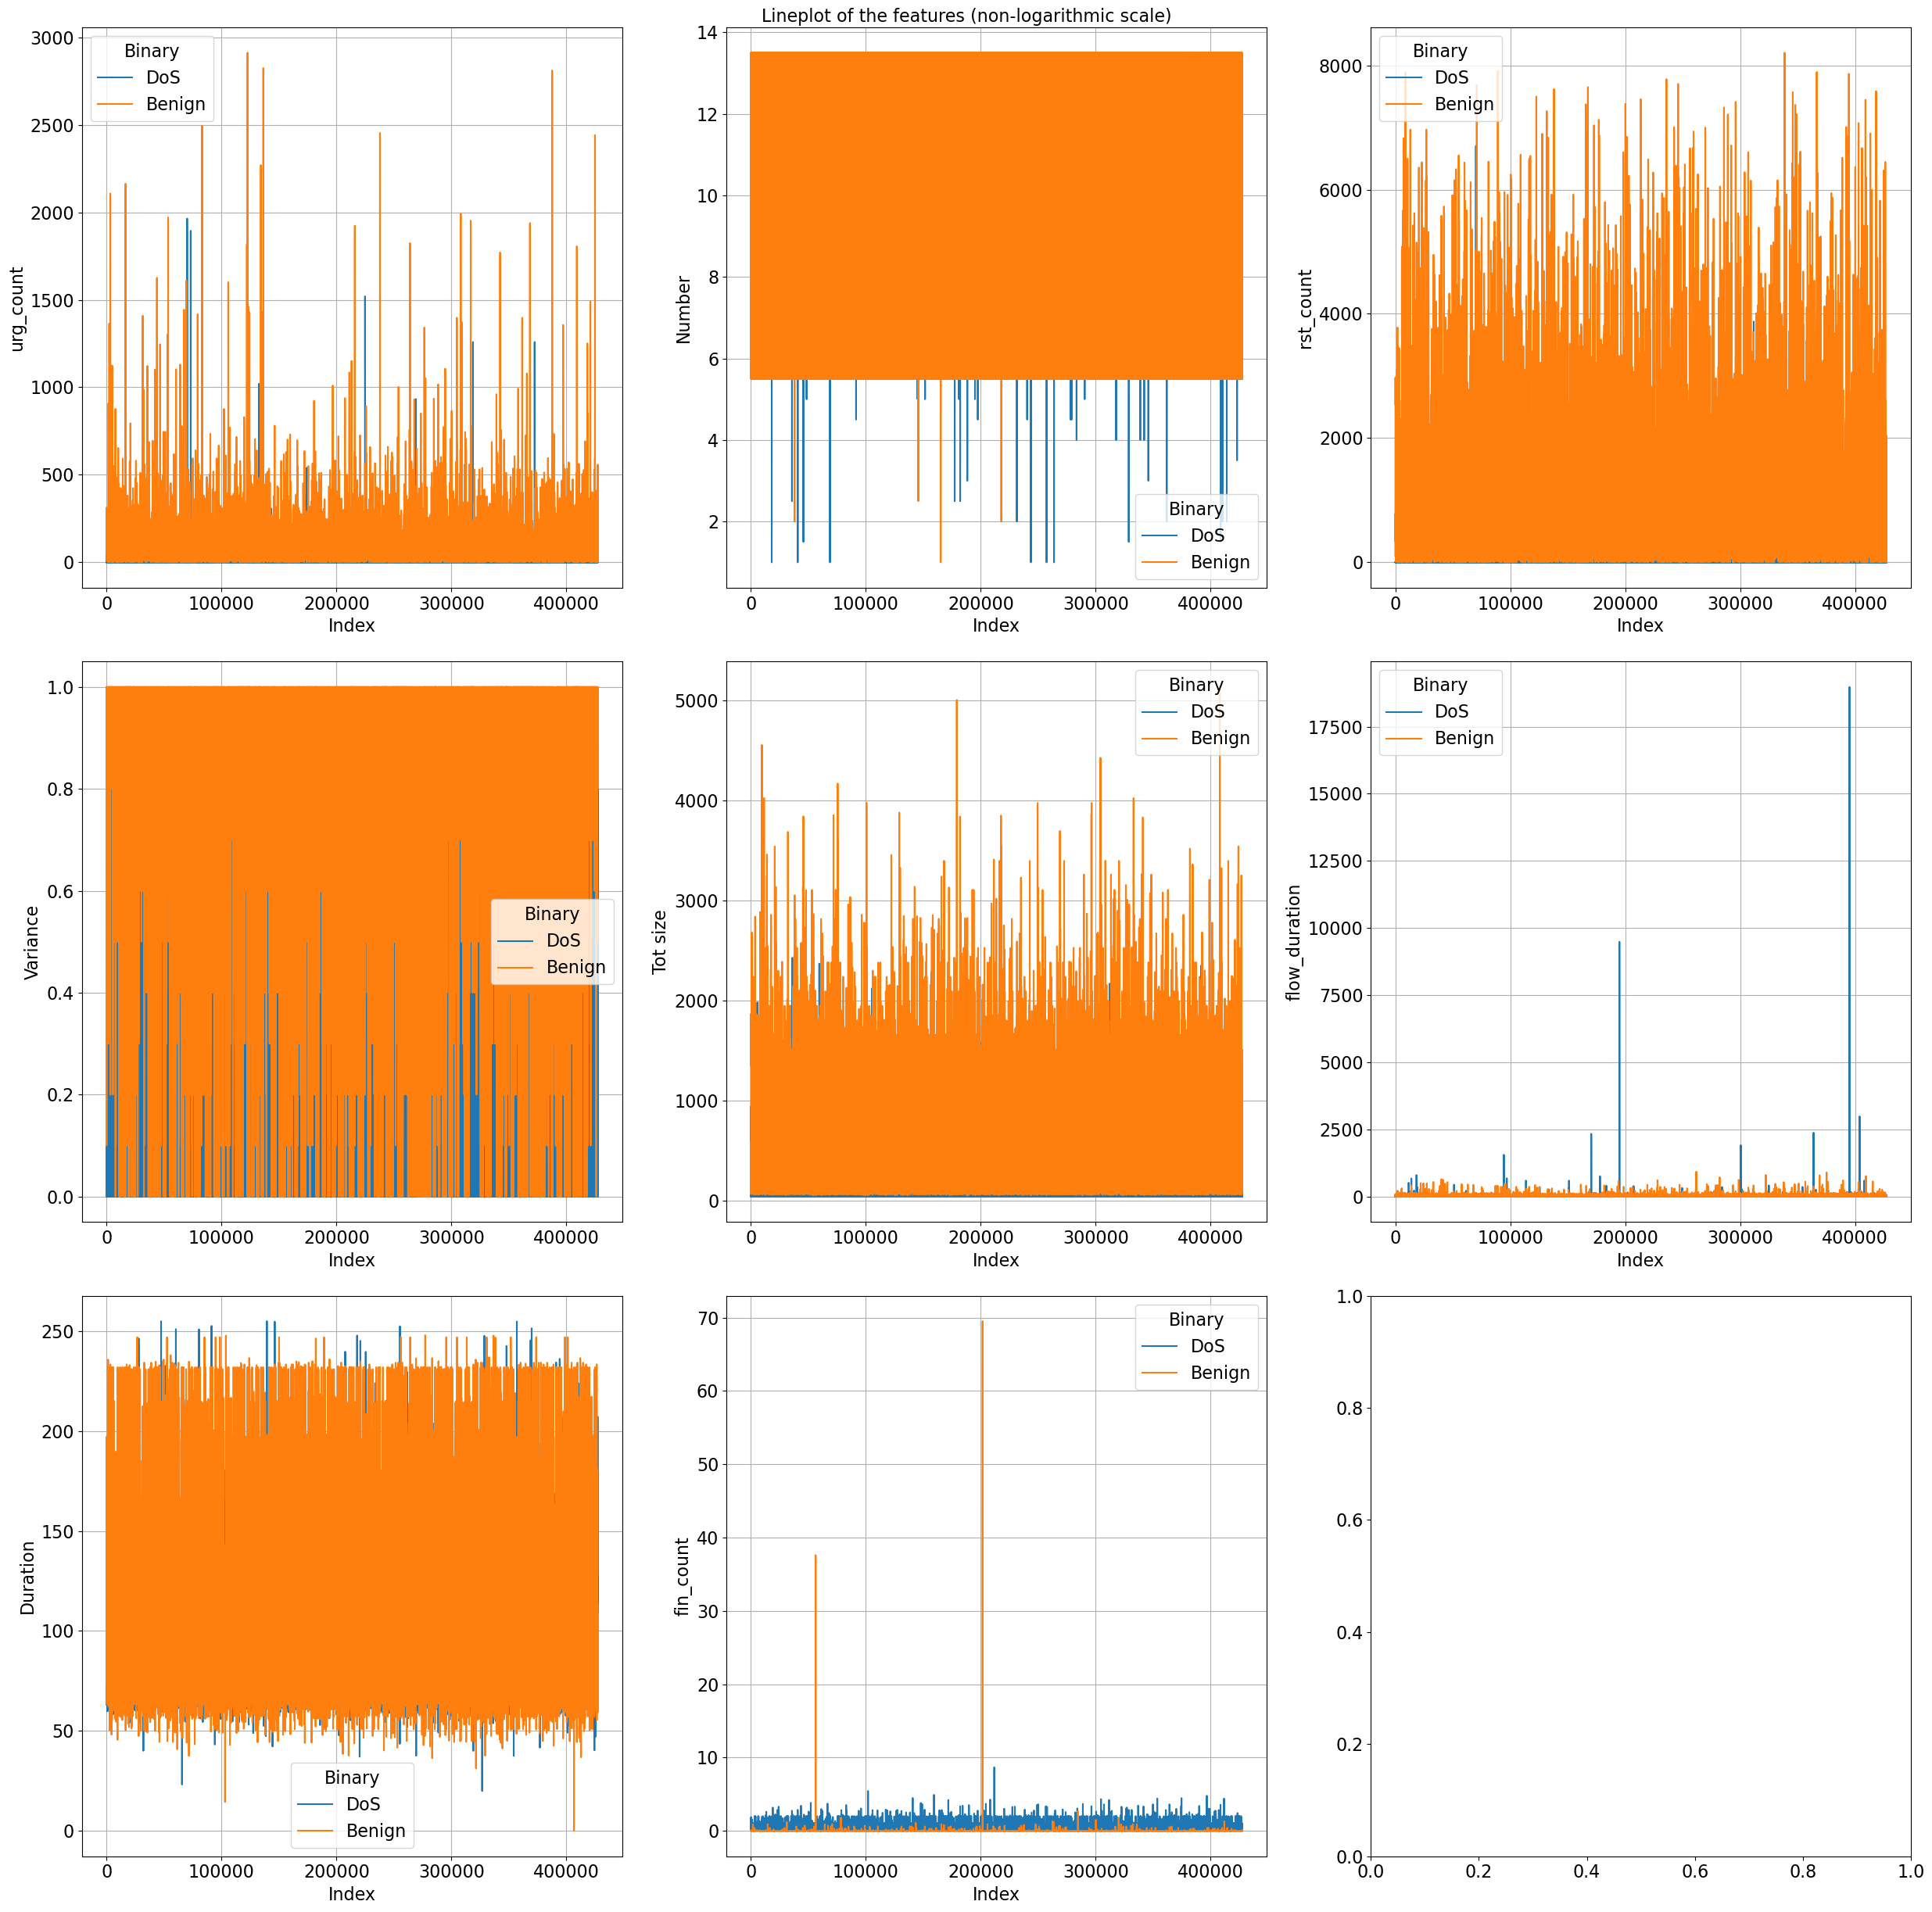

In [8]:
import matplotlib as mpl

# Setting the parameters as suggested in the error message
mpl.rcParams['agg.path.chunksize'] = 10000

# Load selected X columns
selected_X = pd.read_csv(model_path_binary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))

plot_correlation_matrix(read_csv_file(train_sets[0], file_path)[selected_X], model_path_binary+'Correlation Matrix (sf).png', 'Correlation Matrix (sf)', lower=True)
# plot_correlation_matrix(read_csv_file(train_sets[0], file_path)[X_columns], model_path_binary+'Correlation Matrix (all features).png', 'Correlation Matrix (all features)', labels=False, lower=True)

if len(selected_X) > 10:
    new_selected_X = selected_X[:10]
else:
    new_selected_X = selected_X
    
pairplot_binary = new_selected_X.copy()
pairplot_binary.append('Binary')
plot_pairplot(read_csv_file(train_sets[0], file_path)[pairplot_binary].iloc[:1000], model_path_binary+'Pairplot.png', 'Binary', 'Pairplot')

plot_boxplot(read_csv_file(train_sets[0], file_path)[selected_X], model_path_binary+'Boxplot.png', 'Boxplot')

# print("Nb features:", len(selected_X))
plot_kde_plot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'KDE plot (logarithmic scale).png', 'Binary', figsize=(25, 20), yscaleLog=True)
plot_kde_plot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'KDE plot (non-logarithmic scale).png', 'Binary', figsize=(25, 20), yscaleLog=False)

plot_lineplot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'Lineplot (logarithmic scale).png', 'Binary', figsize=(25, 25), yscaleLog=True)
plot_lineplot(read_csv_file(train_sets[0], file_path), selected_X, model_path_binary+'Lineplot (non-logarithmic scale).png', 'Binary', figsize=(25, 25), yscaleLog=False)

## Display performance

In [10]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_binary)
performance = performance.drop(0).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_binary + performance_path, index=False)

In [9]:
read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

Model  Accuracy Training  Recall Training  \
6                       GBoost           1.000000         1.000000   
1                          XGB           1.000000         1.000000   
13  Selected Features Adaboost           1.000000         1.000000   
0                           RF           1.000000         1.000000   
4                          Cat           1.000000         1.000000   
12    Selected Features GBoost           1.000000         1.000000   
11       Selected Features XGB           1.000000         1.000000   
7                     Adaboost           1.000000         1.000000   
9         Selected Features ET           1.000000         1.000000   
10        Selected Features ET           1.000000         1.000000   
3                           ET           1.000000         1.000000   
5                        LIGHT           1.000000         1.000000   
8                          MLP           0.999973         0.999909   
2                           DT           1.000000         1.000000   

    Precision Training  F1 Training  Accuracy Testing  Recall Testing  \
6             0.999999     0.999999          0.999994        0.999976   
1             0.999999     1.000000          0.999994        0.999961   
13            1.000000     1.000000          0.999994        0.999979   
0             1.000000     1.000000          0.999994        0.999973   
4             1.000000     1.000000          0.999994        0.999963   
12            0.999991     0.999996          0.999993        0.999932   
11            0.999995     0.999997          0.999993        0.999942   
7             1.000000     1.000000          0.999992        0.999931   
9             1.000000     1.000000          0.999990        0.999945   
10            1.000000     1.000000          0.999990        0.999945   
3             1.000000     1.000000          0.999990        0.999948   
5             1.000000     1.000000          0.999989        0.999896   
8             0.999540     0.999724          0.999976        0.999866   
2             1.000000     1.000000          0.999928        0.999445   

    Precision Testing  F1 Testing       FU_rate   FL_rate   FU   FL  \
6            0.999909    0.999943  1.082634e-06  0.000005    8   34   
1            0.999914    0.999937  1.894609e-06  0.000004   14   32   
13           0.999893    0.999936  9.473047e-07  0.000005    7   40   
0            0.999898    0.999936  1.217963e-06  0.000005    9   38   
4            0.999906    0.999934  1.759280e-06  0.000005   13   35   
12           0.999926    0.999929  3.383231e-06  0.000004   25   27   
11           0.999913    0.999928  2.841914e-06  0.000004   21   32   
7            0.999902    0.999917  3.383231e-06  0.000005   25   36   
9            0.999847    0.999896  2.571256e-06  0.000008   19   57   
10           0.999847    0.999896  2.571256e-06  0.000008   19   57   
3            0.999842    0.999895  2.435926e-06  0.000008   18   59   
5            0.999880    0.999888  5.142511e-06  0.000006   38   44   
8            0.999654    0.999760  6.360474e-06  0.000017   47  129   
2            0.999109    0.999277  2.706585e-05  0.000045  200  330   

    Total rows  
6      7389386  
1      7389386  
13     7389386  
0      7389386  
4      7389386  
12     7389386  
11     7389386  
7      7389386  
9      7389386  
10     7389386  
3      7389386  
5      7389386  
8      7389386  
2      7389386

In [4]:
df=read_csv_file(performance_path, model_path_binary).sort_values(by=['Accuracy Testing', 'F1 Testing', 'Recall Testing', 'Precision Testing'], ascending=False).head(20)
df=df[['Accuracy Testing', 'Recall Testing','Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate', 'FU', 'FL']]

#  Convert DataFrame to LaTeX table
latex_table = df.to_latex(index=True)

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Accuracy Testing &  Recall Testing &  Precision Testing &  F1 Testing &   FU\_rate &   FL\_rate &   FU &   FL \\
\midrule
6 &          0.999994 &        0.999976 &           0.999909 &    0.999943 &  0.000001 &  0.000005 &    8 &   34 \\
1 &          0.999994 &        0.999961 &           0.999914 &    0.999937 &  0.000002 &  0.000004 &   14 &   32 \\
0 &          0.999994 &        0.999973 &           0.999898 &    0.999936 &  0.000001 &  0.000005 &    9 &   38 \\
4 &          0.999994 &        0.999963 &           0.999906 &    0.999934 &  0.000002 &  0.000005 &   13 &   35 \\
7 &          0.999992 &        0.999931 &           0.999902 &    0.999917 &  0.000003 &  0.000005 &   25 &   36 \\
3 &          0.999990 &        0.999948 &           0.999842 &    0.999895 &  0.000002 &  0.000008 &   18 &   59 \\
5 &          0.999989 &        0.999896 &           0.999880 &    0.999888 &  0.000005 &  0.000006 &   38 &   44 \\
8 &          0.999976 & 

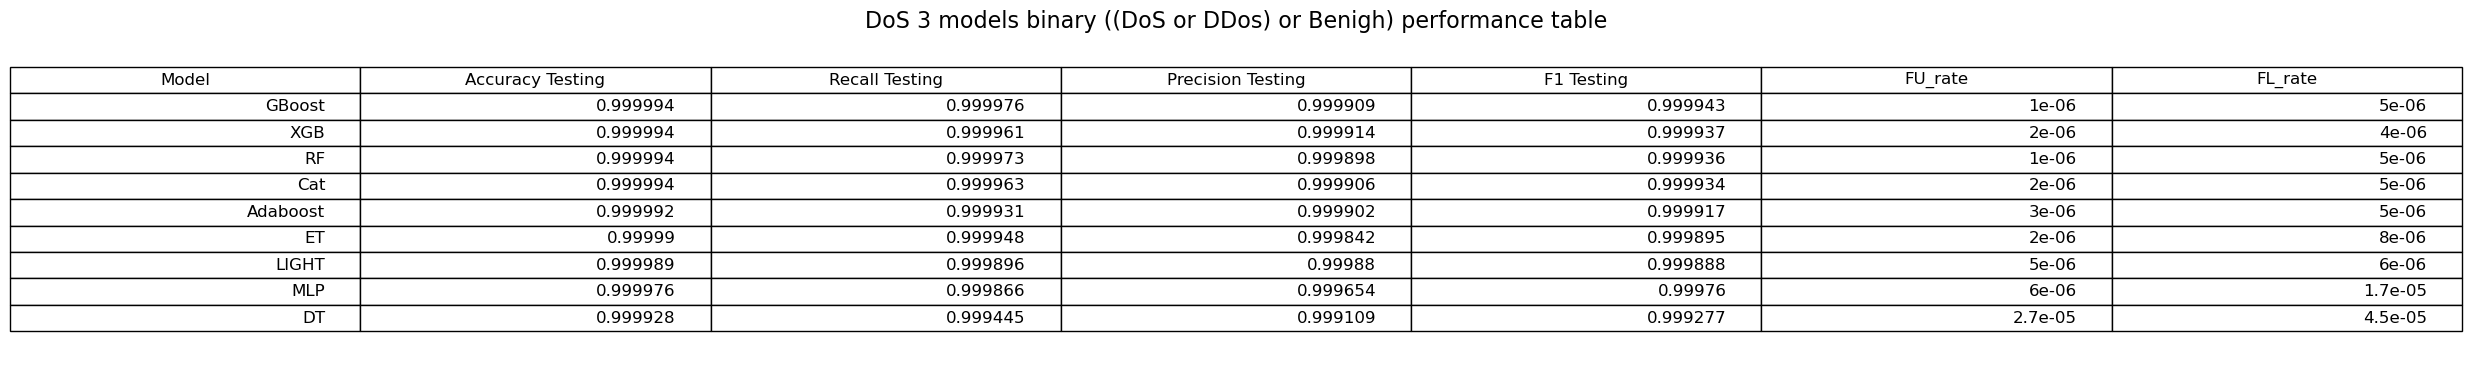

In [21]:
# Performance table
performance_table = read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(30)
performance_table = performance_table[['Model', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate']]
performance_table = performance_table.round(6)

plot_performance_table(performance_table, model_path_binary+'Performance table.png', 'DoS 3 models binary ((DoS or DDos) or Benigh) performance table', figsize=(25, 4))

## Do prediction for after build sets

In [5]:
# Define model
model_path = '.\\DoS_model\\Binary\\'
model = joblib.load(model_path + 'model_XGB.joblib')

try:
    # scaler = joblib.load(model_path+'scaler.joblib')
    encoder = joblib.load(model_path+'encoder.joblib')
except:
    raise Exception("Please, build models first")

# Get prediction
X_test, y_test, y_pred, z_test = get_prediction_by_model(model, after_build_sets, file_path, X_columns, y_column=z_column, z_column=y_column, scale=True, encode=True, scaler=scaler, encoder=encoder)

# Build new dataframe and save it
new_after_build_set_scaled = pd.DataFrame(X_test, columns=X_columns)
new_after_build_set_scaled[z_column] = encoder.inverse_transform(y_test)
new_after_build_set_scaled['Prediction'] = encoder.inverse_transform(y_pred)
# new_after_build_set_scaled['Trinary'] = trinary_col.values
new_after_build_set_scaled[y_column] = z_test
count = len(new_after_build_set_scaled[new_after_build_set_scaled[z_column] != new_after_build_set_scaled['Prediction']])

new_after_build_set_scaled.to_csv('.\\DoS_model\\after_build_set_scaled.csv', index=False)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set_scaled) * 100,len(new_after_build_set_scaled)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows'])

del new_after_build_set_scaled

res.head()

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:30<00:00,  1.62s/it]


Accuracy    Recall  Precision        F1  Mispredicted count  \
0  0.999992  0.999992   0.999992  0.999992                  67   

   Mispredicted rate  Total rows  
0            0.00077     8703485

# Second model Binary (DDoS or DoS)

## New column dictionnary

In [6]:
dict_3_classes = {}
dict_3_classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_3_classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_3_classes['DDoS-SYN_Flood'] = 'DDoS'
dict_3_classes['DDoS-UDP_Flood'] = 'DDoS'
dict_3_classes['DDoS-TCP_Flood'] = 'DDoS'
dict_3_classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_3_classes['DDoS-SlowLoris'] = 'DDoS'
dict_3_classes['DDoS-HTTP_Flood'] = 'DDoS'
dict_3_classes['DoS-UDP_Flood'] = 'DoS'
dict_3_classes['DoS-SYN_Flood'] = 'DoS'
dict_3_classes['DoS-TCP_Flood'] = 'DoS'
dict_3_classes['DoS-HTTP_Flood'] = 'DoS'

dict_3_classes['BenignTraffic'] = 'Other'
dict_3_classes['Mirai-greeth_flood'] = 'Other'
dict_3_classes['Mirai-greip_flood'] = 'Other'
dict_3_classes['Mirai-udpplain'] = 'Other'
dict_3_classes['Recon-PingSweep'] = 'Other'
dict_3_classes['Recon-OSScan'] = 'Other'
dict_3_classes['Recon-PortScan'] = 'Other'
dict_3_classes['VulnerabilityScan'] = 'Other'
dict_3_classes['Recon-HostDiscovery'] = 'Other'
dict_3_classes['DNS_Spoofing'] = 'Other'
dict_3_classes['MITM-ArpSpoofing'] = 'Other'
dict_3_classes['BrowserHijacking'] = 'Other'
dict_3_classes['Backdoor_Malware'] = 'Other'
dict_3_classes['XSS'] = 'Other'
dict_3_classes['Uploading_Attack'] = 'Other'
dict_3_classes['SqlInjection'] = 'Other'
dict_3_classes['CommandInjection'] = 'Other'
dict_3_classes['DictionaryBruteForce'] = 'Other'

## New column adding

In [ ]:
temp_df = build_sets.copy()
temp_df.extend(after_build_sets)
add_column_by_another_to_datasets(file_path, temp_df, 'Trinary', 'label', dict_3_classes)

In [7]:
add_column_by_another_to_datasets('.\\DoS_model\\', ['after_build_set_scaled.csv'], 'Trinary', 'label', dict_3_classes)

100%|██████████| 1/1 [03:24<00:00, 204.72s/it]


## Build model and Display these performance

In [19]:
simpleModelsDef = [
    {
       "Name": "DT",
       "Model": DecisionTreeClassifier(random_state = 42)
    },
    #{
    #    "Name": "RF",
    #    "Model": RandomForestClassifier(random_state = 42)
    #},
    #{
    #    "Name": "ET",
    #    "Model": ExtraTreesClassifier(random_state = 42)
    #},
    {
       "Name": "XGB",
       "Model": XGBClassifier(random_state = 42)
    },
    # {
    #     "Name": "Cat",
    #     "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    # },
    # {
    #     "Name": "LIGHT",
    #     "Model": LGBMClassifier(random_state = 42, verbose = 0)
    # },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    # {
    #     "Name": "MLP",
    #     "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    # },
]

In [20]:
filter_name = [
    {'name': 'DoS', 'type': '='},
    {'name': 'Other', 'type': '!'}
]
filter_cols = ['Binary', 'Trinary']

['IAT', 'Header_Length', 'Tot sum', 'flow_duration', 'Rate', 'Protocol Type', 'syn_count', 'Number', 'Duration', 'fin_count', 'psh_flag_number']


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


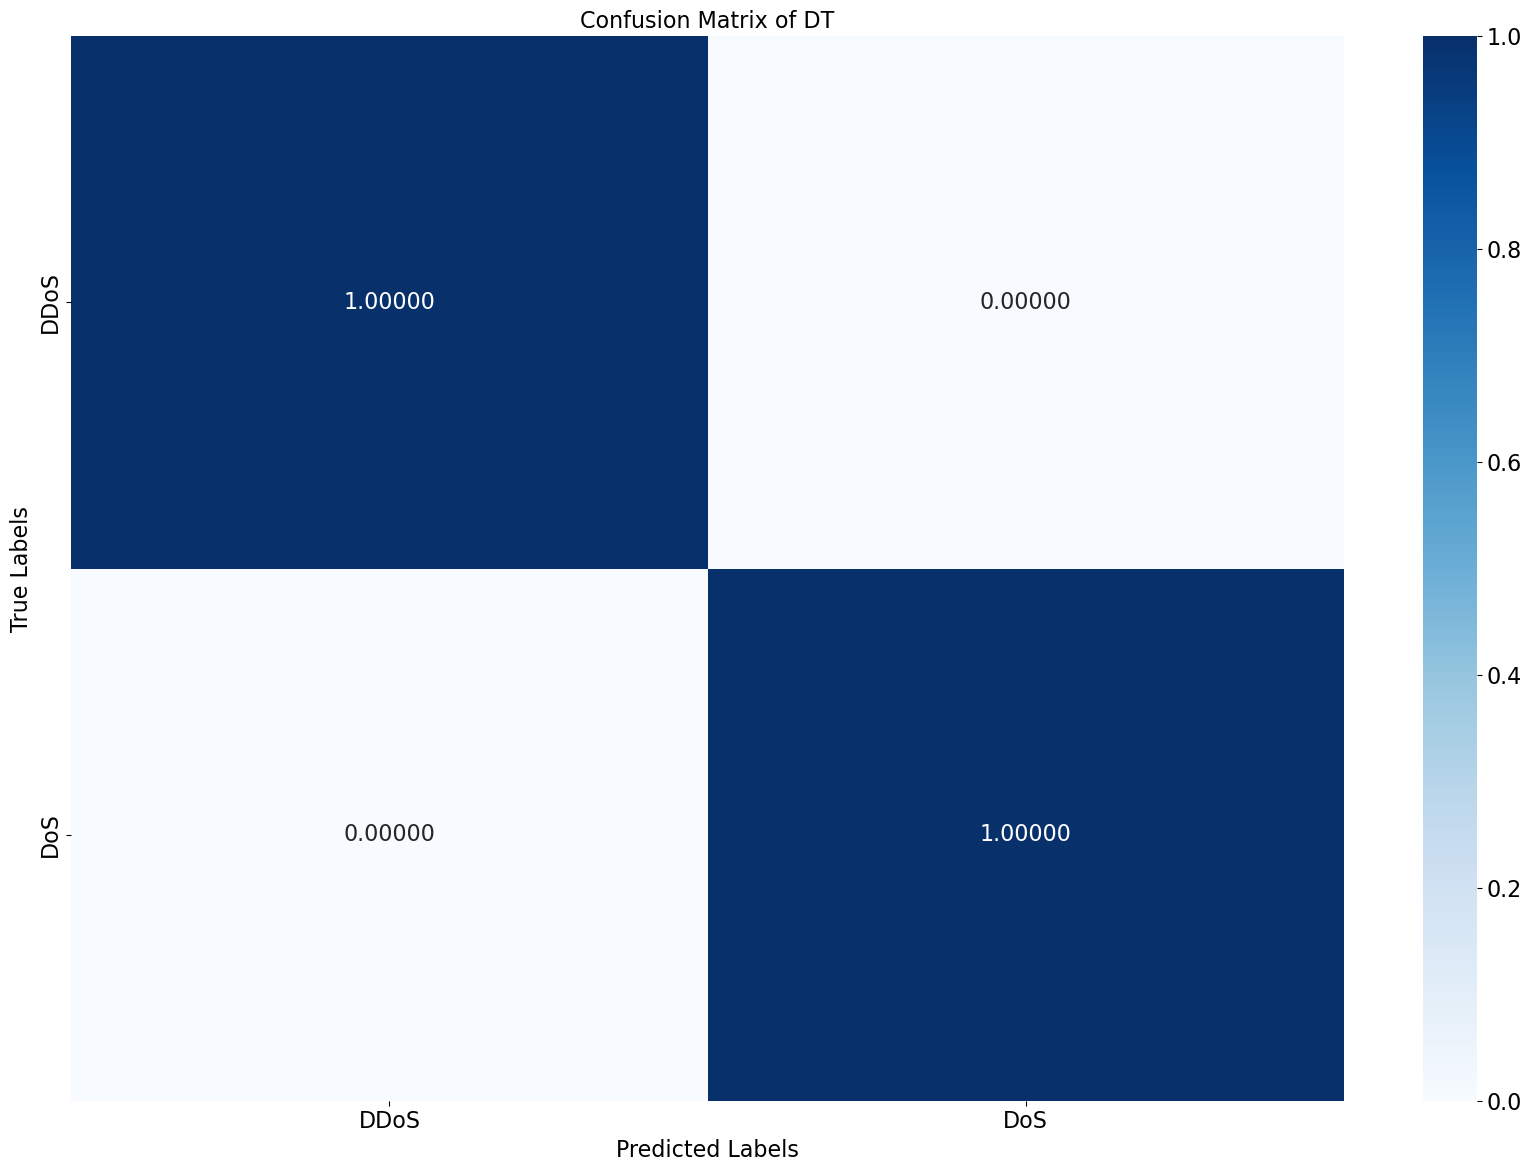

100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


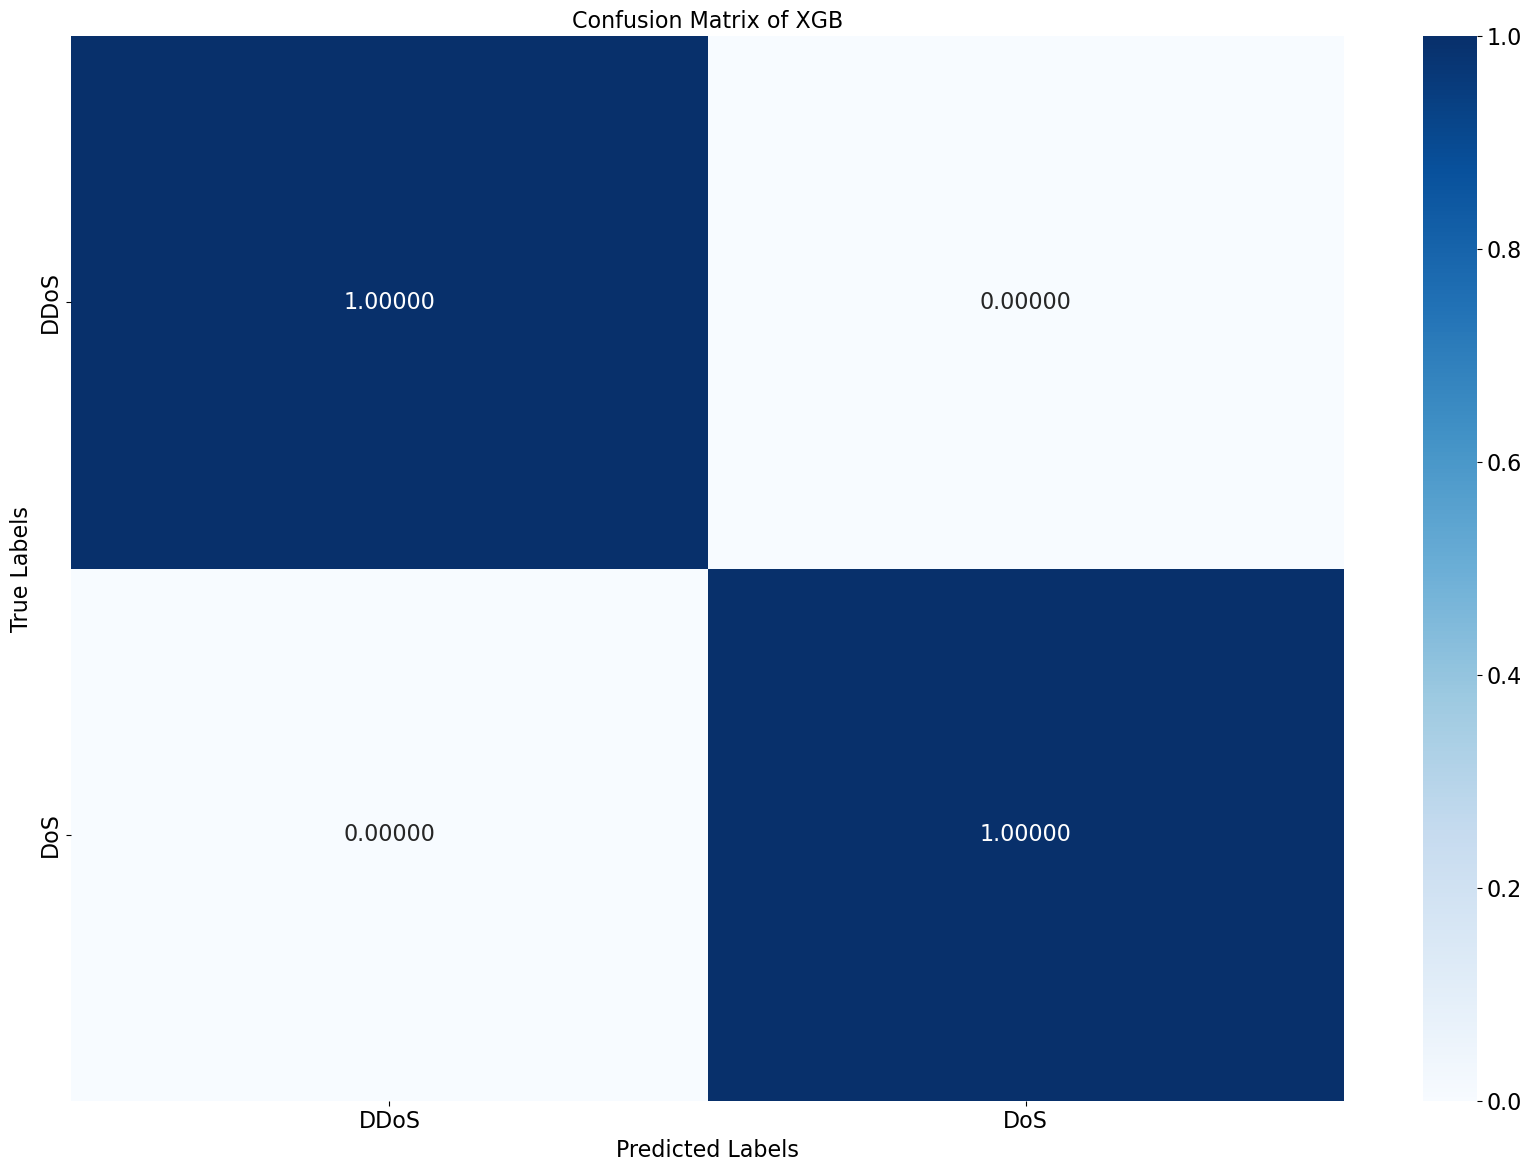

100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


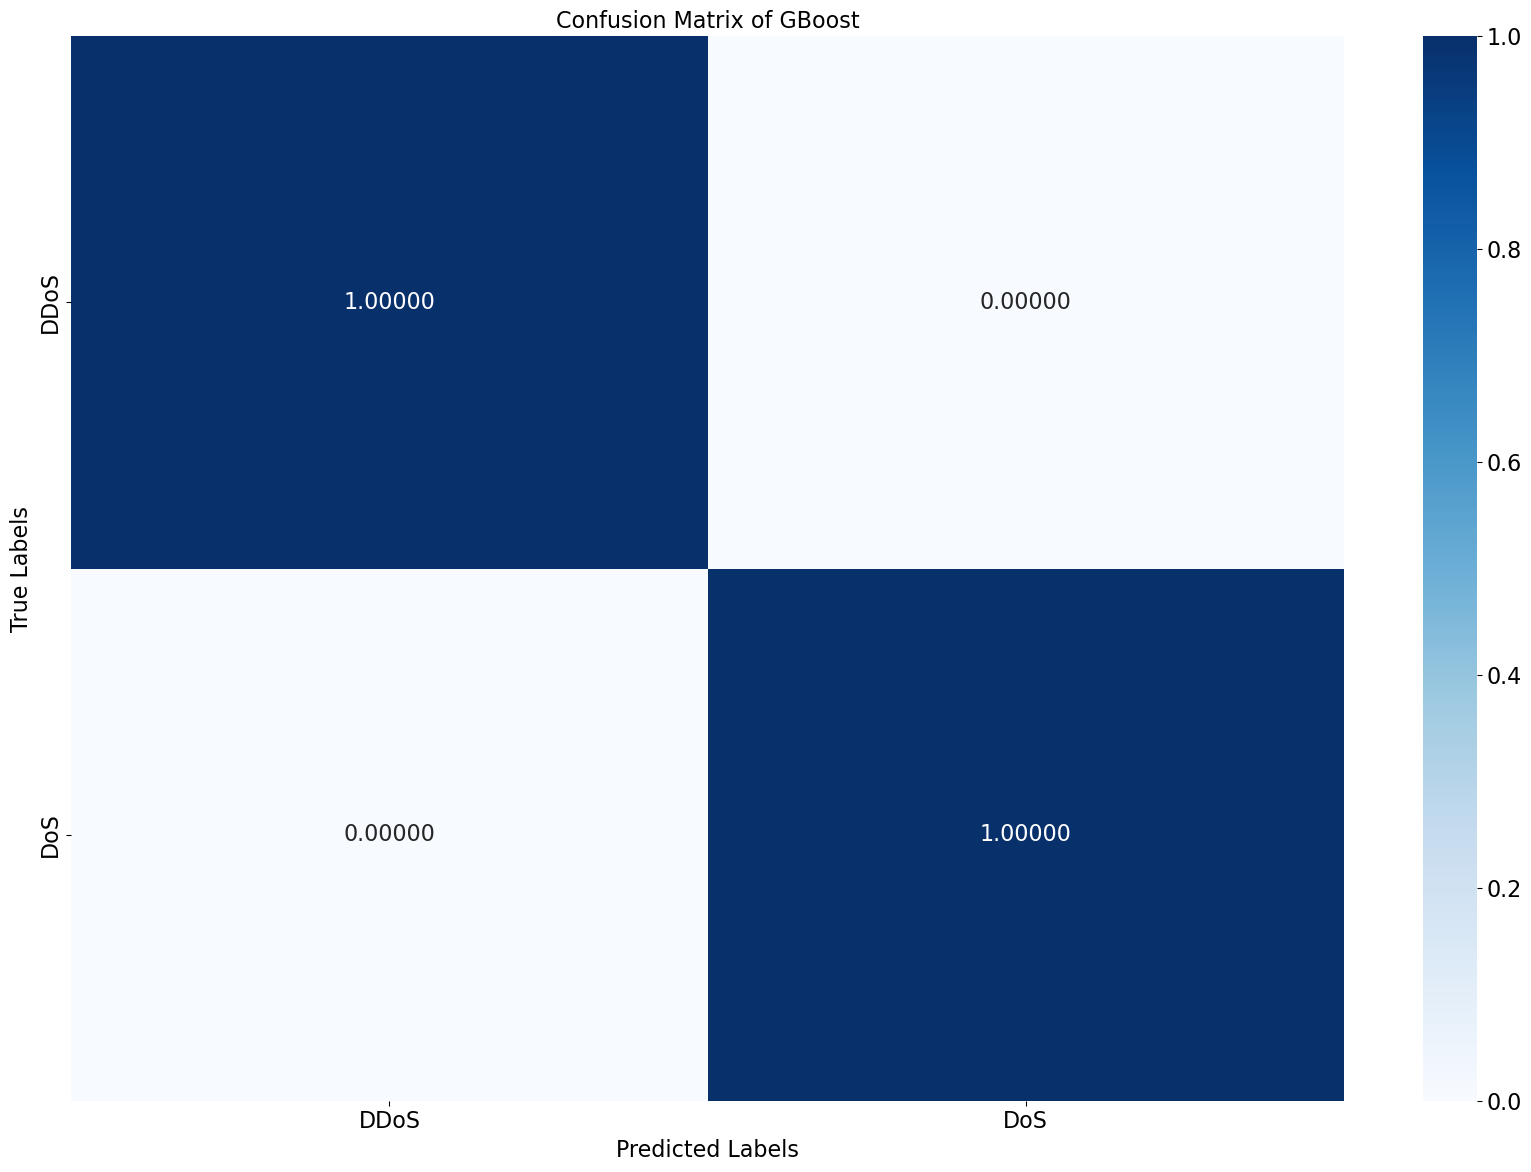

100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


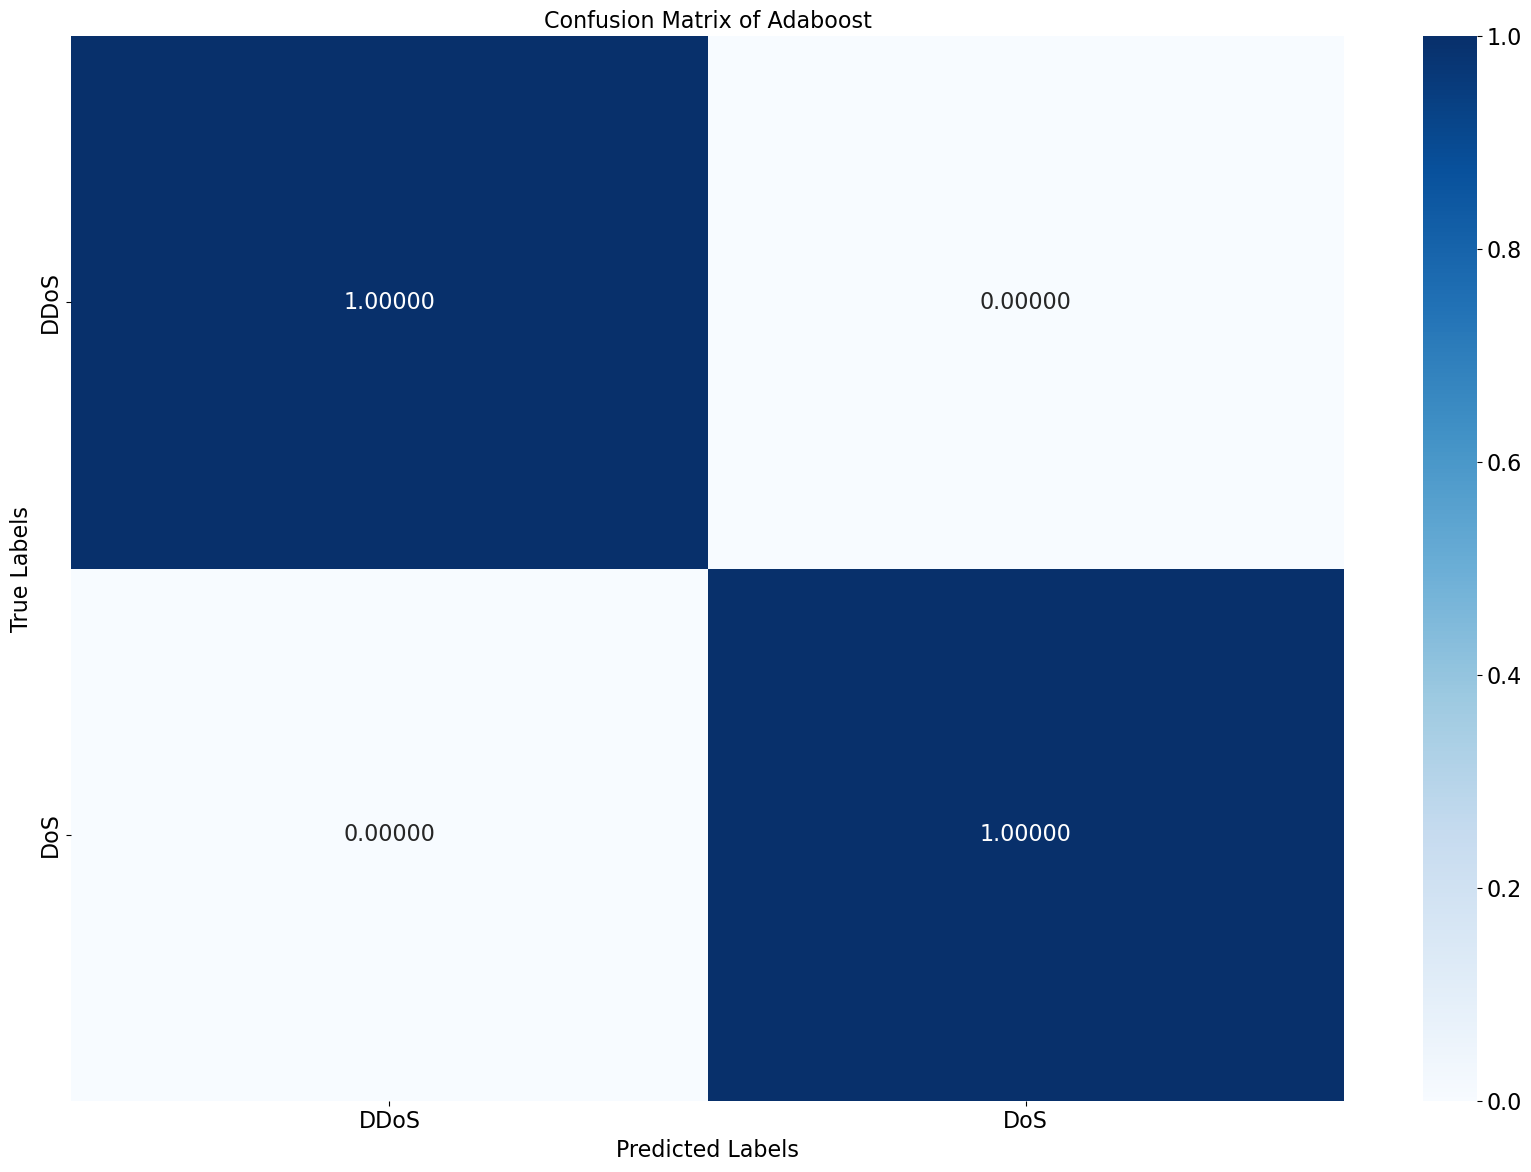

100%|██████████| 4/4 [1:20:14<00:00, 1203.70s/it]


['.\\DoS_system_3_models\\Trinary\\encoder.joblib']

In [21]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_trinary)
performance = get_or_define_performance_df(model_path_trinary, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_path_trinary+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))
print(selected_X)
y_column = 'Trinary'

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (17, 12)
saveConfusionMatrix = True
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'SF_' + model['Name'], train_sets, test_sets, file_path, performance, model_path_trinary + 'SF_', X_columns=selected_X , y_column=y_column, filter_cols=filter_cols, filter_bool=True, \
                                                     filter_name=filter_name, scaler=scaler, encoder=encoder, confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_path_trinary+'SF_'+model['Name'], figsize=figsizeConfusionMatrix, modelLabel=model['Name'])

    # Save performance
    performance.to_csv(model_path_trinary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_trinary+'encoder.joblib')

In [11]:
encoder = joblib.load(model_path_trinary+'encoder.joblib')
num_classes = encoder.classes_
print("Nombre de classes :", len(num_classes), num_classes)

Nombre de classes : 2 ['DDoS' 'DoS']


## Feature Importance

In [17]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_trinary+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_path_trinary+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_path_trinary+'model_XGB.joblib')
    },
    {
        "Name": "Cat",
        "Model": joblib.load(model_path_trinary+'model_Cat.joblib')
    },
    {
        "Name": "LIGHT",
        "Model": joblib.load(model_path_trinary+'model_LIGHT.joblib')
    },
    {
        "Name": "GBoost",
        "Model": joblib.load(model_path_trinary+'model_GBoost.joblib')
    },
    {
        "Name": "Adaboost",
        "Model": joblib.load(model_path_trinary+'model_Adaboost.joblib')
    },
]

100%|██████████| 7/7 [00:00<00:00, 215.89it/s]


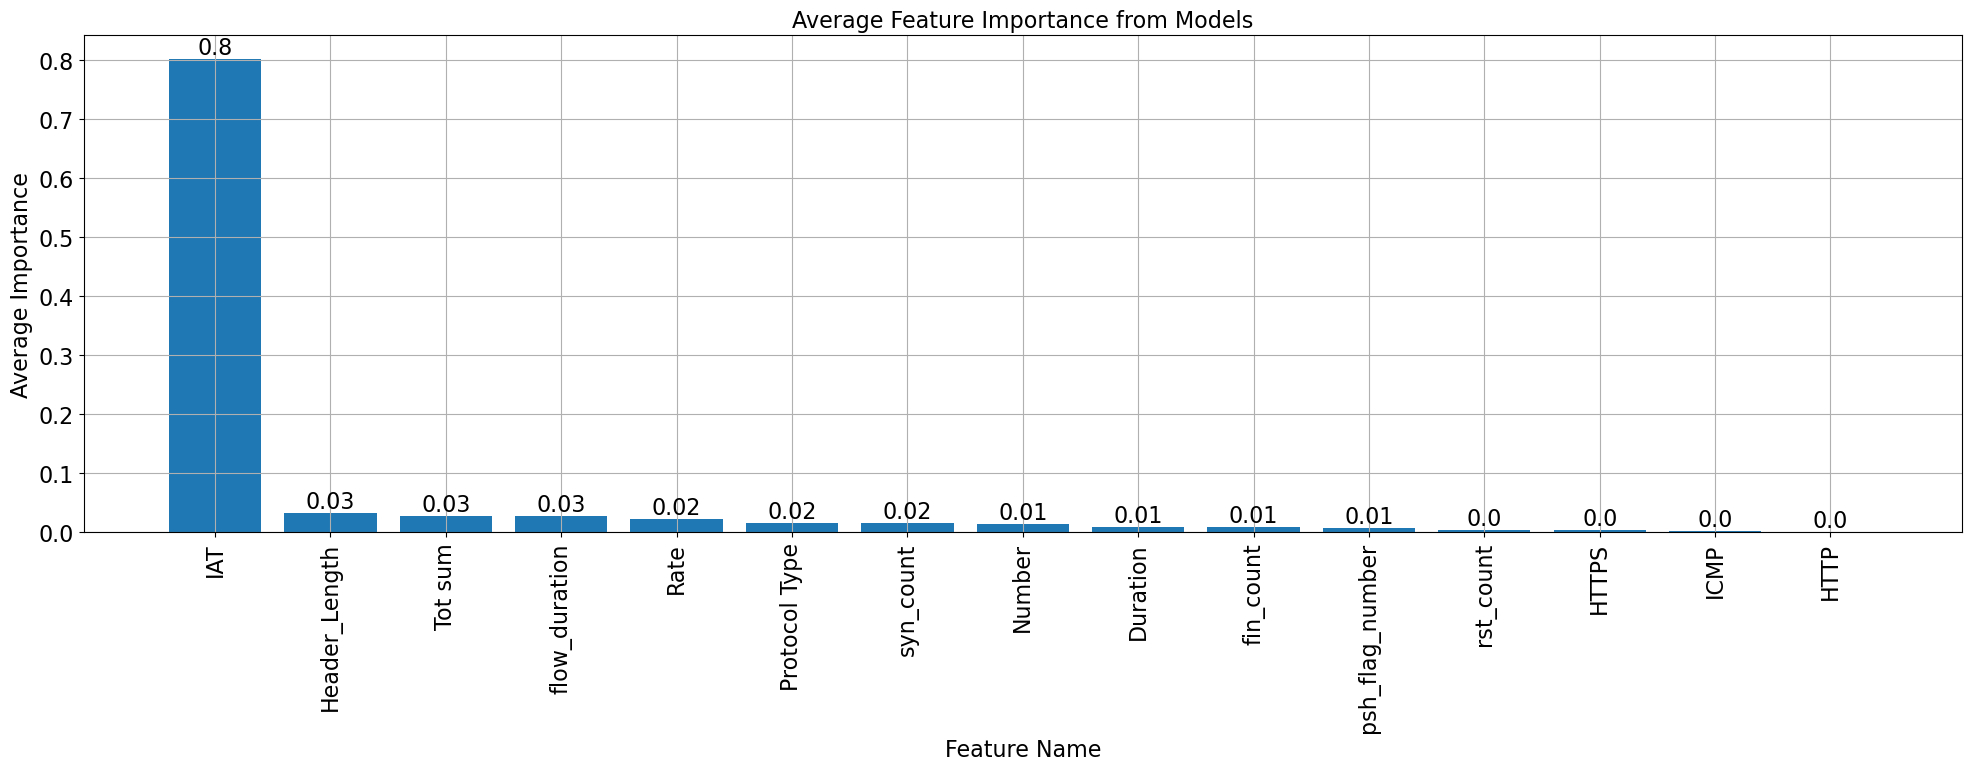

[0.80244601 0.83555979 0.8639613  0.8911812  0.91325845 0.92997532
 0.94647347 0.96124426 0.97028763 0.97890948 0.98690947 0.99186352
 0.99594282 0.99763355 0.99908291 0.99999952 0.99999993 1.
 1.        ]


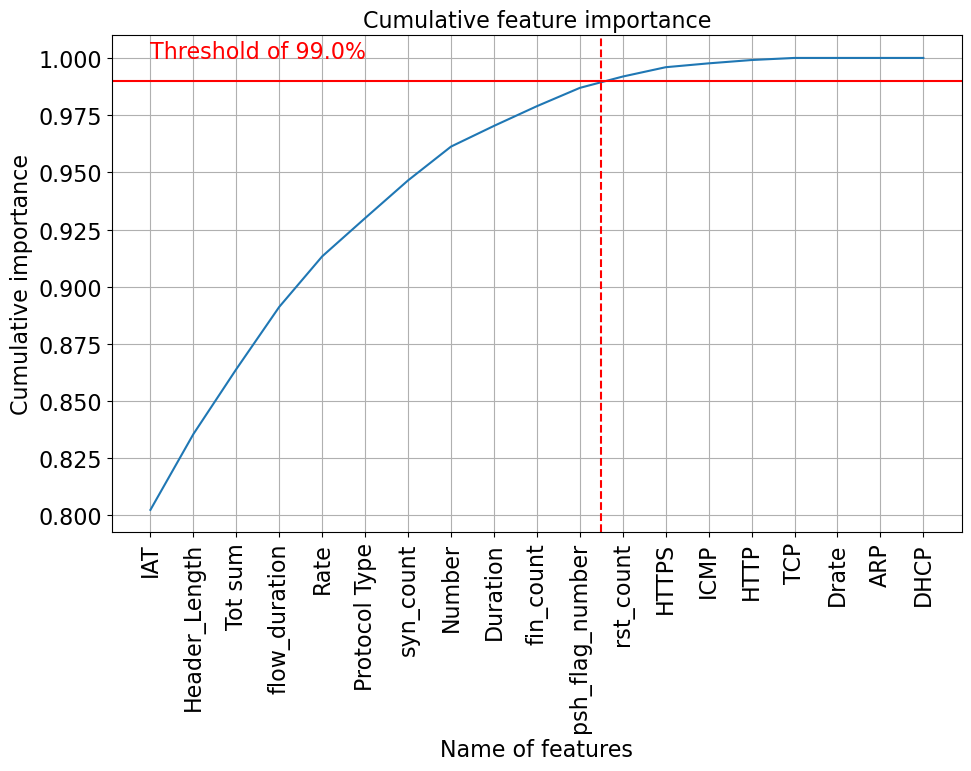

            Feature  Average Importance
0               IAT            0.721988
1     Header_Length            0.029794
2           Tot sum            0.025554
3     flow_duration            0.024491
4              Rate            0.019864
7     Protocol Type            0.015041
8         syn_count            0.014844
9            Number            0.013290
12         Duration            0.008137
13        fin_count            0.007757
15  psh_flag_number            0.007198


100%|██████████| 61/61 [01:23<00:00,  1.37s/it]


In [18]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_path_trinary, all_features=True, figsize=(20, 8))
average_importance_df.to_csv(model_path_trinary+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\DoS_3_models\\Trinary\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_path_trinary+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

# Remove features with correlation > 0.80
threshold = 0.80
dataset = read_csv_file(train_sets[0], file_path)
dataset = multi_filter_df(dataset, filter_cols, filter_name)
features_with_threshold_corr = remove_features_with_correlation_and_feature_importance(dataset[X_columns], average_importance_df, model_path_trinary, figsize=(20, 8), threshold=threshold)
# print(features_with_threshold_corr.head(features_with_threshold_corr.size))

# Select features with cumulative importance > 0.95 and correlation < 0.80
selected_X = select_features_by_importance(features_with_threshold_corr['Feature'].values, features_with_threshold_corr['Average Importance'].values, model_path_trinary, threshold_percentage=0.99)
pd.DataFrame(selected_X).to_csv(model_path_trinary+'selected_X_columns.csv', index=False)
# print(selected_X)

filtered_df = average_importance_df[average_importance_df['Feature'].isin(selected_X)]
print(filtered_df.head(filtered_df.size))

# Define and fit scaler
scaler = MinMaxScaler()
for set in tqdm(build_sets + after_build_sets):
    scaler.fit(read_csv_file(set, file_path)[selected_X])

## Display performance

In [11]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_trinary)
performance = performance.drop(0).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_trinary + performance_path, index=False)

In [23]:
read_csv_file(performance_path, model_path_trinary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(50)

Model  Accuracy Training  Recall Training  Precision Training  \
3           XGB           1.000000         1.000000            1.000000   
19       SF_XGB           1.000000         1.000000            1.000000   
7        GBoost           0.999968         0.999933            0.999965   
0            DT           1.000000         1.000000            1.000000   
20    SF_GBoost           0.999960         0.999912            0.999957   
17        SF_DT           1.000000         1.000000            1.000000   
18        SF_DT           1.000000         1.000000            1.000000   
6      Adaboost           0.999928         0.999840            0.999930   
1            RF           1.000000         1.000000            1.000000   
21  SF_Adaboost           0.999912         0.999806            0.999911   
16       SF_XGB           1.000000         1.000000            1.000000   
4           Cat           0.999880         0.999707            0.999908   
5         LIGHT           0.999949         0.999875            0.999962   
11       SF_XGB           1.000000         1.000000            1.000000   
15        SF_DT           1.000000         1.000000            1.000000   
8         SF_DT           0.999997         0.999998            0.999998   
9         SF_RF           0.999996         0.999998            0.999998   
2            ET           1.000000         1.000000            1.000000   
12       SF_Cat           0.998304         0.996154            0.995790   
10        SF_ET           1.000000         1.000000            1.000000   
14  SF_Adaboost           0.604024         0.522184            0.555798   
13     SF_LIGHT           0.424356         0.274185            0.307406   

    F1 Training  Accuracy Testing  Recall Testing  Precision Testing  \
3      1.000000          0.999908        0.999826           0.999877   
19     1.000000          0.999904        0.999815           0.999876   
7      0.999949          0.999904        0.999803           0.999888   
0      1.000000          0.999896        0.999811           0.999854   
20     0.999935          0.999895        0.999781           0.999882   
17     1.000000          0.999892        0.999798           0.999853   
18     1.000000          0.999892        0.999798           0.999853   
6      0.999885          0.999867        0.999696           0.999876   
1      1.000000          0.999860        0.999712           0.999837   
21     0.999859          0.999849        0.999674           0.999839   
16     1.000000          0.999843        0.998545           0.999110   
4      0.999807          0.999784        0.999514           0.999792   
5      0.999919          0.999784        0.999535           0.999769   
11     1.000000          0.999640        0.998909           0.999174   
15     1.000000          0.999608        0.995779           0.994979   
8      0.999998          0.999489        0.997987           0.997639   
9      0.999998          0.999425        0.996385           0.994999   
2      1.000000          0.998350        0.996531           0.998147   
12     0.995970          0.997984        0.988885           0.988552   
10     1.000000          0.996778        0.974903           0.972687   
14     0.516745          0.636204        0.542870           0.617816   
13     0.281691          0.134510        0.098423           0.130315   

    F1 Testing   FU_rate   FL_rate       FU       FL  Total rows  
3     0.999852  0.000033  0.000059      238      425     7201481  
19    0.999845  0.000033  0.000063      235      456     7201481  
7     0.999845  0.000027  0.000069      192      500     7201481  
0     0.999833  0.000041  0.000063      295      453     7201481  
20    0.999832  0.000027  0.000078      192      561     7201481  
17    0.999825  0.000040  0.000068      289      491     7201481  
18    0.999825  0.000040  0.000068      289      491     7201481  
6     0.999786  0.000021  0.000112      151      805     7201481  
1     0.999774  0.000038

In [10]:
df=read_csv_file(performance_path, model_path_trinary).sort_values(by=['Accuracy Testing', 'F1 Testing', 'Recall Testing', 'Precision Testing'], ascending=False).head(20)
df=df[['Accuracy Testing', 'Recall Testing','Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate', 'FU', 'FL']]

#  Convert DataFrame to LaTeX table
latex_table = df.to_latex(index=True)

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Accuracy Testing &  Recall Testing &  Precision Testing &  F1 Testing &   FU\_rate &   FL\_rate &       FU &       FL \\
\midrule
3  &          0.999908 &        0.999826 &           0.999877 &    0.999852 &  0.000033 &  0.000059 &      238 &      425 \\
7  &          0.999904 &        0.999803 &           0.999888 &    0.999845 &  0.000027 &  0.000069 &      192 &      500 \\
0  &          0.999896 &        0.999811 &           0.999854 &    0.999833 &  0.000041 &  0.000063 &      295 &      453 \\
6  &          0.999867 &        0.999696 &           0.999876 &    0.999786 &  0.000021 &  0.000112 &      151 &      805 \\
1  &          0.999860 &        0.999712 &           0.999837 &    0.999774 &  0.000038 &  0.000102 &      276 &      732 \\
4  &          0.999784 &        0.999514 &           0.999792 &    0.999652 &  0.000038 &  0.000178 &      272 &     1281 \\
5  &          0.999784 &        0.999535 &           0.999769 &    0.999652 & 

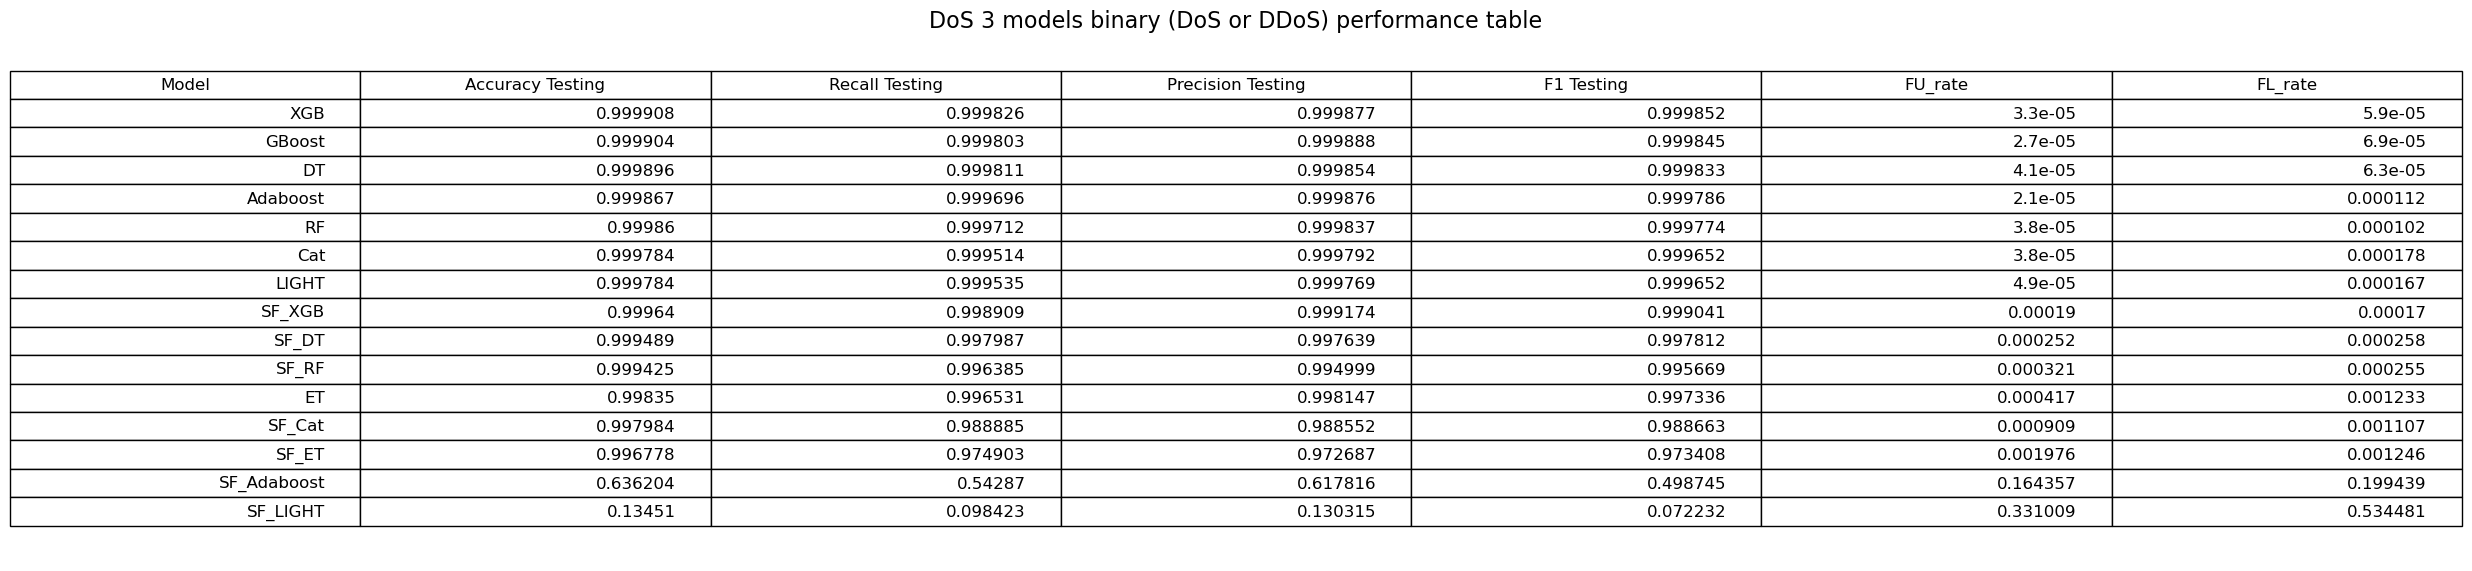

In [24]:
# Performance table
performance_table = read_csv_file(performance_path, model_path_trinary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(50)
performance_table = performance_table[['Model', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate']]
performance_table = performance_table.round(6)

plot_performance_table(performance_table, model_path_trinary+'Performance table.png', 'DoS 3 models binary (DoS or DDoS) performance table', figsize=(25, 6))

## Trinary prediction on already Binary predicted after build set 

In [9]:
model_path = '.\\DoS_model\\Trinary\\'
filter_name = [
    {'name': 'DoS', 'type': '='},
    {'name': 'Other', 'type': '!'}
]
filter_cols = ['Prediction', 'Trinary']

# Define model
model = joblib.load(model_path + 'model_XGB.joblib')

# Get predicted data
df = read_csv_file('after_build_set_scaled.csv', '.\\DoS_model\\')
print(len(df))
df = df[df['Prediction'] == 'DoS']
df = df[df['Trinary'] != 'Other']
print(len(df))
df.head()

# Get x, y and z
binary_col = df['Binary']
prediction_col = df['Prediction']
label_col = df[y_column]
del df

try:
    encoder = joblib.load(model_path+'encoder.joblib')
except:
    raise Exception("Please, build models first")

# Get prediction
X_test, y_test, y_pred = get_prediction_by_model_multifiltered(model, ['after_build_set_scaled.csv'], '.\\DoS_model\\', X_columns, y_column='Trinary', filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)
print(np.array(X_test).shape)

# Build new dataframe and save it
new_after_build_set_scaled = pd.DataFrame(X_test, columns=X_columns)
new_after_build_set_scaled[y_column] = label_col.values
new_after_build_set_scaled['Trinary'] = y_test
new_after_build_set_scaled['Trinary Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set_scaled['Binary'] = binary_col.values
new_after_build_set_scaled['Prediction'] = prediction_col.values
count = len(new_after_build_set_scaled[new_after_build_set_scaled['Trinary'] != new_after_build_set_scaled['Trinary Prediction']])
y_pred = encoder.inverse_transform(y_pred)

new_after_build_set_scaled.to_csv('.\\DoS_model\\after_build_set_scaled.csv', index=False)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set_scaled),len(new_after_build_set_scaled)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

del new_after_build_set_scaled

res.head()

8703485
8482125


100%|██████████| 1/1 [00:38<00:00, 38.42s/it]


(8482125, 46)


Accuracy    Recall  Precision        F1  Mispredicted count  \
0  0.999909  0.999909   0.999909  0.999909                 768   

   Mispredicted rate  Total rows  
0           0.000091     8482125

In [10]:
df = read_csv_file('after_build_set_scaled.csv', '.\\DoS_model\\')
df.head(40)

flow_duration  Header_Length  Protocol Type  Duration           Rate  \
0        4.523137         108.00           6.00     64.00       0.442171   
1        0.000000          54.00           6.00     64.00       7.362090   
2        0.000000          53.46           5.94     63.36     463.484612   
3        0.000000          54.00           6.00     64.00       2.730065   
4        0.125939       17028.92          16.50     66.56    5027.499047   
5        0.000000          54.00           6.00     64.00      11.477777   
6        0.000000           0.00           1.00     64.00       1.244309   
7        0.000000         182.00          17.00     64.00      62.697939   
8        0.019006       15910.00          17.00     64.00   16639.720789   
9        0.055484       21426.00          17.00     64.00    7527.965587   
10       0.000000           0.00           1.00     64.00      36.964479   
11       0.057944       24494.48          17.00     65.91    8432.615300   
12       0.024478       23958.00          16.84     65.91   19633.084466   
13       0.342391       14790.00          17.00     64.00    7095.407446   
14       0.027132       34996.50          16.84     65.91   25796.943435   
15       0.000000           0.00           1.00     64.00       3.638460   
16       0.077362       15411.00          17.00     64.00    5207.726844   
17       4.391875        4360.97           6.49     68.08       2.568660   
18       0.153294       24598.00          17.00     64.00   11642.360071   
19       0.000000          54.00           6.00     64.00       5.266705   
20       0.000000          53.46           5.94     63.36     202.757247   
21       2.337143          98.72           6.00     65.68       0.726936   
22       0.000000          54.00           6.00     64.00      27.015494   
23       0.000000         182.00          17.00     64.00       9.417466   
24       5.336360         132.84           6.00     64.00       0.410447   
25       0.000000          81.20           6.11     64.00      28.029578   
26       0.135765       22421.00          17.00     64.00    5479.777390   
27       0.025305           3.40           1.16     64.64      13.786664   
28       4.094609         108.00           6.00     64.00       0.488447   
29       0.000000          53.46           5.94     63.36       2.329200   
30       0.000000          53.46           5.94     63.36      25.299151   
31       0.000000           0.00           1.00     64.00       8.971553   
32       0.000000          54.00           6.00     64.00      24.029915   
33       0.000000          54.00           6.00     64.00       1.152038   
34       0.063375         124.89           6.00     63.91       7.122262   
35       0.000000          54.00           6.00     64.00       0.000000   
36       0.000000          55.76           6.11     65.91       1.945530   
37       0.000000          54.00           6.00     64.00  152520.145455   
38       0.010252       10048.50          16.83     63.36   20049.876592   
39       0.000000          54.00           6.00     64.00      26.925658   

            Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0        0.442171    0.0              0.0              0.0              0.0   
1        7.362090    0.0              1.0              0.0              1.0   
2      463.484612    0.0              0.0              0.0              0.0   
3        2.730065    0.0              0.0              0.0              0.0   
4     5027.499047    0.0              0.0              0.0              0.0   
5       11.477777    0.0              0.0              0.0              0.0   
6        1.244309    0.0              0.0              0.0              0.0   
7       62.697939    0.0              0.0              0.0              0.0   
8    16639.720789    0.0              0.0              0.0              0.0   
9     7527.965587    0.0              0.0              0.0              0.0   
10      36.964479 

In [27]:
del df

# Third model (DoS)

## Building model

In [9]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    # {
    #     "Name": "ET",
    #     "Model": ExtraTreesClassifier(random_state = 42)
    # },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    # {
    #     "Name": "Adaboost",
    #     "Model": AdaBoostClassifier(random_state = 42)
    # },
    # {
    #     "Name": "MLP",
    #     "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    # },
]

In [10]:
filter_name = [
    {'name': 'DoS', 'type': '='},
    {'name': 'DoS', 'type': '='},
]
filter_cols = ['Binary', 'Trinary']

In [31]:
encoder = joblib.load(model_path_all_classes_DoS+'encoder.joblib')
num_classes = encoder.classes_
print("Nombre de classes :", len(num_classes), num_classes)

Nombre de classes : 4 ['DoS-HTTP_Flood' 'DoS-SYN_Flood' 'DoS-TCP_Flood' 'DoS-UDP_Flood']


['IAT', 'syn_count', 'Protocol Type', 'fin_count', 'Min', 'Header_Length', 'rst_count', 'Variance', 'AVG', 'Duration', 'flow_duration', 'Rate', 'ack_flag_number', 'HTTP']


100%|██████████| 4/4 [00:00<00:00,  5.50it/s]


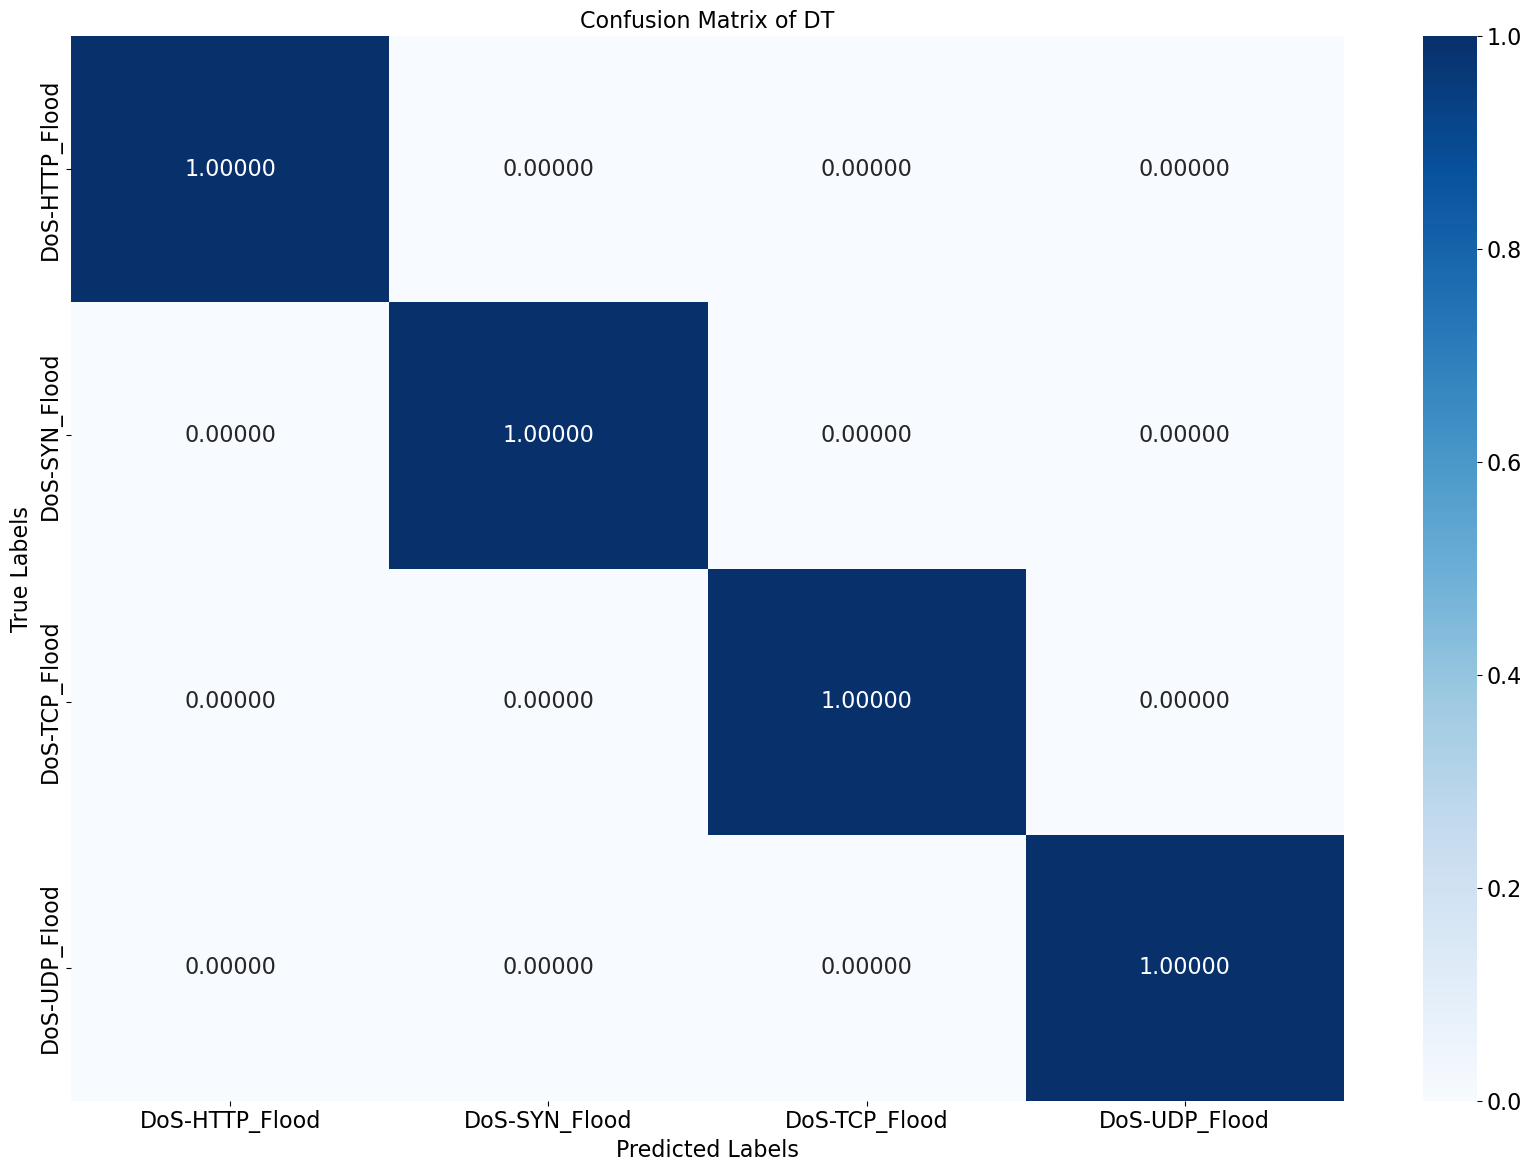

100%|██████████| 4/4 [00:00<00:00,  5.35it/s]


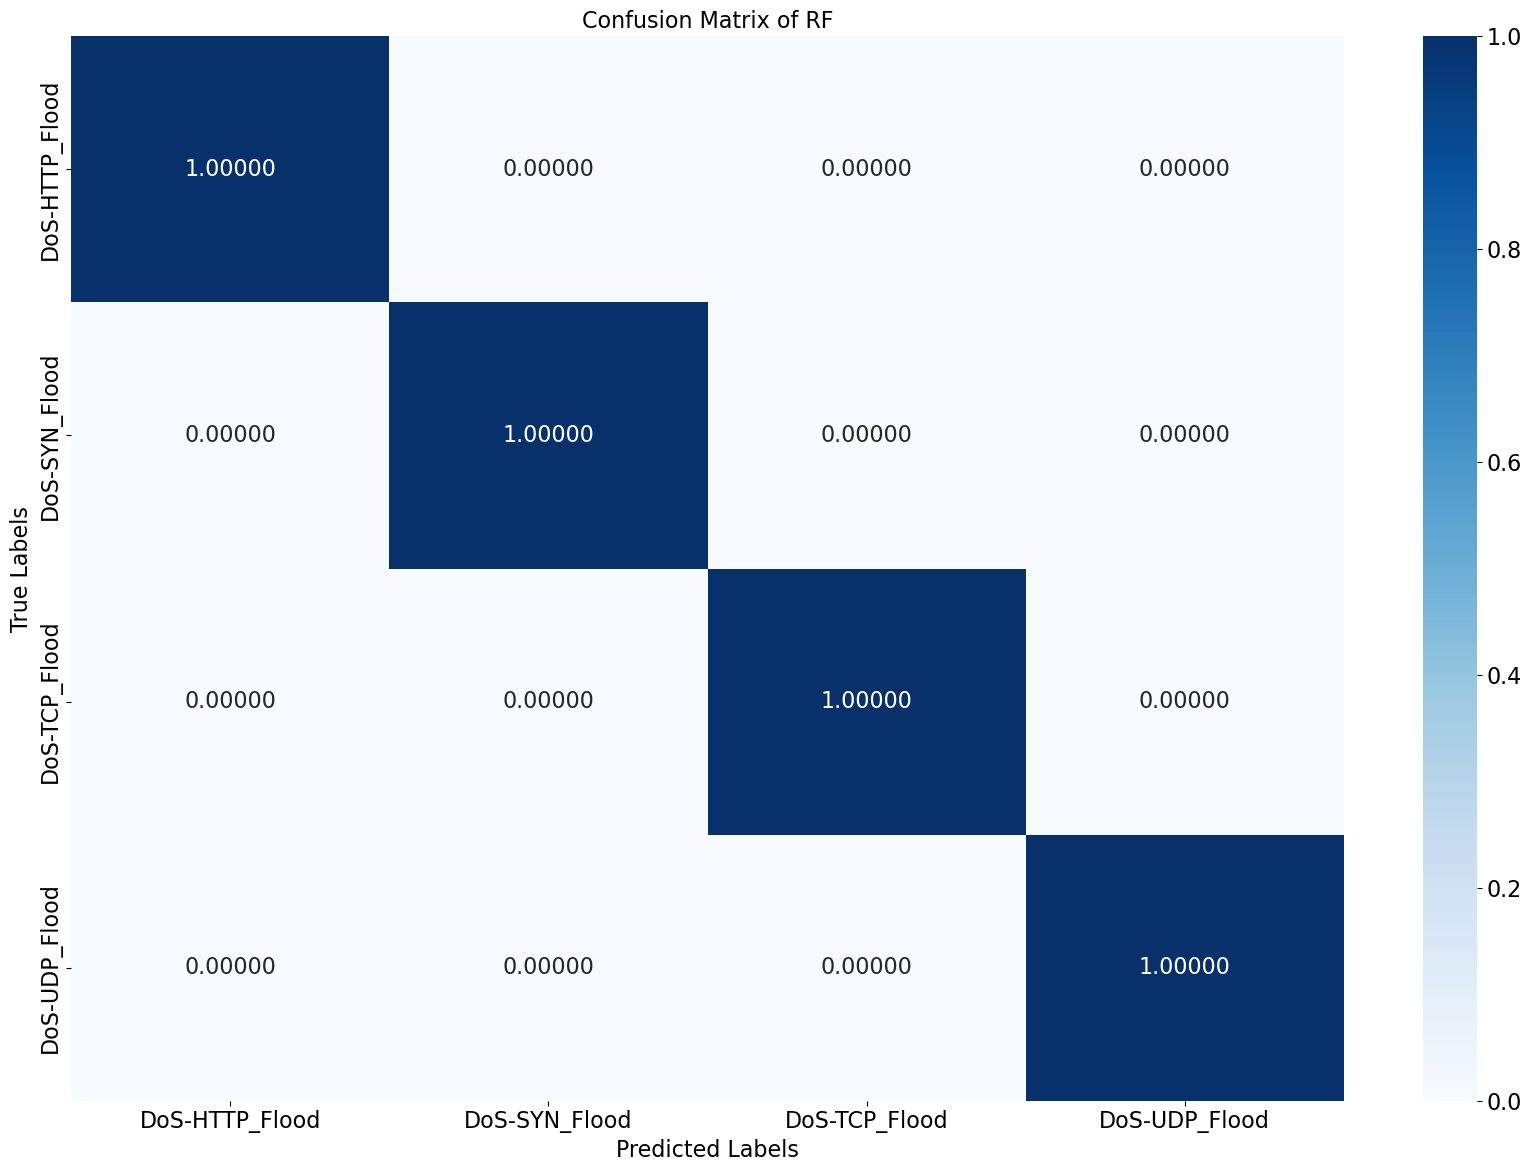

100%|██████████| 4/4 [00:00<00:00,  5.53it/s]


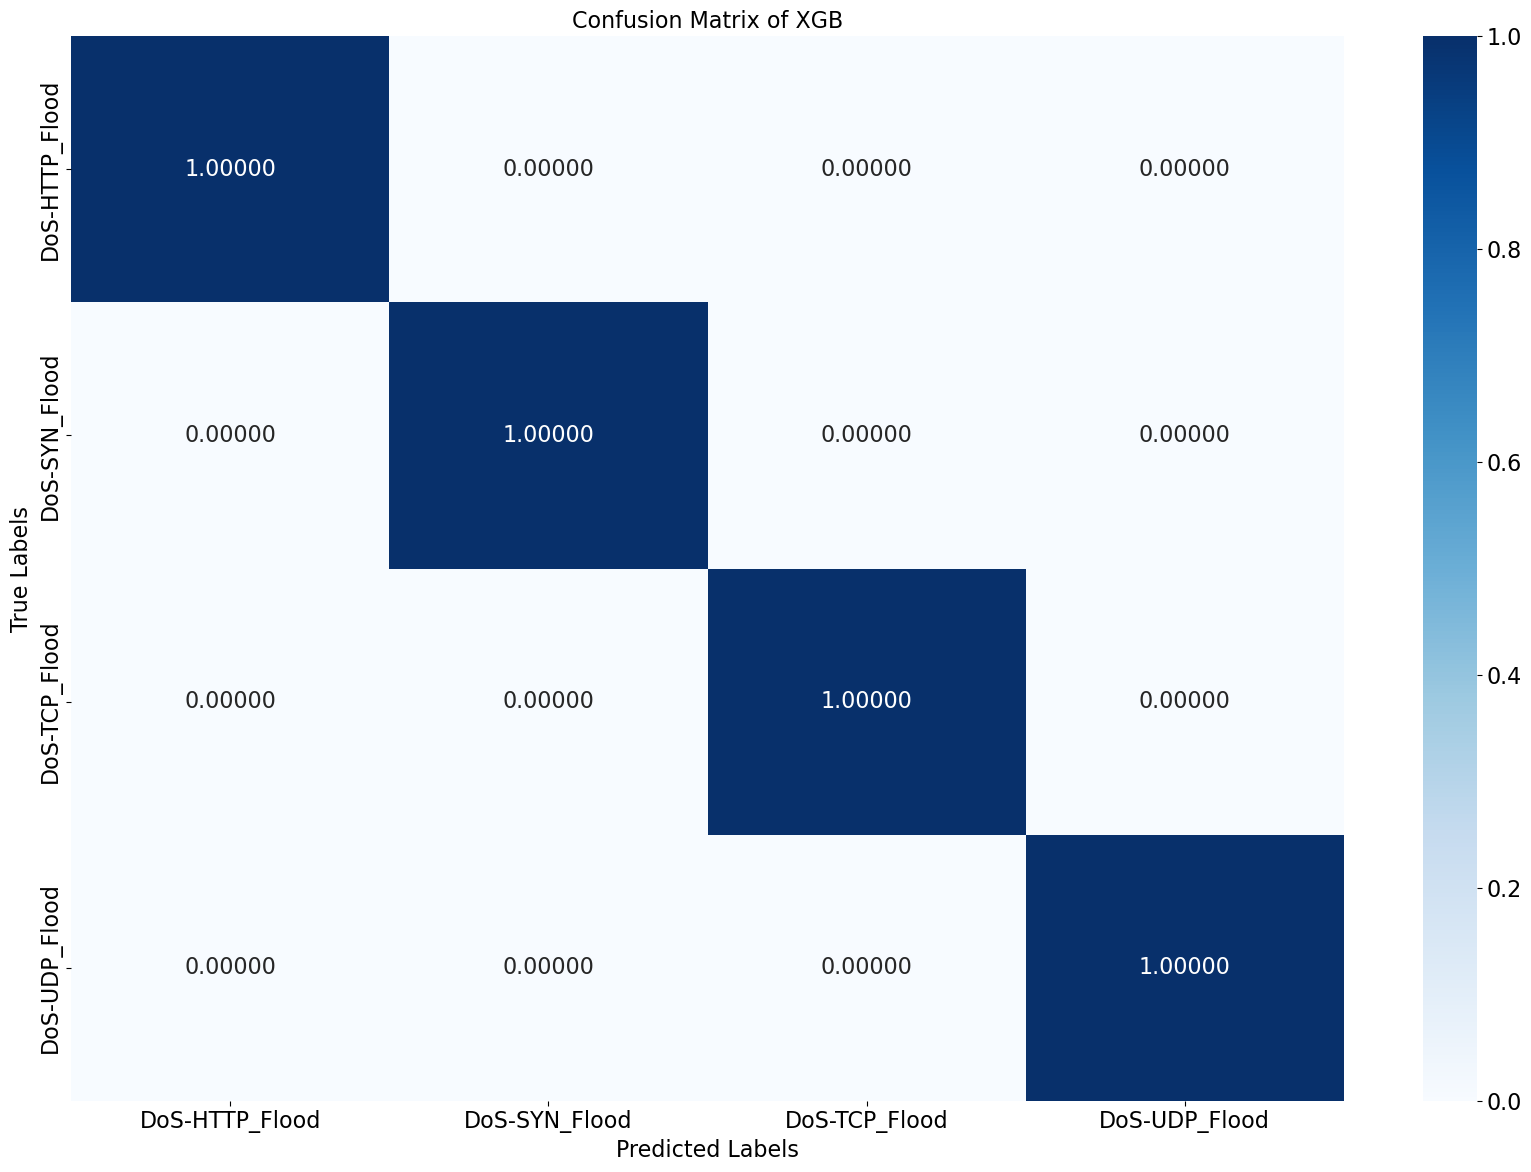

100%|██████████| 4/4 [00:00<00:00,  5.54it/s]


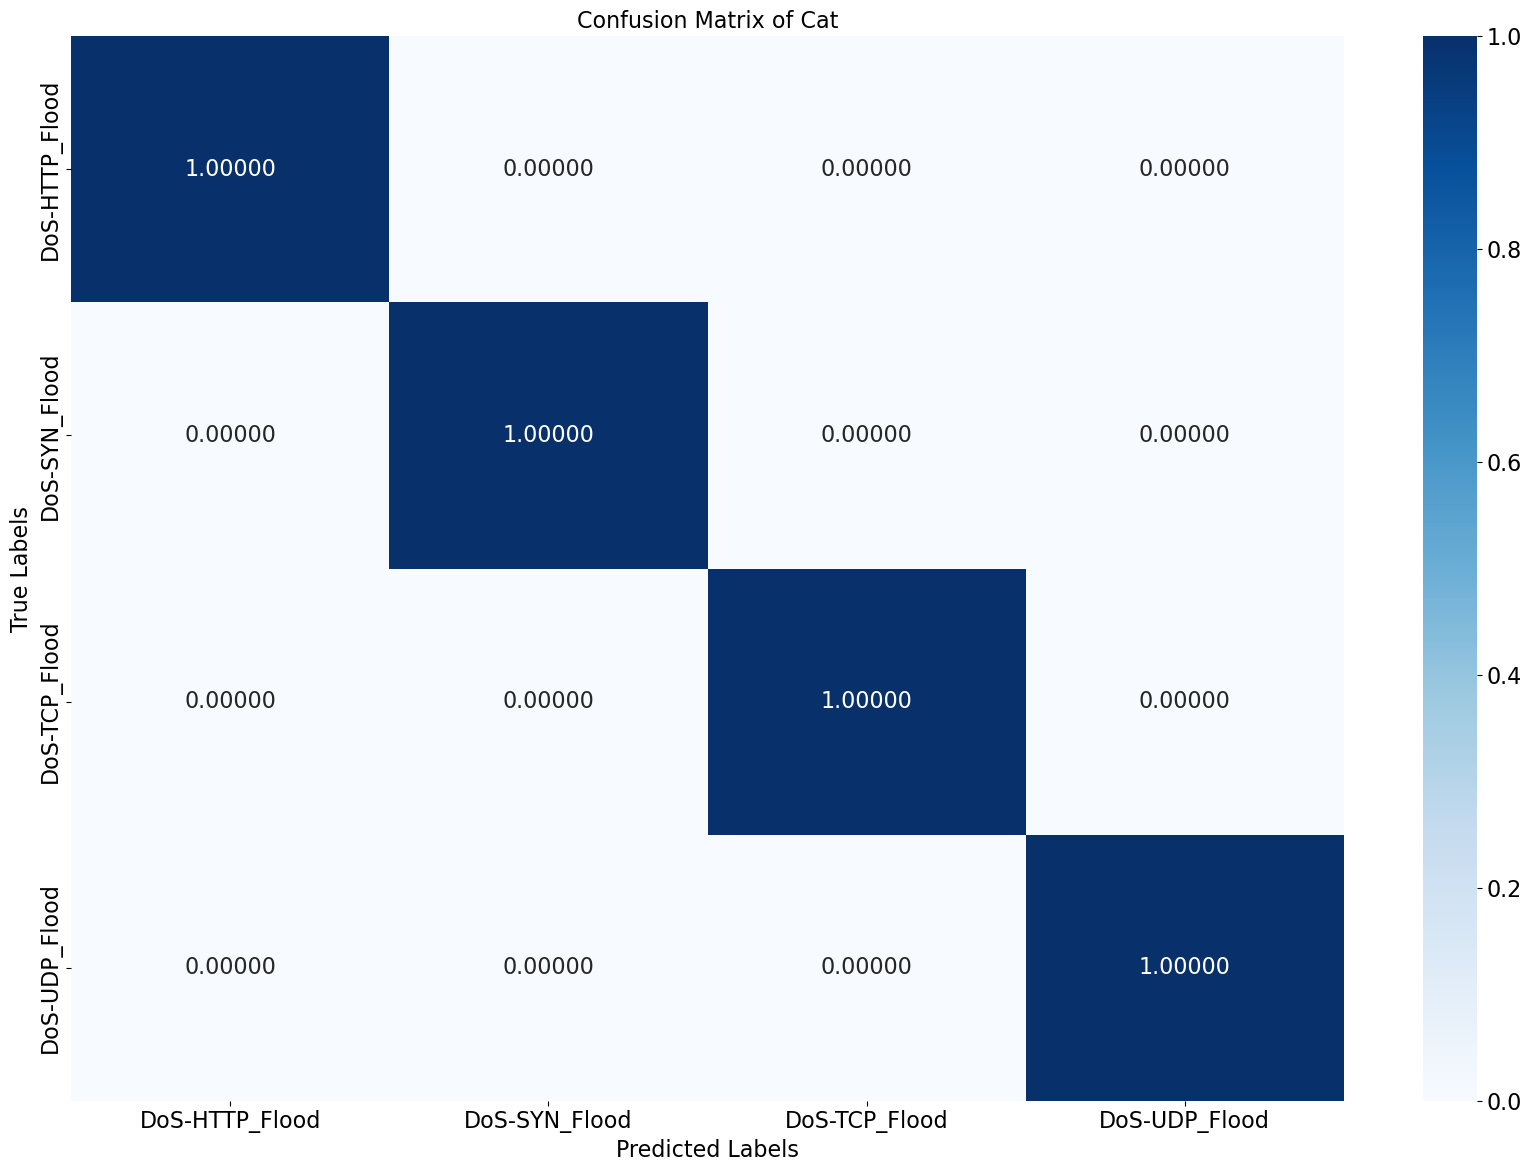

 67%|██████▋   | 4/6 [25:42<16:05, 482.68s/it]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

  3%|▎         | 2/61 [00:04<02:12,  2.24s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

  8%|▊         | 5/61 [00:11<02:08,  2.29s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 20%|█▉        | 12/61 [00:28<01:53,  2.31s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 21%|██▏       | 13/61 [00:30<01:48,  2.25s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 30%|██▉       | 18/61 [00:41<01:39,  2.32s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


 31%|███       | 19/61 [00:44<01:35,  2.28s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 34%|███▍      | 21/61 [00:48<01:30,  2.26s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 36%|███▌      | 22/61 [00:50<01:26,  2.22s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 38%|███▊      | 23/61 [00:53<01:25,  2.24s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 39%|███▉      | 24/61 [00:55<01:21,  2.21s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 44%|████▍     | 27/61 [01:01<01:14,  2.18s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 46%|████▌     | 28/61 [01:03<01:12,  2.20s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 49%|████▉     | 30/61 [01:08<01:08,  2.22s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 54%|█████▍    | 33/61 [01:14<01:01,  2.21s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 62%|██████▏   | 38/61 [01:26<00:50,  2.19s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 77%|███████▋  | 47/61 [01:45<00:30,  2.20s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 80%|████████  | 49/61 [01:50<00:26,  2.21s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 90%|█████████ | 55/61 [02:03<00:13,  2.19s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


 92%|█████████▏| 56/61 [02:05<00:10,  2.20s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 93%|█████████▎| 57/61 [02:07<00:08,  2.22s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 95%|█████████▌| 58/61 [02:09<00:06,  2.23s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████| 4/4 [00:00<00:00,  5.66it/s]


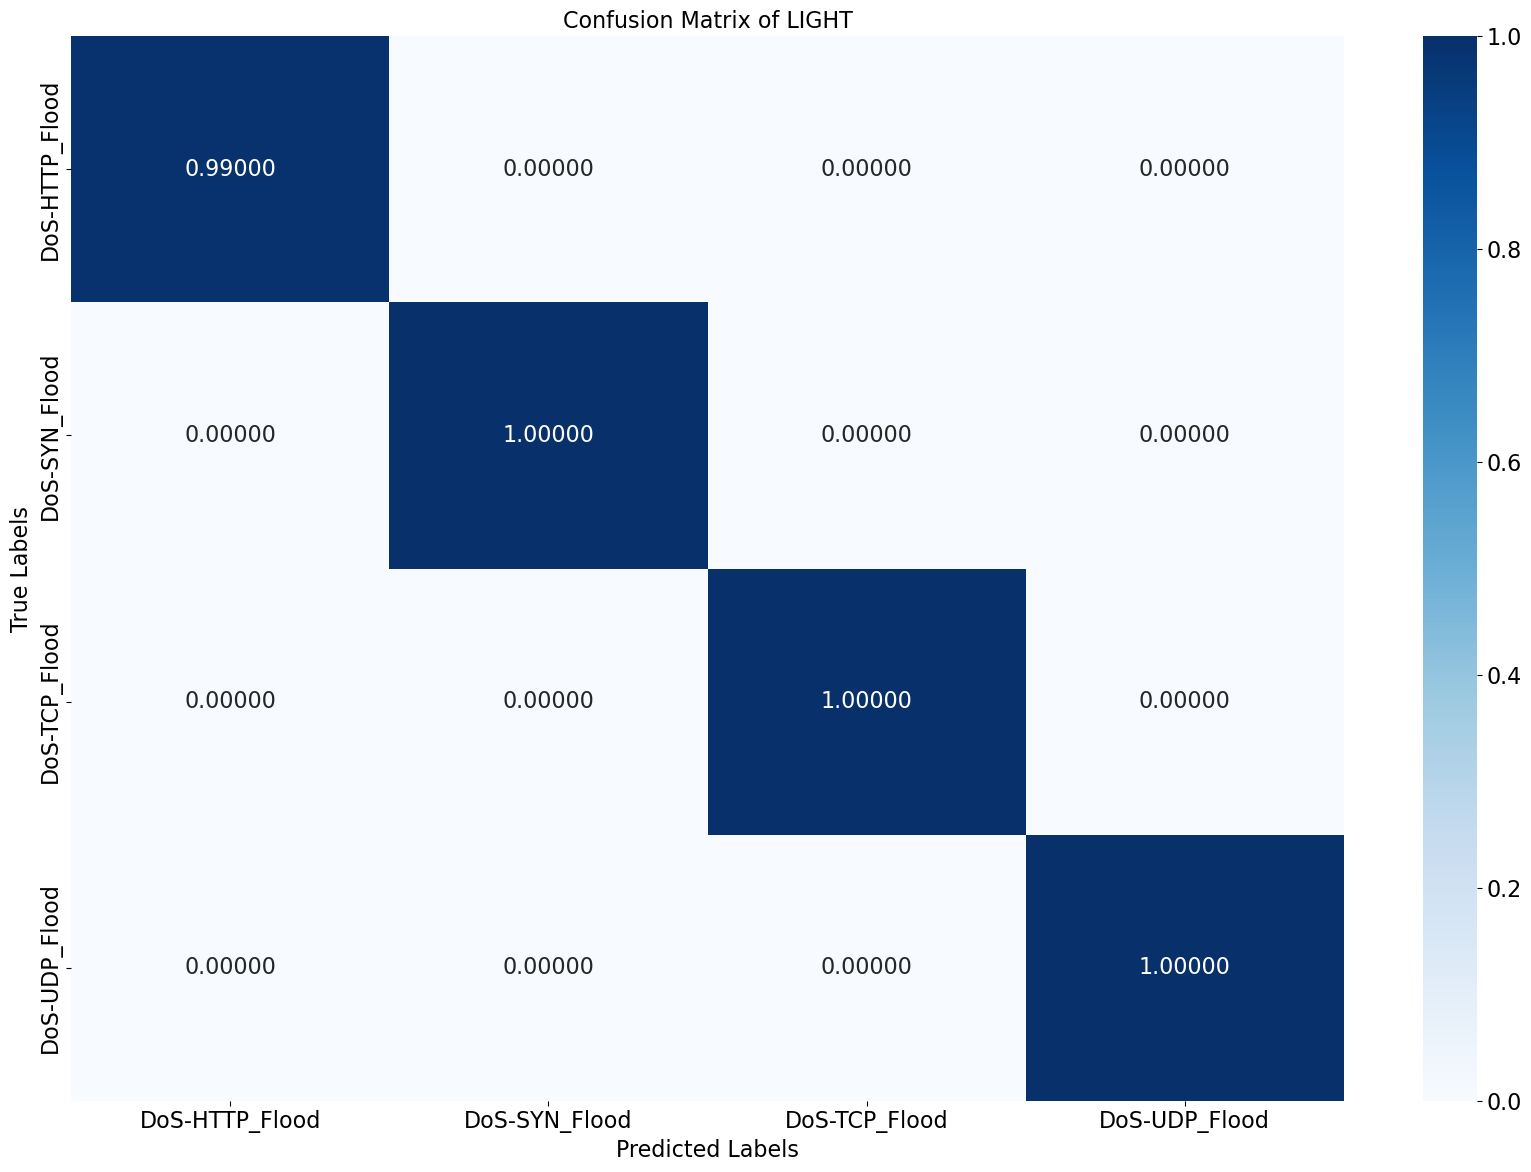

100%|██████████| 4/4 [00:00<00:00,  5.68it/s]


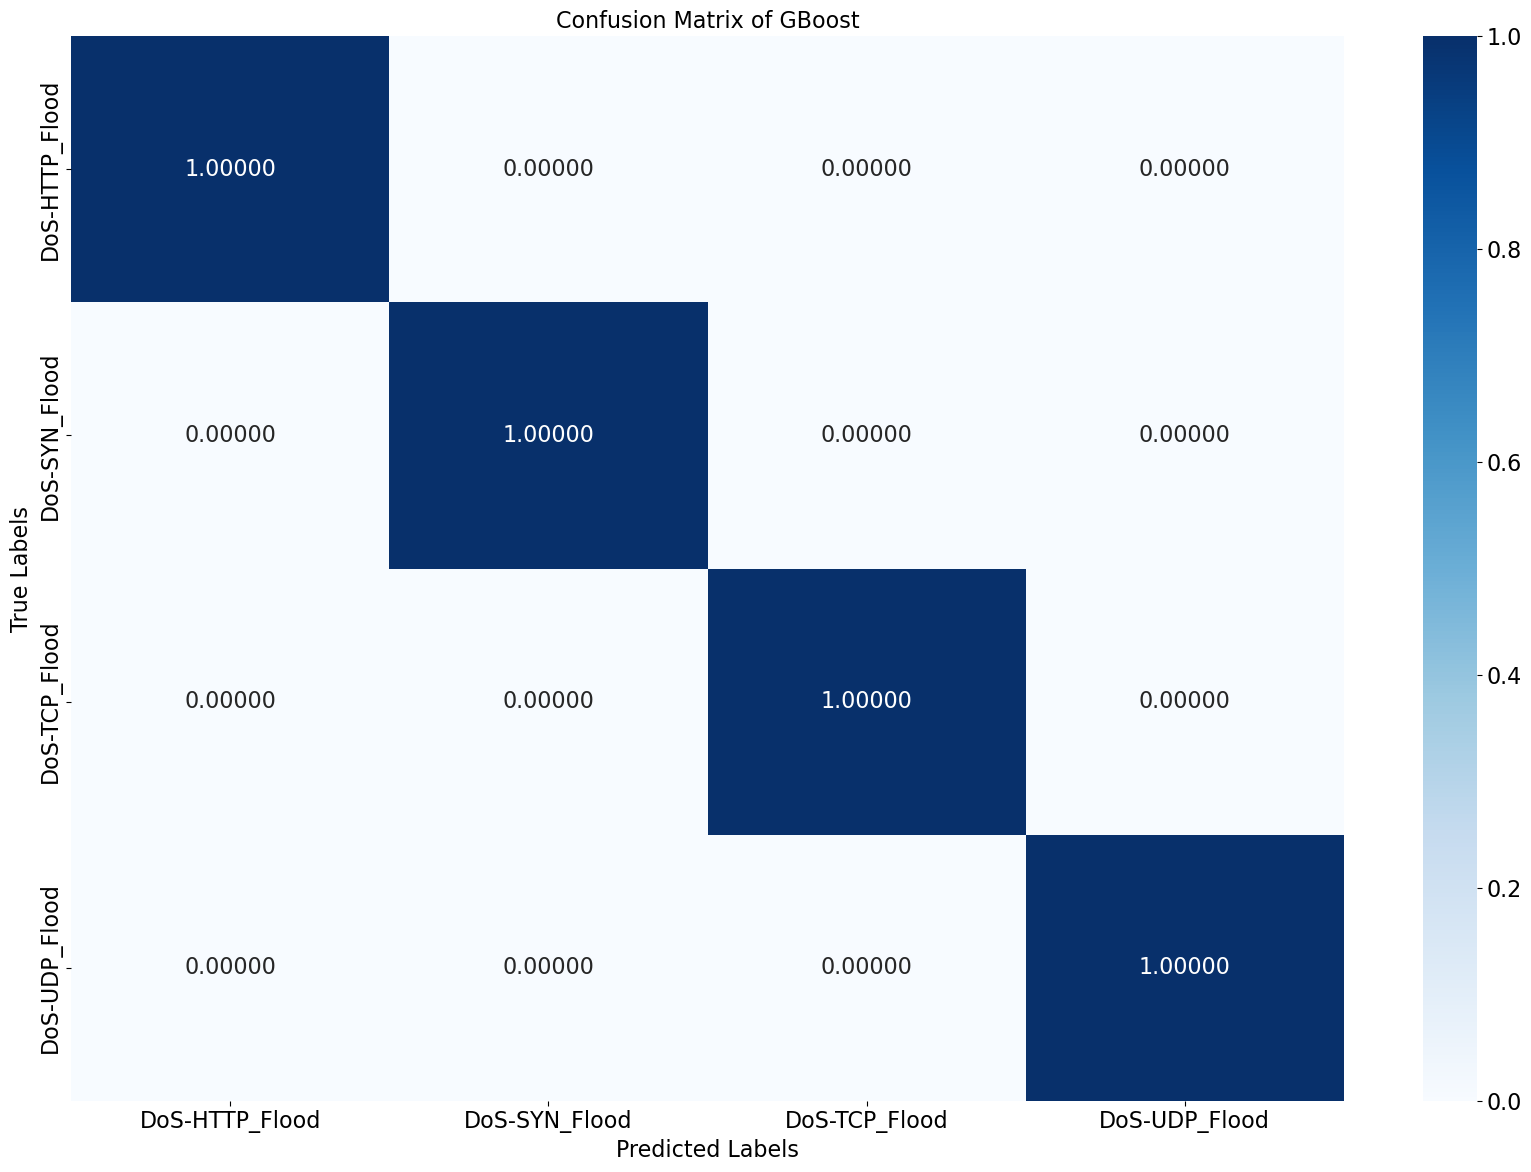

100%|██████████| 6/6 [1:10:04<00:00, 700.77s/it] 


['.\\DoS_system_3_models\\All_classes\\DoS\\encoder.joblib']

In [11]:
#der and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes_DoS)
performance = get_or_define_performance_df(model_path_all_classes_DoS, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_path_all_classes_DoS+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))
print(selected_X)
y_column = 'label'
  
# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (17, 12)
saveConfusionMatrix = True
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'SF_' + model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes_DoS + 'SF_', X_columns=selected_X , y_column=y_column, filter_cols=filter_cols, filter_bool=True, \
                                                     filter_name=filter_name, scaler=scaler, encoder=encoder, confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_path_all_classes_DoS+'SF_'+model['Name'], figsize=figsizeConfusionMatrix, modelLabel=model['Name'])

    # Save performance
    performance.to_csv(model_path_all_classes_DoS + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes_DoS+'encoder.joblib')


## Feature Importance

In [7]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_all_classes_DoS+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_path_all_classes_DoS+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_path_all_classes_DoS+'model_XGB.joblib')
    },
    {
        "Name": "Cat",
        "Model": joblib.load(model_path_all_classes_DoS+'model_Cat.joblib')
    },
    {
        "Name": "LIGHT",
        "Model": joblib.load(model_path_all_classes_DoS+'model_LIGHT.joblib')
    },
    {
        "Name": "GBoost",
        "Model": joblib.load(model_path_all_classes_DoS+'model_GBoost.joblib')
    },
    {
        "Name": "Adaboost",
        "Model": joblib.load(model_path_all_classes_DoS+'model_Adaboost.joblib')
    },
]

100%|██████████| 7/7 [00:00<00:00, 241.86it/s]


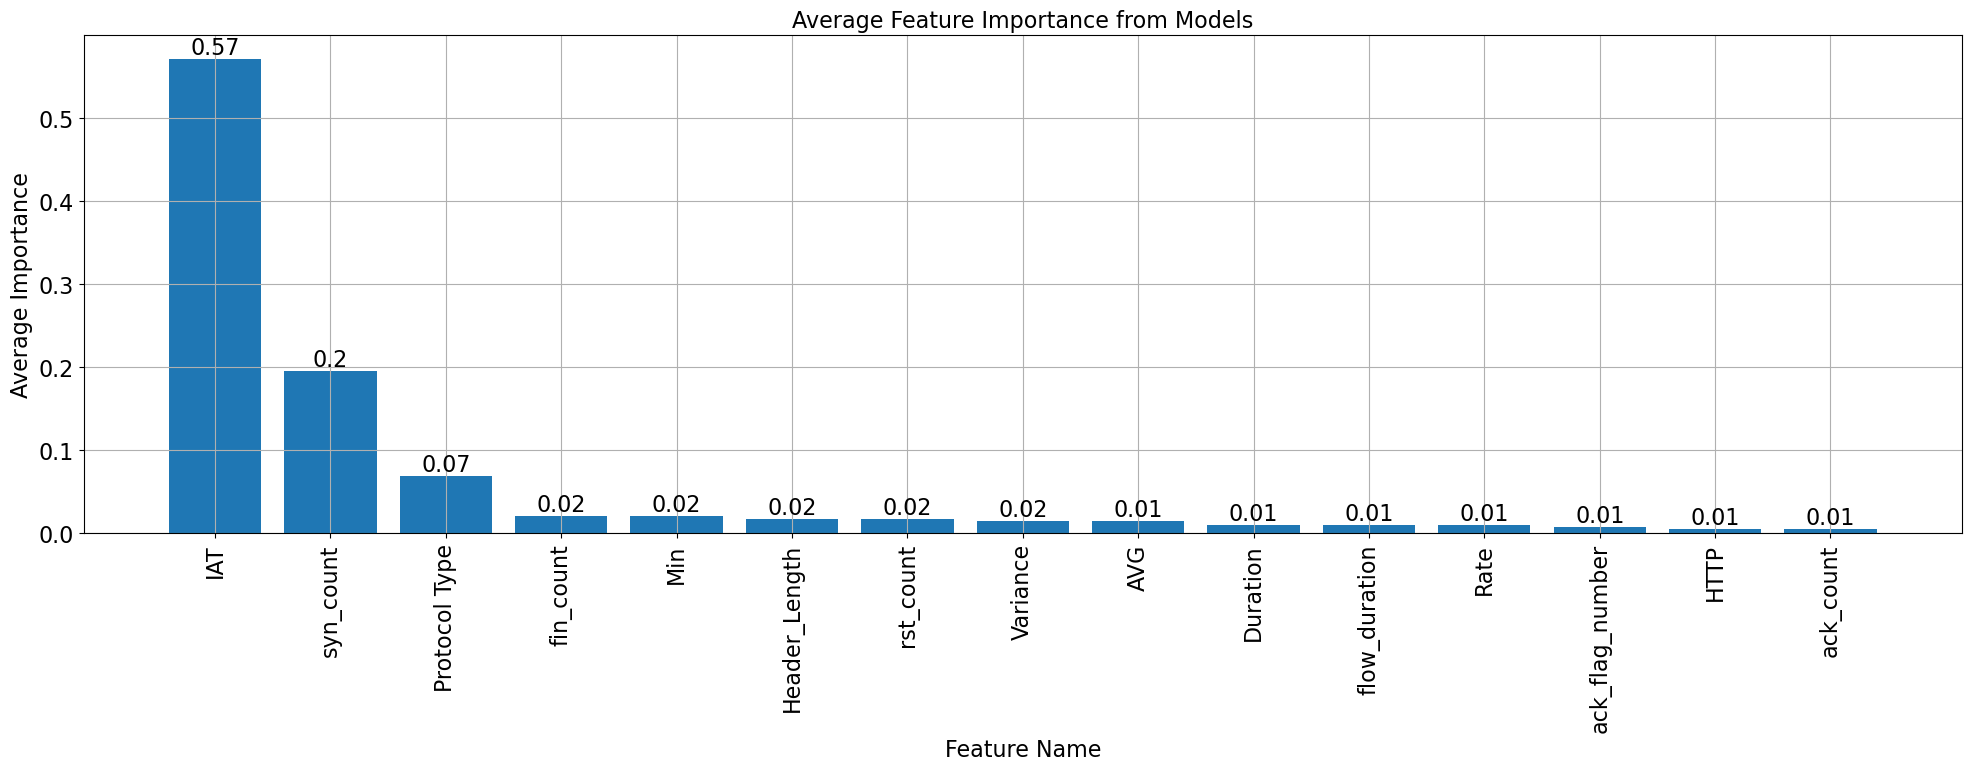

[0.57039752 0.76548298 0.83504474 0.85586992 0.87646259 0.8943016
 0.91196028 0.92748665 0.94235974 0.95285323 0.96331069 0.9737433
 0.98162243 0.98731633 0.99253991 0.99557692 0.99708878 0.99853894
 0.99995887 0.99999981 1.         1.        ]


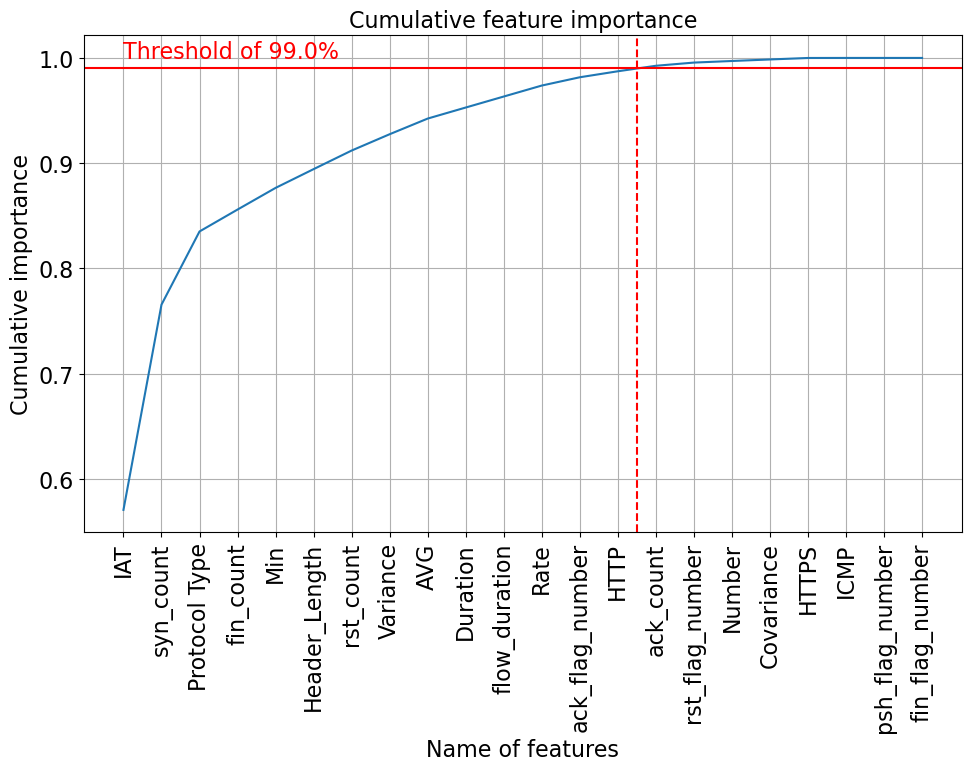

['IAT', 'syn_count', 'Protocol Type', 'fin_count', 'Min', 'Header_Length', 'rst_count', 'Variance', 'AVG', 'Duration', 'flow_duration', 'Rate', 'ack_flag_number', 'HTTP']
            Feature  Average Importance
0               IAT            0.463151
1         syn_count            0.158405
3     Protocol Type            0.056483
5         fin_count            0.016910
6               Min            0.016721
7     Header_Length            0.014485
8         rst_count            0.014338
9          Variance            0.012607
10              AVG            0.012077
14         Duration            0.008520
15    flow_duration            0.008491
16             Rate            0.008471
18  ack_flag_number            0.006398
21             HTTP            0.004623


100%|██████████| 95/95 [01:56<00:00,  1.23s/it]


In [8]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_path_all_classes_DoS, all_features=True, figsize=(20, 8))
average_importance_df.to_csv(model_path_all_classes_DoS+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\DoS_3_models\\DoS\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_path_all_classes_DoS+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

# Remove features with correlation > 0.80
threshold = 0.80
dataset = read_csv_file(train_sets[0], file_path)
dataset = multi_filter_df(dataset, filter_cols, filter_name)
features_with_threshold_corr = remove_features_with_correlation_and_feature_importance(dataset[X_columns], average_importance_df, model_path_all_classes_DoS, figsize=(20, 8), threshold=threshold)
# print(features_with_threshold_corr.head(features_with_threshold_corr.size))

# Select features with cumulative importance > 0.95 and correlation < 0.80
selected_X = select_features_by_importance(features_with_threshold_corr['Feature'].values, features_with_threshold_corr['Average Importance'].values, model_path_all_classes_DoS, threshold_percentage=0.99)
pd.DataFrame(selected_X).to_csv(model_path_all_classes_DoS+'selected_X_columns.csv', index=False)
print(selected_X)

filtered_df = average_importance_df[average_importance_df['Feature'].isin(selected_X)]
print(filtered_df.head(filtered_df.size))

# Define and fit scaler
scaler = MinMaxScaler()
for set in tqdm(build_sets + after_build_sets):
    scaler.fit(read_csv_file(set, file_path)[selected_X])

## Display performance

In [37]:
# Preprocessing if necessary

performance = read_csv_file(performance_path, model_path_all_classes_DoS)
performance = performance.drop(0).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_all_classes_DoS + performance_path, index=False)

In [13]:
read_csv_file(performance_path, model_path_all_classes_DoS).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(50)

Model  Accuracy Training  Recall Training  Precision Training  \
22    SF_GBoost           1.000000         1.000000            1.000000   
2           XGB           1.000000         1.000000            1.000000   
11       SF_XGB           1.000000         1.000000            1.000000   
19       SF_XGB           1.000000         1.000000            1.000000   
7        GBoost           1.000000         1.000000            1.000000   
14    SF_GBoost           1.000000         1.000000            1.000000   
18        SF_RF           1.000000         1.000000            1.000000   
9         SF_RF           1.000000         1.000000            1.000000   
4           Cat           1.000000         1.000000            1.000000   
8         SF_DT           1.000000         1.000000            1.000000   
20       SF_Cat           1.000000         1.000000            1.000000   
5         LIGHT           1.000000         1.000000            1.000000   
21     SF_LIGHT           1.000000         1.000000            1.000000   
13     SF_LIGHT           1.000000         1.000000            1.000000   
17        SF_DT           1.000000         1.000000            1.000000   
0            DT           1.000000         1.000000            1.000000   
1            RF           1.000000         1.000000            1.000000   
12       SF_Cat           1.000000         1.000000            1.000000   
10        SF_ET           1.000000         1.000000            1.000000   
3            ET           1.000000         1.000000            1.000000   
15  SF_Adaboost           0.983217         0.979481            0.981026   
16       SF_MLP           0.997097         0.971290            0.973409   
6      Adaboost           0.988003         0.974196            0.972019   

    F1 Training  Accuracy Testing  Recall Testing  Precision Testing  \
22     1.000000          0.999950        0.999454           0.999665   
2      1.000000          0.999949        0.999352           0.999805   
11     1.000000          0.999946        0.999409           0.999625   
19     1.000000          0.999945        0.999271           0.999743   
7      1.000000          0.999943        0.999309           0.999481   
14     1.000000          0.999933        0.999127           0.999377   
18     1.000000          0.999923        0.998863           0.999778   
9      1.000000          0.999920        0.998998           0.999660   
4      1.000000          0.999898        0.998469           0.999269   
8      1.000000          0.999894        0.998567           0.999542   
20     1.000000          0.999892        0.998816           0.998879   
5      1.000000          0.999889        0.998718           0.999200   
21     1.000000          0.999886        0.998575           0.999179   
13     1.000000          0.999884        0.998593           0.999079   
17     1.000000          0.999870        0.998743           0.998804   
0      1.000000          0.999855        0.998459           0.998850   
1      1.000000          0.999846        0.998609           0.999030   
12     1.000000          0.999810        0.998306           0.996988   
10     1.000000          0.999359        0.996659           0.992791   
3      1.000000          0.999012        0.993067           0.994791   
15     0.980215          0.997498        0.975897           0.976872   
16     0.972343          0.996738        0.964648           0.974715   
6      0.973012          0.991719        0.983593           0.882257   

    F1 Testing   FU_rate   FL_rate    FU     FL  Total rows  
22    0.999559  0.000023  0.000027    32     37     1382998  
2     0.999578  0.000033  0.000018    46     25     1382998  
11    0.999517  0.000030  0.000025    41     34     1382998  
19    0.999507  0.000034  0.000021    47     29     1382998  
7     0.999395  0.000026  0.000031    36     43     1382998  
14    0.999252  0.000033  0.000034    46     47     1382998  
18    0.999320  0.000051  0.000026    70     3

In [12]:
df=read_csv_file(performance_path, model_path_all_classes_DoS).sort_values(by=['Accuracy Testing', 'F1 Testing', 'Recall Testing', 'Precision Testing'], ascending=False).head(20)
df=df[['Accuracy Testing', 'Recall Testing','Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate', 'FU', 'FL']]

#  Convert DataFrame to LaTeX table
latex_table = df.to_latex(index=True)

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Accuracy Testing &  Recall Testing &  Precision Testing &  F1 Testing &   FU\_rate &   FL\_rate &    FU &     FL \\
\midrule
2  &          0.999949 &        0.999352 &           0.999805 &    0.999578 &  0.000033 &  0.000018 &    46 &     25 \\
11 &          0.999946 &        0.999409 &           0.999625 &    0.999517 &  0.000030 &  0.000025 &    41 &     34 \\
7  &          0.999943 &        0.999309 &           0.999481 &    0.999395 &  0.000026 &  0.000031 &    36 &     43 \\
14 &          0.999933 &        0.999127 &           0.999377 &    0.999252 &  0.000033 &  0.000034 &    46 &     47 \\
9  &          0.999920 &        0.998998 &           0.999660 &    0.999329 &  0.000048 &  0.000033 &    66 &     45 \\
4  &          0.999898 &        0.998469 &           0.999269 &    0.998868 &  0.000069 &  0.000033 &    95 &     46 \\
8  &          0.999894 &        0.998567 &           0.999542 &    0.999053 &  0.000064 &  0.000043 &    88 &    

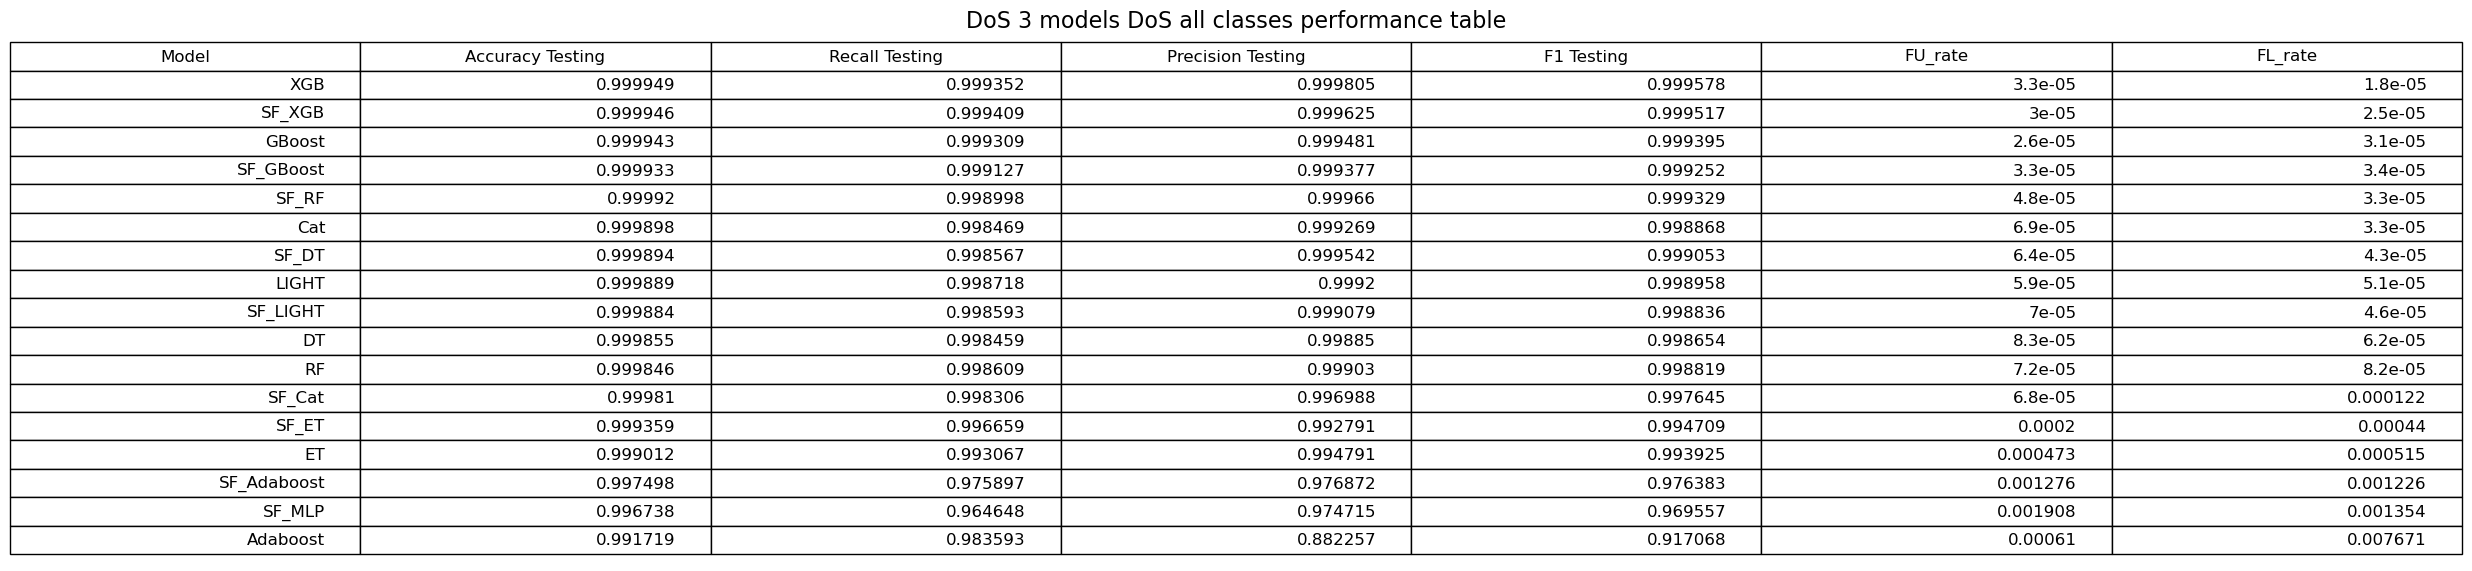

In [25]:
# Performance table
performance_table = read_csv_file(performance_path, model_path_all_classes_DoS).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(50)
performance_table = performance_table[['Model', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate']]
performance_table = performance_table.round(6)

plot_performance_table(performance_table, model_path_all_classes_DoS+'Performance table.png', 'DoS 3 models DoS all classes performance table', figsize=(25, 6))

## Final DoS prediction

In [12]:
model_path = '.\\DoS_model\\All_classes\\DoS\\'
filter_name = [
    {'name': 'DoS', 'type': '='},
    {'name': 'DoS', 'type': '='}
]
filter_cols = ['Prediction', 'Trinary Prediction']

# Define model
model = joblib.load(model_path + 'model_XGB.joblib')

# Get predicted data
df = read_csv_file('after_build_set_scaled.csv', '.\\DoS_model\\')
print(len(df))
# df = df[df['Prediction'] == 'DoS']
# df = df[df['Trinary Prediction'] == 'DoS']
df = multi_filter_df(df, filter_cols, filter_name)
print(len(df))

# Get x, y and z
binary_col = df['Binary']
prediction_col = df['Prediction']
trinary_col = df['Trinary']
trinary_prediction_col = df['Trinary Prediction']
del df

try:
    encoder = joblib.load(model_path+'encoder.joblib')
except:
    raise Exception("Please, build models first")

# Get prediction
X_test, y_test, y_pred = get_prediction_by_model_multifiltered(model, ['after_build_set_scaled.csv'], '.\\DoS_model\\', X_columns, y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)
print(np.array(X_test).shape)

# Build new dataframe and save it
new_after_build_set_scaled = pd.DataFrame(X_test, columns=X_columns)
new_after_build_set_scaled[y_column] = y_test
new_after_build_set_scaled['Final DoS Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set_scaled['Binary'] = binary_col.values
new_after_build_set_scaled['Prediction'] = prediction_col.values
new_after_build_set_scaled['Trinary'] = trinary_col.values
new_after_build_set_scaled['Trinary Prediction'] = trinary_prediction_col.values
count = len(new_after_build_set_scaled[new_after_build_set_scaled[y_column] != new_after_build_set_scaled['Final DoS Prediction']])
y_pred = encoder.inverse_transform(y_pred)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set_scaled),len(new_after_build_set_scaled)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

res.head()

8482125
1631183


100%|██████████| 1/1 [00:35<00:00, 35.53s/it]


(1631183, 46)


Accuracy    Recall  Precision        F1  Mispredicted count  \
0  0.999804  0.999804   0.999628  0.999716                 320   

   Mispredicted rate  Total rows  
0           0.000196     1631183

In [13]:
new_after_build_set_scaled.head(20)

flow_duration  Header_Length  Protocol Type  Duration          Rate  \
0        0.000000         182.00          17.00     64.00     62.697939   
1        0.019006       15910.00          17.00     64.00  16639.720789   
2        0.000000          53.46           5.94     63.36    202.757247   
3        0.000000         182.00          17.00     64.00      9.417466   
4        0.000000          81.20           6.11     64.00     28.029578   
5        0.000000          55.76           6.11     65.91      1.945530   
6        0.010252       10048.50          16.83     63.36  20049.876592   
7        0.000000          54.00           6.00     64.00      3.060749   
8        0.013626         165.64          16.89     64.41     10.174500   
9        0.019044        3825.00          17.00     64.00   6251.809669   
10       0.053290         264.74          16.44     64.41      2.402729   
11       0.000000          54.00           6.00     64.00      2.834146   
12       0.000000          54.00           6.00     64.00      3.163900   
13       0.000000          42.00          17.00     64.00      3.340342   
14       0.010222       10427.50          16.52     69.73  20394.467230   
15       0.000000          54.00           6.00     64.00      0.000000   
16       0.089242       39804.00          15.88     77.37   8907.456124   
17       0.007935        9433.16          16.73     65.91  24309.107568   
18       3.880005         108.00           6.00     64.00      0.515464   
19       0.000000          53.30           6.00     63.90     19.709575   

           Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0      62.697939    0.0              0.0              0.0              0.0   
1   16639.720789    0.0              0.0              0.0              0.0   
2     202.757247    0.0              0.0              0.0              0.0   
3       9.417466    0.0              0.0              0.0              0.0   
4      28.029578    0.0              0.0              0.0              0.0   
5       1.945530    0.0              0.0              0.0              0.0   
6   20049.876592    0.0              0.0              0.0              0.0   
7       3.060749    0.0              0.0              0.0              0.0   
8      10.174500    0.0              0.0              0.0              0.0   
9    6251.809669    0.0              0.0              0.0              0.0   
10      2.402729    0.0              0.0              0.0              0.0   
11      2.834146    0.0              0.0              0.0              0.0   
12      3.163900    0.0              0.0              1.0              0.0   
13      3.340342    0.0              0.0              0.0              0.0   
14  20394.467230    0.0              0.0              0.0              0.0   
15      0.000000    0.0              0.0              0.0              0.0   
16   8907.456124    0.0              0.0              0.0              0.0   
17  24309.107568    0.0              0.0              0.0              0.0   
18      0.515464    0.0              0.0              1.0              0.0   
19     19.709575    0.0              0.0              0.0              0.0   

    ...     Radius  Covariance  Variance  Weight          label  \
0   ...   0.000000    0.000000      0.00  141.55  DoS-UDP_Flood   
1   ...   0.322221    0.373822      0.14  141.55  DoS-UDP_Flood   
2   ...   0.057331    0.054789      0.03  141.55  DoS-TCP_Flood   
3   ...   0.000000    0.000000      0.00  141.55  DoS-UDP_Flood   
4   ...   1.411650    6.126863      0.17  141.55  DoS-TCP_Flood   
5   ...   7.727394  251.990633      0.12  141.55  DoS-TCP_Flood   
6   ...   0.000000    0.000000      0.00  141.55  DoS-UDP_Flood   
7   ...   0.000000    0.000000      0.00  141.55  DoS-TCP_Flood   
8   ...  14.328432  656.017230      0.19  141.55  DoS-UDP_Flood   
9   ...   0.000000    0.000000      0.00  141.55  DoS-UDP_Flood   
10  ...   6.916206  214.704678      0.12  141.55  Do

In [14]:
del new_after_build_set_scaled

# Third model (DDoS)

## Building model

In [17]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    # {
    #     "Name": "LIGHT",
    #     "Model": LGBMClassifier(random_state = 42, verbose = 0)
    # },
    # {
    #     "Name": "GBoost",
    #     "Model": GradientBoostingClassifier(random_state = 42)
    # },
    # {
    #     "Name": "Adaboost",
    #     "Model": AdaBoostClassifier(random_state = 42)
    # },
    # {
    #     "Name": "MLP",
    #     "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    # },
]

In [18]:
filter_name = [
    {'name': 'DoS', 'type': '='},
    {'name': 'DDoS', 'type': '='},
]
filter_cols = ['Binary', 'Trinary']

In [46]:
encoder = joblib.load(model_path+'encoder.joblib')
num_classes = encoder.classes_
print("Nombre de classes :", len(num_classes), num_classes)

Nombre de classes : 12 ['DDoS-ACK_Fragmentation' 'DDoS-HTTP_Flood' 'DDoS-ICMP_Flood'
 'DDoS-ICMP_Fragmentation' 'DDoS-PSHACK_Flood' 'DDoS-RSTFINFlood'
 'DDoS-SYN_Flood' 'DDoS-SlowLoris' 'DDoS-SynonymousIP_Flood'
 'DDoS-TCP_Flood' 'DDoS-UDP_Flood' 'DDoS-UDP_Fragmentation']


['IAT', 'Min', 'fin_flag_number', 'syn_count', 'UDP', 'urg_count', 'psh_flag_number', 'Rate', 'Header_Length', 'flow_duration', 'Duration', 'HTTP']


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:10<00:00,  1.16it/s]


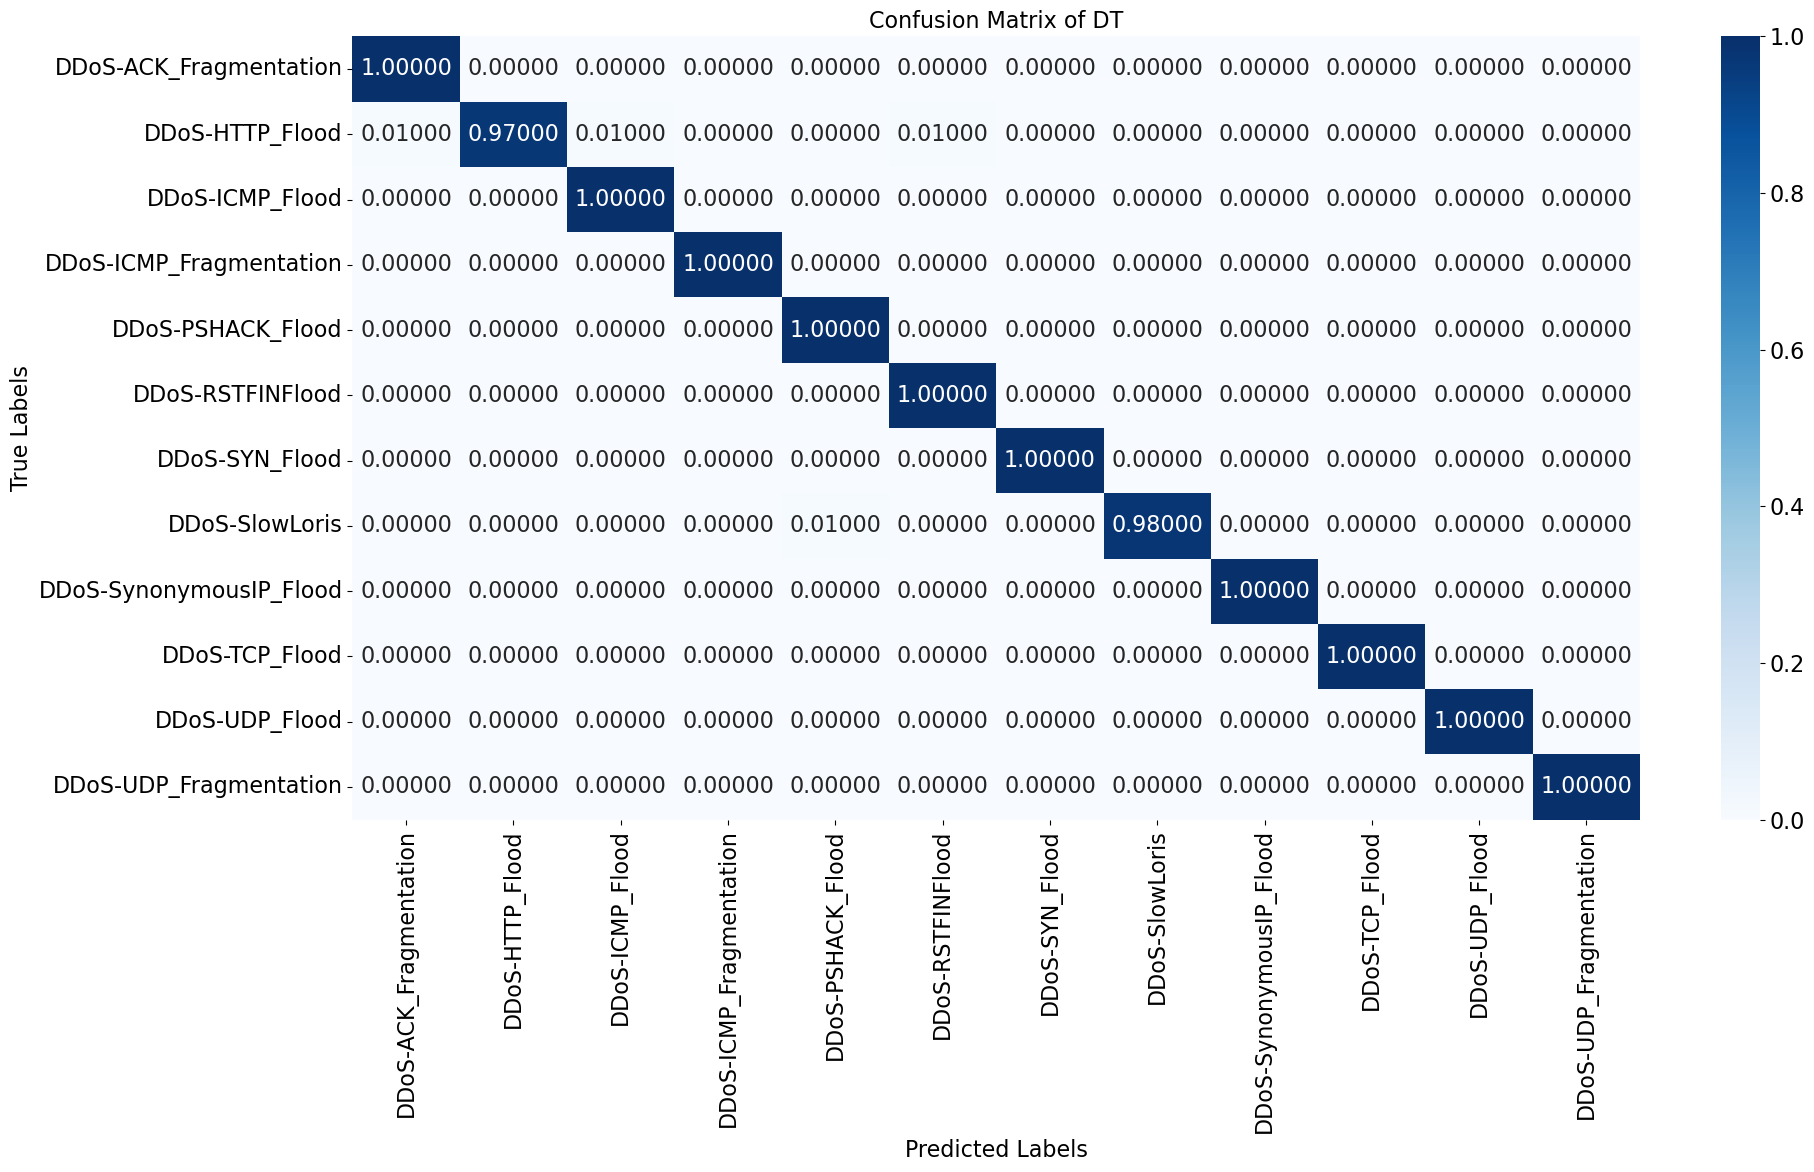

100%|██████████| 12/12 [00:10<00:00,  1.18it/s]


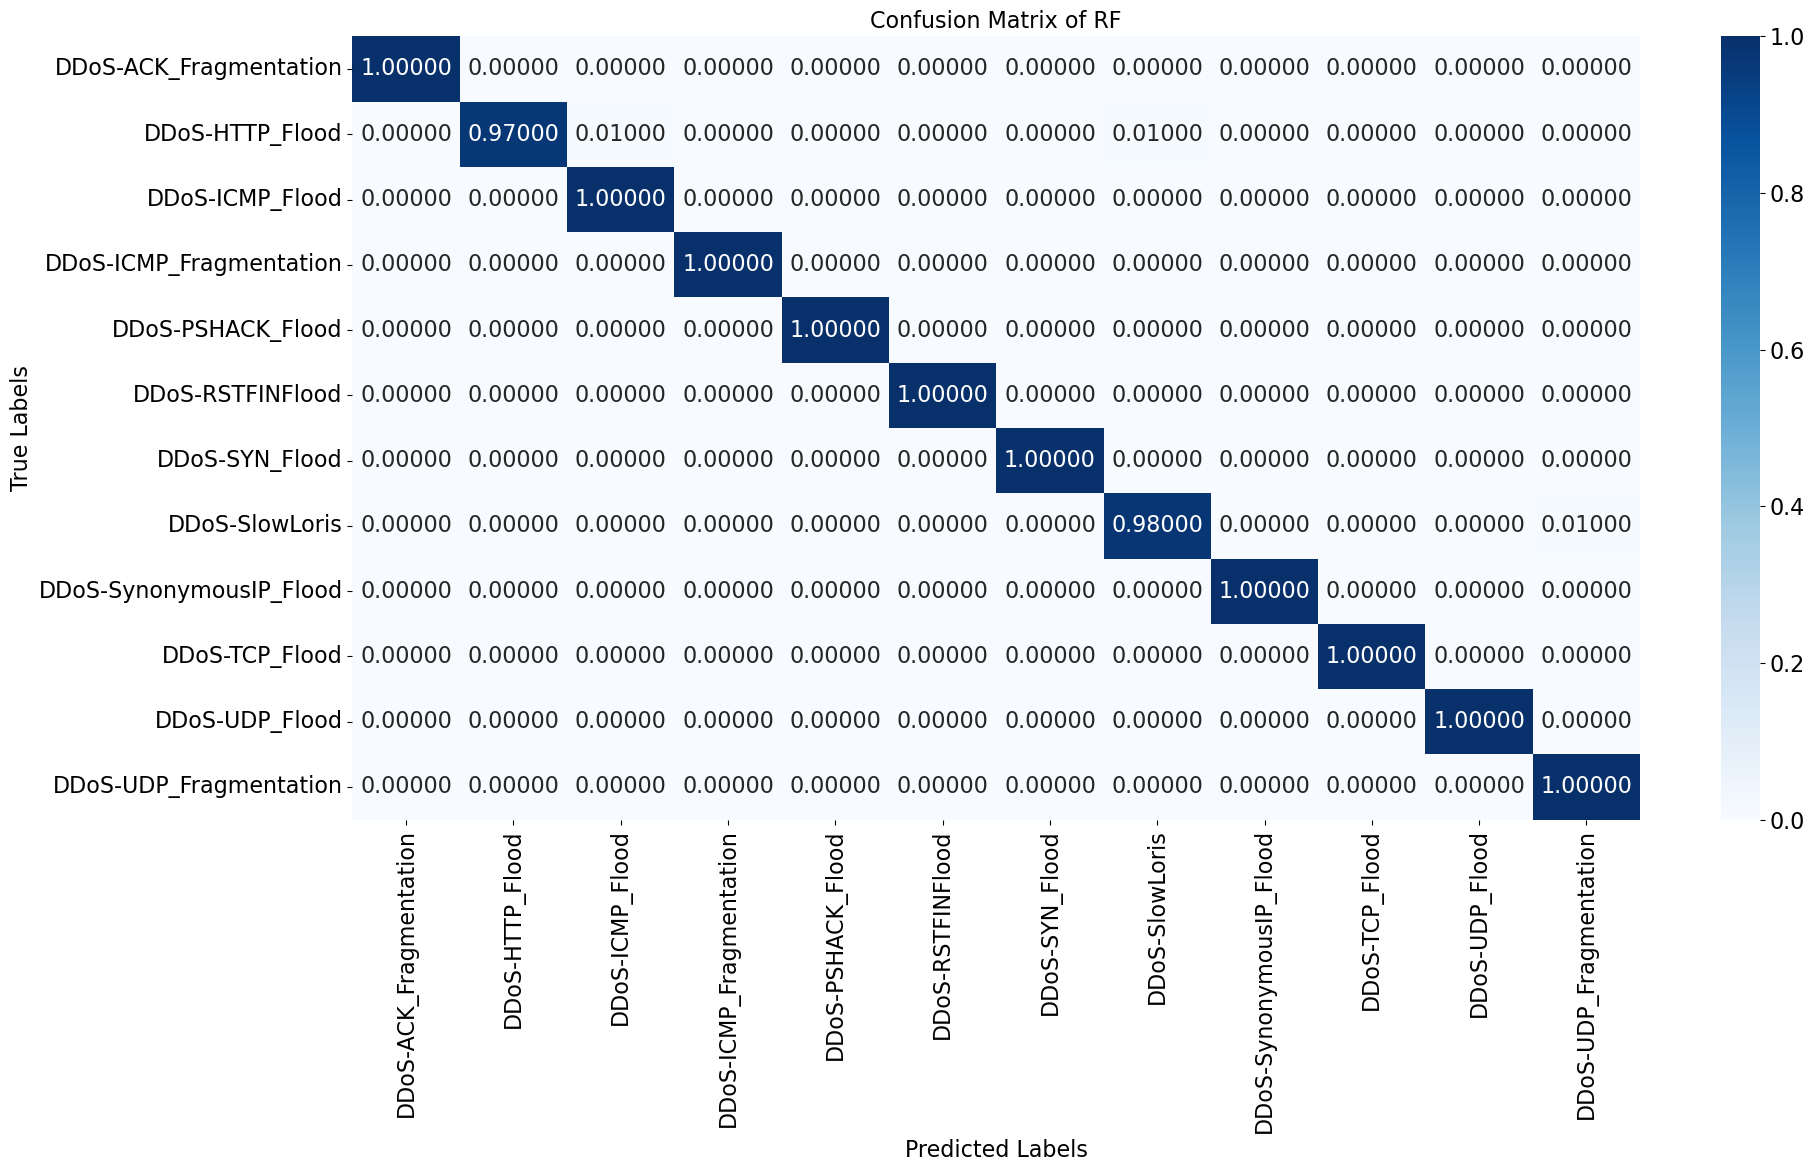

100%|██████████| 12/12 [00:10<00:00,  1.19it/s]


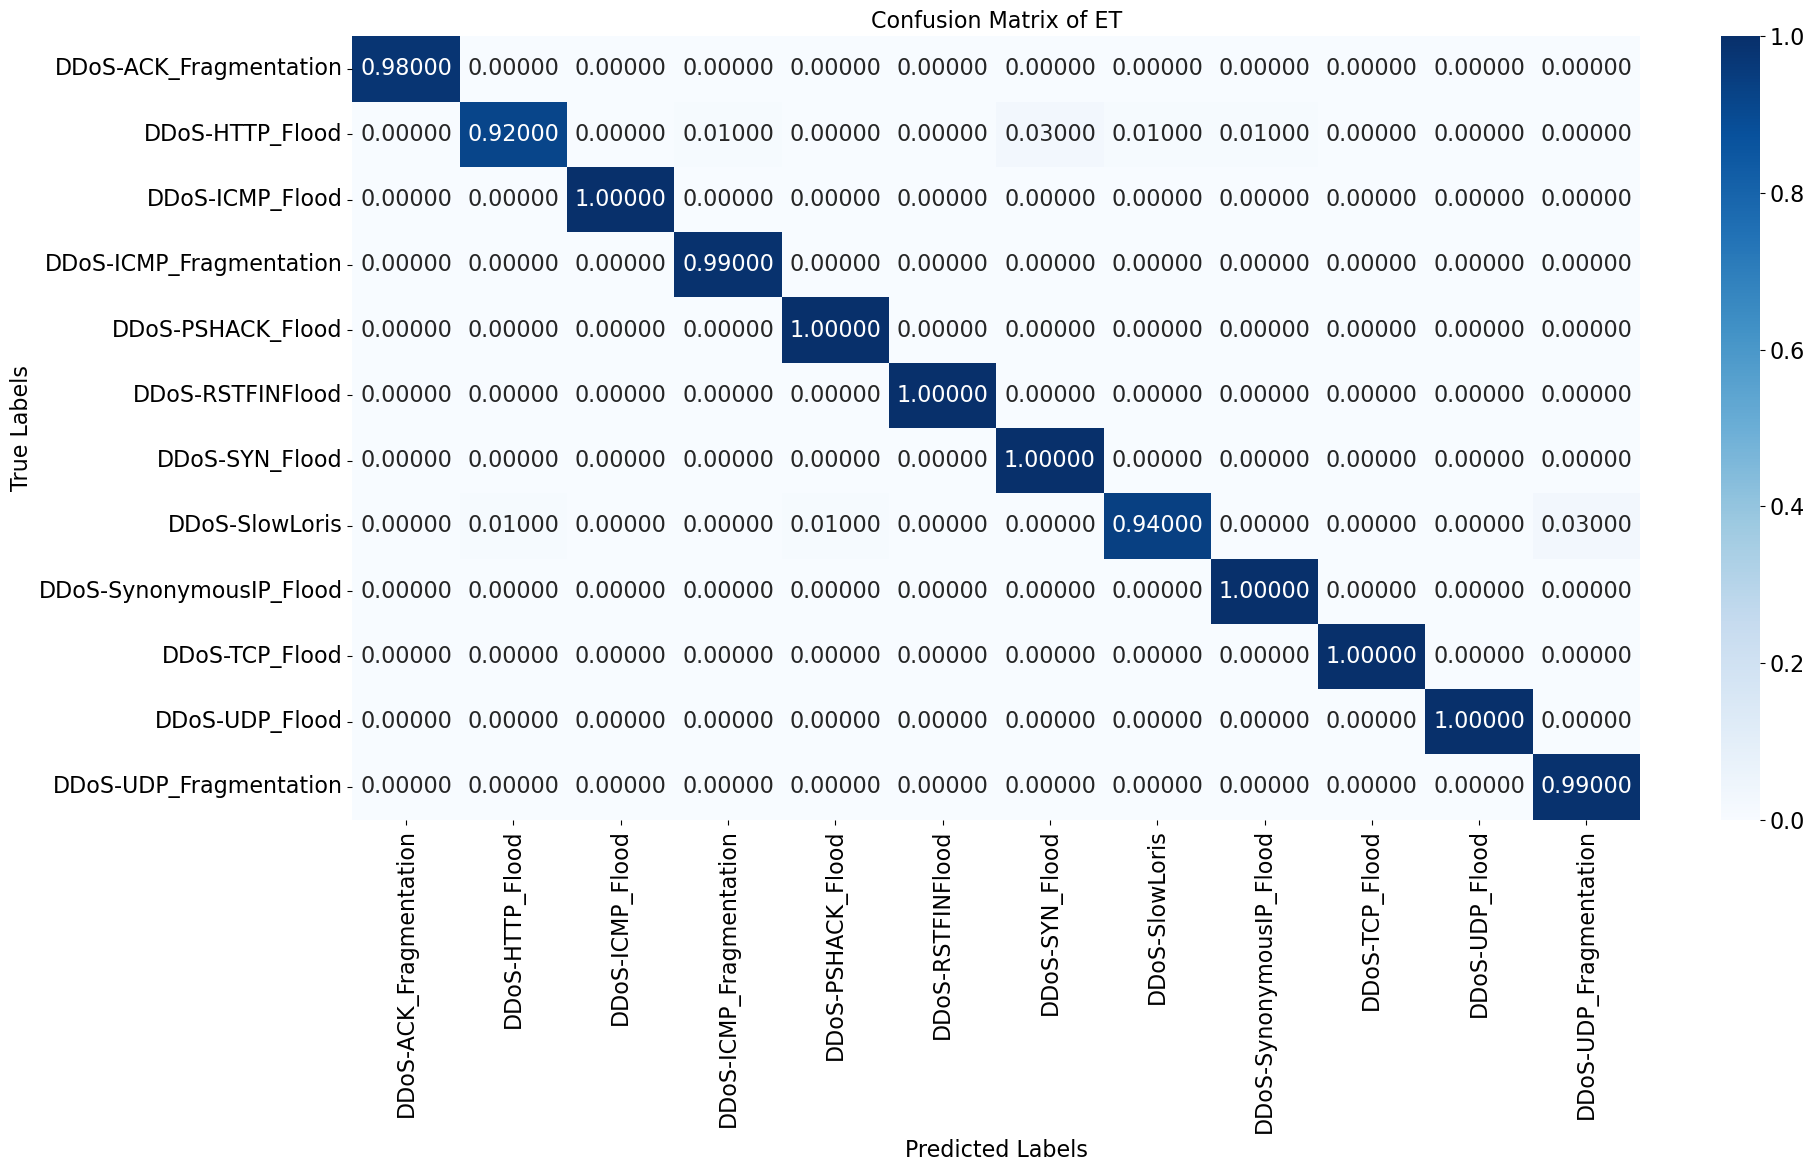

100%|██████████| 12/12 [00:10<00:00,  1.19it/s]


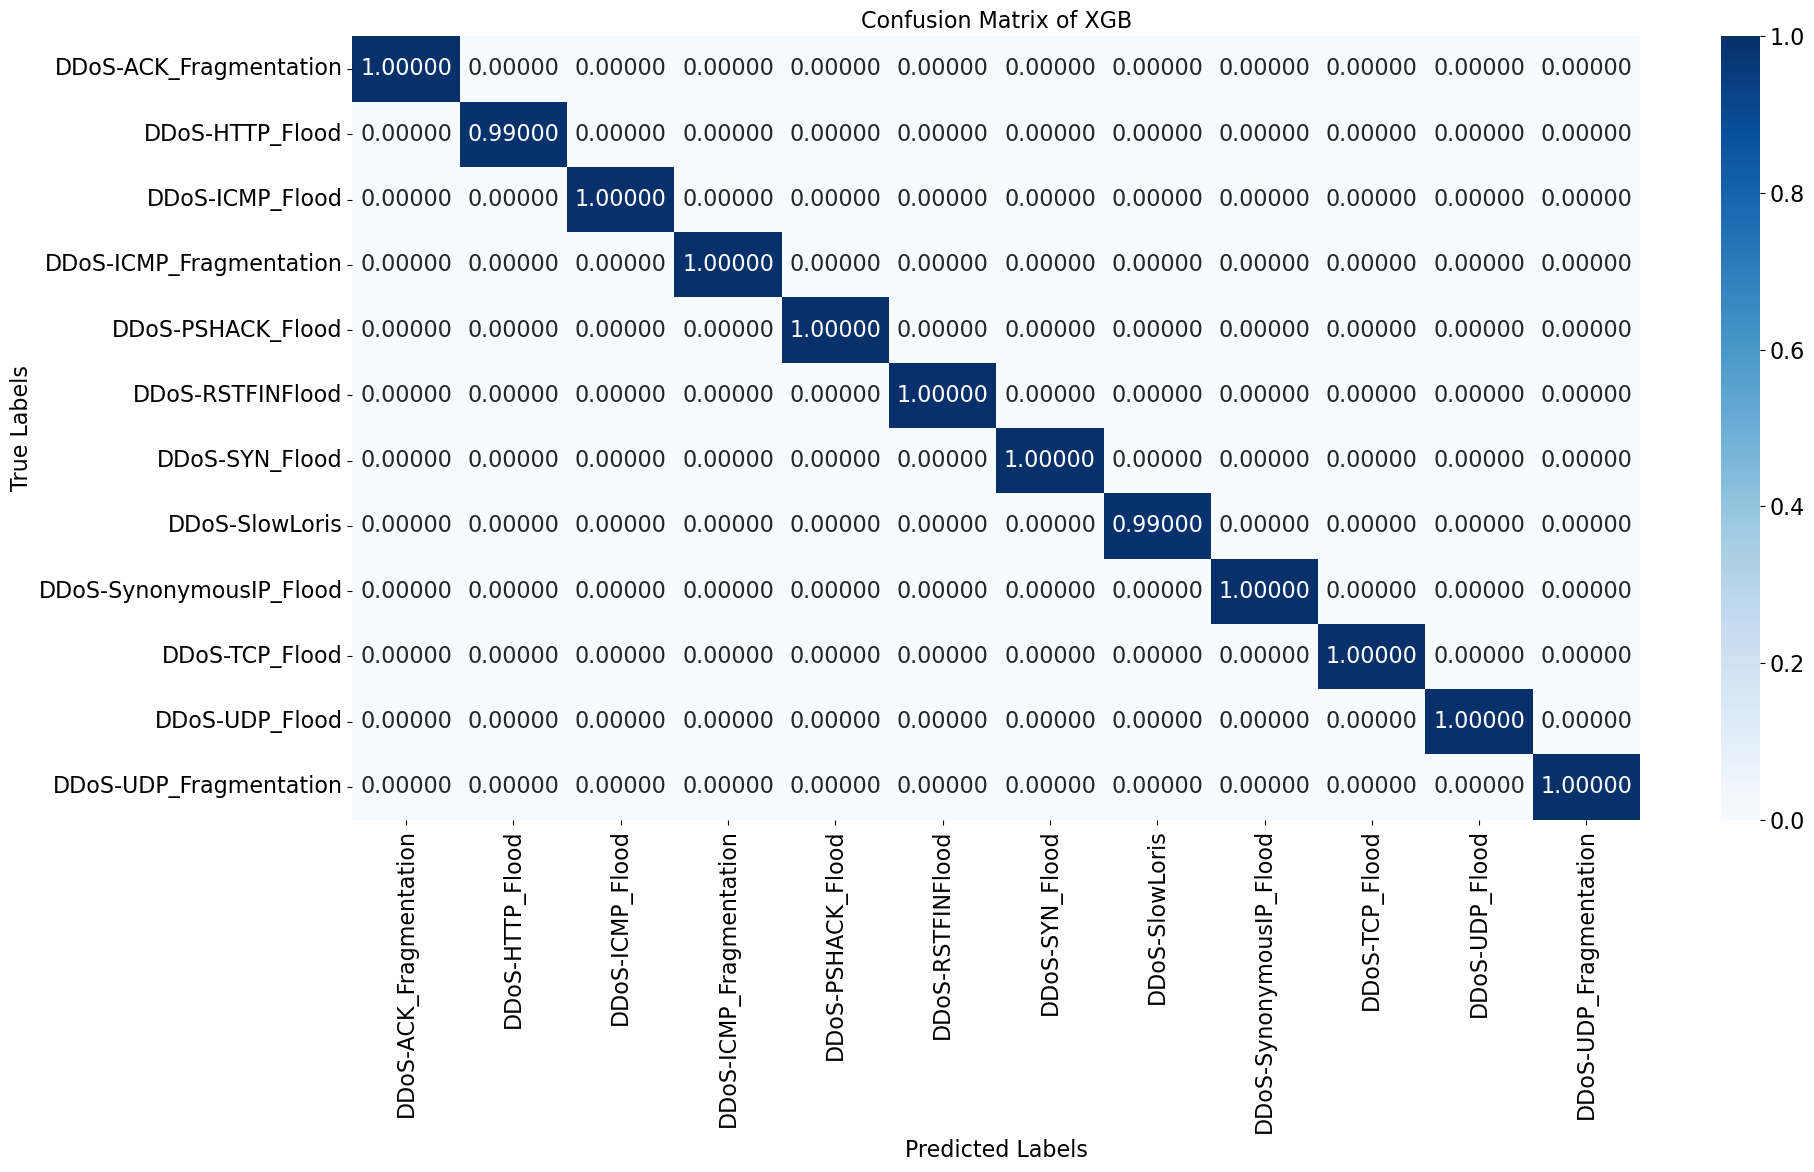

 80%|████████  | 4/5 [4:30:35<1:07:38, 4058.75s/it]


KeyboardInterrupt: 

In [20]:
#der and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes_DDoS)
performance = get_or_define_performance_df(model_path_all_classes_DDoS, performance_path)

# Load selected X columns
selected_X = pd.read_csv(model_path_all_classes_DDoS+'selected_X_columns.csv').values

# Map selected X columns
selected_X = list(map(lambda x: x[0], selected_X))
print(selected_X)
y_column = 'label'

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (20, 12)
saveConfusionMatrix = True
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], 'SF_' + model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes_DDoS + 'SF_', X_columns=selected_X , y_column=y_column, filter_cols=filter_cols, filter_bool=True, \
                                                     filter_name=filter_name, scaler=scaler, encoder=encoder, confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_path_all_classes_DDoS+'SF_'+model['Name'], figsize=figsizeConfusionMatrix, modelLabel=model['Name'])

    # Save performance
    performance.to_csv(model_path_all_classes_DDoS + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes_DDoS+'encoder.joblib')

## Feature Importance

In [15]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": joblib.load(model_path_all_classes_DDoS+'model_DT.joblib')
    },
    {
        "Name": "RF",
        "Model": joblib.load(model_path_all_classes_DDoS+'model_RF.joblib')
    },
    {
        "Name": "XGB",
        "Model": joblib.load(model_path_all_classes_DDoS+'model_XGB.joblib')
    },
    {
        "Name": "Cat",
        "Model": joblib.load(model_path_all_classes_DDoS+'model_Cat.joblib')
    },
    {
        "Name": "LIGHT",
        "Model": joblib.load(model_path_all_classes_DDoS+'model_LIGHT.joblib')
    },
    # {
    #     "Name": "GBoost",
    #     "Model": joblib.load(model_path_all_classes_DDoS+'model_GBoost.joblib')
    # },
    {
        "Name": "Adaboost",
        "Model": joblib.load(model_path_all_classes_DDoS+'model_Adaboost.joblib')
    },
]

100%|██████████| 6/6 [00:00<00:00, 342.58it/s]


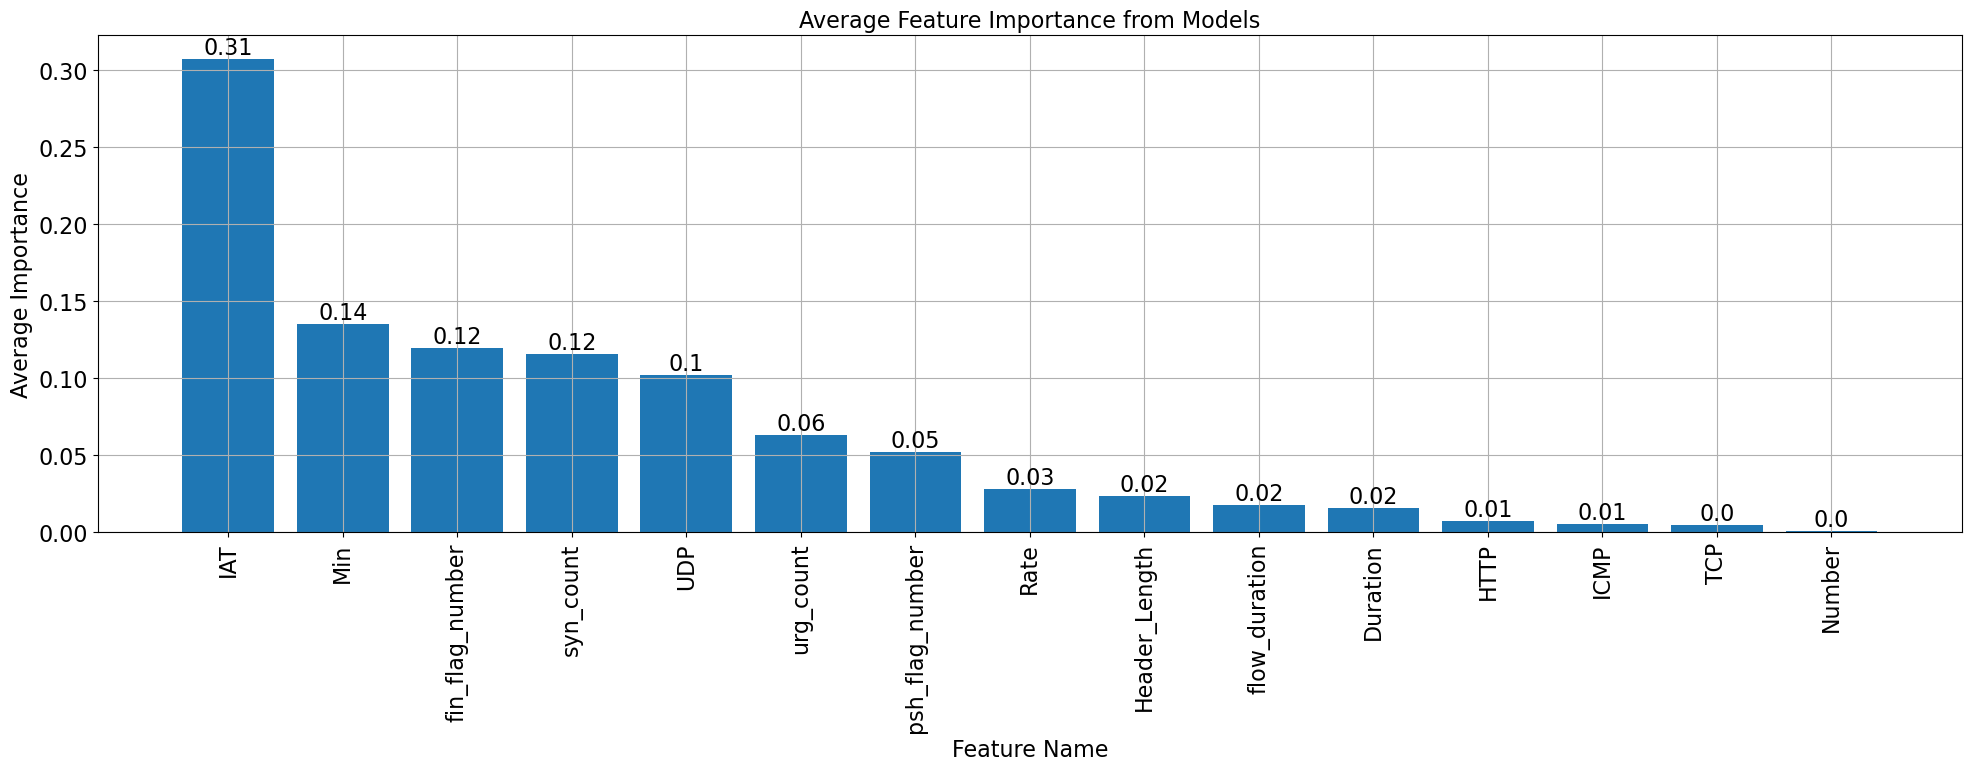

[0.30725292 0.44269557 0.56256546 0.67827542 0.78020719 0.84328356
 0.89562357 0.92392377 0.94751253 0.96530658 0.98096731 0.98810608
 0.99347164 0.99814069 0.99932156 0.99999929 0.99999967 1.
 1.        ]


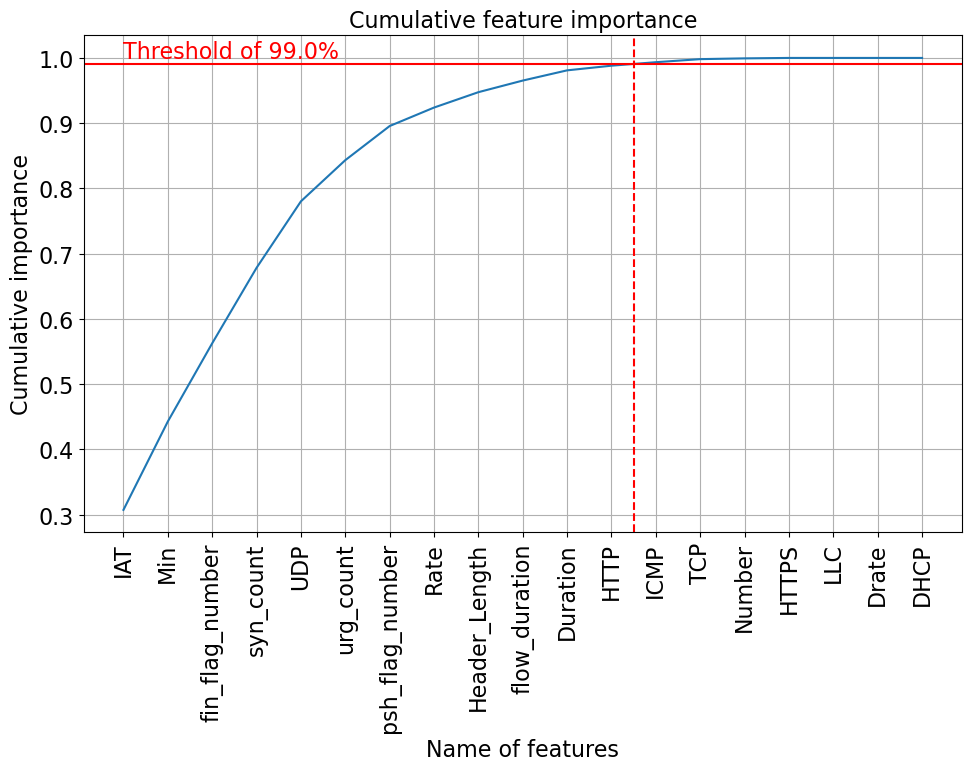

['IAT', 'Min', 'fin_flag_number', 'syn_count', 'UDP', 'urg_count', 'psh_flag_number', 'Rate', 'Header_Length', 'flow_duration', 'Duration', 'HTTP']
            Feature  Average Importance
0               IAT            0.237445
1               Min            0.104670
2   fin_flag_number            0.092635
3         syn_count            0.089421
4               UDP            0.078773
5         urg_count            0.048745
6   psh_flag_number            0.040448
11             Rate            0.021870
13    Header_Length            0.018229
15    flow_duration            0.013751
17         Duration            0.012103
23             HTTP            0.005517


100%|██████████| 95/95 [01:56<00:00,  1.23s/it]


In [16]:
# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, X_columns, model_path_all_classes_DDoS, all_features=True, figsize=(20, 8))
average_importance_df.to_csv(model_path_all_classes_DDoS+'feature_importance.csv', index=False)
average_importance_df.to_csv('.\\resultats\\DoS_3_models\\DDoS\\feature_importance.csv', index=False)

# Load feature importance dataframe
average_importance_df = pd.read_csv(model_path_all_classes_DDoS+'feature_importance.csv')
# print(average_importance_df.head(average_importance_df.size))

# Remove features with correlation > 0.80
threshold = 0.80
dataset = read_csv_file(train_sets[0], file_path)
dataset = multi_filter_df(dataset, filter_cols, filter_name)
features_with_threshold_corr = remove_features_with_correlation_and_feature_importance(dataset[X_columns], average_importance_df, model_path_all_classes_DDoS, figsize=(20, 8), threshold=threshold)
# print(features_with_threshold_corr.head(features_with_threshold_corr.size))

# Select features with cumulative importance > 0.95 and correlation < 0.80
selected_X = select_features_by_importance(features_with_threshold_corr['Feature'].values, features_with_threshold_corr['Average Importance'].values, model_path_all_classes_DDoS, threshold_percentage=0.99)
pd.DataFrame(selected_X).to_csv(model_path_all_classes_DDoS+'selected_X_columns.csv', index=False)
print(selected_X)

filtered_df = average_importance_df[average_importance_df['Feature'].isin(selected_X)]
print(filtered_df.head(filtered_df.size))

# Define and fit scaler
scaler = MinMaxScaler()
for set in tqdm(build_sets + after_build_sets):
    scaler.fit(read_csv_file(set, file_path)[selected_X])

## Display performance

In [9]:
read_csv_file(performance_path, model_path_all_classes_DDoS).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

Model  Accuracy Training  Recall Training  Precision Training  \
10       SF_XGB           1.000000         1.000000            1.000000   
2           XGB           1.000000         1.000000            1.000000   
7         SF_DT           0.999999         0.999999            0.999999   
0            DT           1.000000         1.000000            1.000000   
8         SF_RF           0.999999         0.999999            0.999999   
4           Cat           0.999942         0.999956            0.999958   
1            RF           1.000000         1.000000            1.000000   
9         SF_ET           1.000000         1.000000            1.000000   
3            ET           1.000000         1.000000            1.000000   
6      Adaboost           0.831995         0.715633            0.696793   
11  SF_Adaboost           0.778489         0.648996            0.683472   
5         LIGHT           0.620720         0.420461            0.440193   

    F1 Training  Accuracy Testing  Recall Testing  Precision Testing  \
10     1.000000          0.999918        0.998212           0.998630   
2      1.000000          0.999907        0.997951           0.998336   
7      0.999999          0.999788        0.996496           0.994393   
0      1.000000          0.999755        0.996045           0.995139   
8      0.999999          0.999747        0.995874           0.993588   
4      0.999957          0.999740        0.994380           0.992758   
1      1.000000          0.999393        0.993630           0.988402   
9      1.000000          0.998934        0.984792           0.975717   
3      1.000000          0.998669        0.987064           0.975746   
6      0.688979          0.973443        0.780258           0.900273   
11     0.639904          0.686276        0.493904           0.410273   
5      0.423874          0.409935        0.241942           0.258957   

    F1 Testing   FU_rate   FL_rate       FU       FL  Total rows  
10    0.998420  0.000040  0.000042      234      246     5818483  
2     0.998141  0.000051  0.000042      297      244     5818483  
7     0.995432  0.000103  0.000109      600      634     5818483  
0     0.995588  0.000106  0.000138      619      804     5818483  
8     0.994721  0.000130  0.000123      758      715     5818483  
4     0.993517  0.000107  0.000153      620      891     5818483  
1     0.990842  0.000339  0.000268     1972     1560     5818483  
9     0.979914  0.000627  0.000438     3651     2550     5818483  
3     0.980452  0.000717  0.000614     4170     3574     5818483  
6     0.799599  0.016400  0.010157    95422    59098     5818483  
11    0.417451  0.021276  0.292448   123795  1701601     5818483  
5     0.203850  0.266590  0.323475  1551147  1882135     5818483

In [14]:
df=read_csv_file(performance_path, model_path_all_classes_DDoS).sort_values(by=['Accuracy Testing', 'F1 Testing', 'Recall Testing', 'Precision Testing'], ascending=False).head(20)
df=df[['Accuracy Testing', 'Recall Testing','Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate', 'FU', 'FL']]

#  Convert DataFrame to LaTeX table
latex_table = df.to_latex(index=True)

# Print or save the LaTeX table
print(latex_table)

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Accuracy Testing &  Recall Testing &  Precision Testing &  F1 Testing &   FU\_rate &   FL\_rate &       FU &       FL \\
\midrule
10 &          0.999918 &        0.998212 &           0.998630 &    0.998420 &  0.000040 &  0.000042 &      234 &      246 \\
2  &          0.999907 &        0.997951 &           0.998336 &    0.998141 &  0.000051 &  0.000042 &      297 &      244 \\
7  &          0.999788 &        0.996496 &           0.994393 &    0.995432 &  0.000103 &  0.000109 &      600 &      634 \\
0  &          0.999755 &        0.996045 &           0.995139 &    0.995588 &  0.000106 &  0.000138 &      619 &      804 \\
8  &          0.999747 &        0.995874 &           0.993588 &    0.994721 &  0.000130 &  0.000123 &      758 &      715 \\
4  &          0.999740 &        0.994380 &           0.992758 &    0.993517 &  0.000107 &  0.000153 &      620 &      891 \\
1  &          0.999393 &        0.993630 &           0.988402 &    0.990842 & 

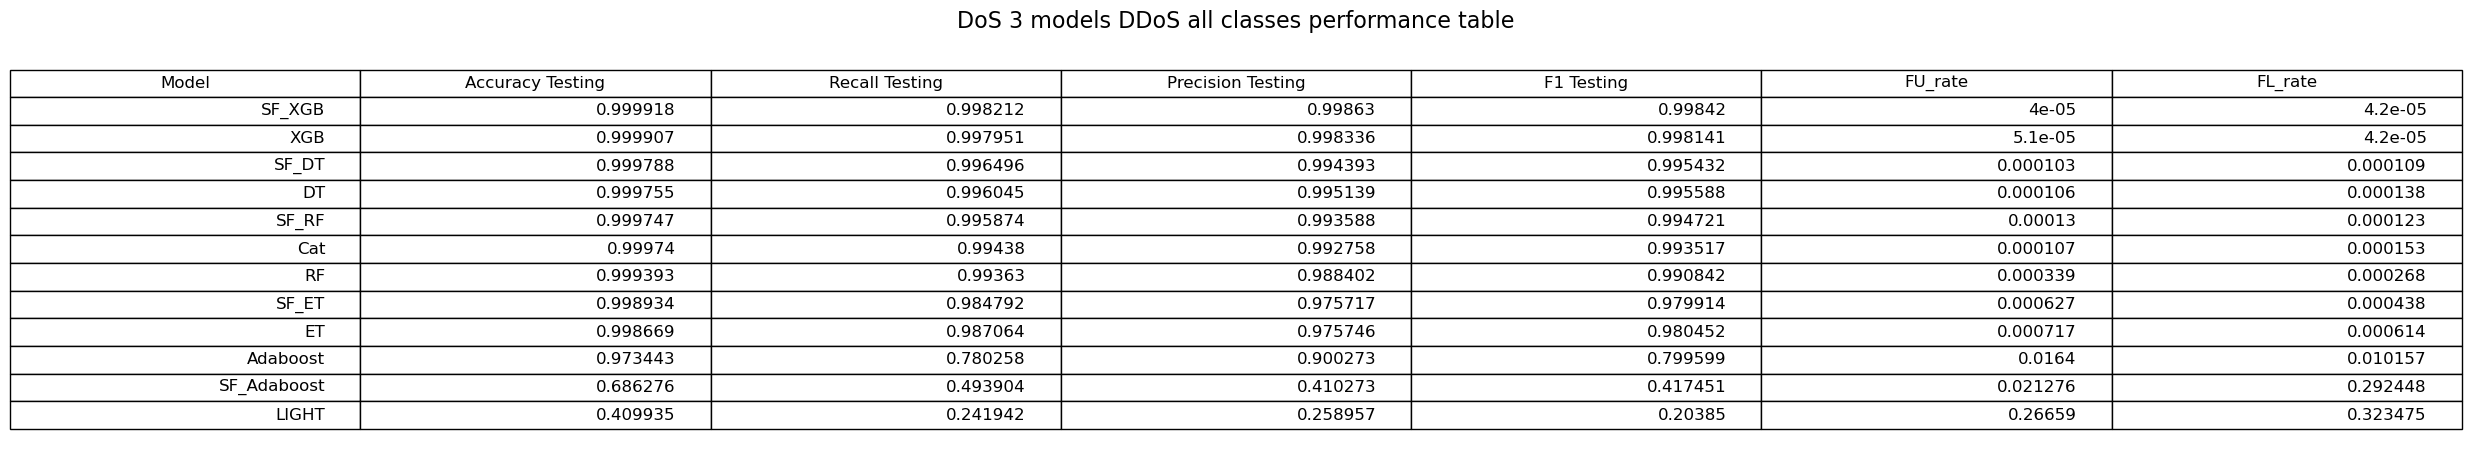

In [28]:
# Performance table
performance_table = read_csv_file(performance_path, model_path_all_classes_DDoS).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(50)
performance_table = performance_table[['Model', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate']]
performance_table = performance_table.round(6)

plot_performance_table(performance_table, model_path_all_classes_DDoS+'Performance table.png', 'DoS 3 models DDoS all classes performance table', figsize=(25, 5))

## Final DDoS prediction

In [16]:
model_path = '.\\DoS_model\\All_classes\\DDoS\\'
filter_name = [
    {'name': 'DoS', 'type': '='},
    {'name': 'DDoS', 'type': '='}
]
filter_cols = ['Prediction', 'Trinary Prediction']

# Define model
model = joblib.load(model_path + 'model_XGB.joblib')

# Get predicted data
df = read_csv_file('after_build_set_scaled.csv', '.\\DoS_model\\')
print(len(df))
# df = df[df['Prediction'] == 'DoS']
# df = df[df['Trinary Prediction'] == 'DoS']
df = multi_filter_df(df, filter_cols, filter_name)
print(len(df))

# Get x, y and z
binary_col = df['Binary']
prediction_col = df['Prediction']
trinary_col = df['Trinary']
trinary_prediction_col = df['Trinary Prediction']
del df

try:
    encoder = joblib.load(model_path+'encoder.joblib')
except:
    raise Exception("Please, build models first")

# Get prediction
X_test, y_test, y_pred = get_prediction_by_model_multifiltered(model, ['after_build_set_scaled.csv'], '.\\DoS_model\\', X_columns, y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)
print(np.array(X_test).shape)

# Build new dataframe and save it
new_after_build_set_scaled = pd.DataFrame(X_test, columns=X_columns)
new_after_build_set_scaled[y_column] = y_test
new_after_build_set_scaled['Final DoS Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set_scaled['Binary'] = binary_col.values
new_after_build_set_scaled['Prediction'] = prediction_col.values
new_after_build_set_scaled['Trinary'] = trinary_col.values
new_after_build_set_scaled['Trinary Prediction'] = trinary_prediction_col.values
count = len(new_after_build_set_scaled[new_after_build_set_scaled[y_column] != new_after_build_set_scaled['Final DoS Prediction']])
y_pred = encoder.inverse_transform(y_pred)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set_scaled),len(new_after_build_set_scaled)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

del new_after_build_set_scaled

res.head()

8482125
6850942


100%|██████████| 1/1 [00:39<00:00, 39.06s/it]


(6850942, 46)


Accuracy    Recall  Precision        F1  Mispredicted count  \
0  0.999852  0.999852   0.999782  0.999817                1014   

   Mispredicted rate  Total rows  
0           0.000148     6850942

## Tests

In [42]:
import gc
gc.collect()

406